In [1]:
import pandas as pd

In [2]:
df_region = pd.read_csv(r"E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\Regionwise_data_energy.csv")

df_consumption = pd.read_csv(r"E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\Energy_Consumption_data_2018_2023.csv")

df_demand = pd.read_csv(r"E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\Demand_data.csv")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1464\3954920757.py:5: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_demand = pd.read_csv(r"E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\Demand_data.csv")


### CSV1: Regionwise data

In [3]:
df_region.head(16)

Unnamed: 0                                Category        NR        WR  \
0            0  Demand Met during Evening Peak hrs(MW)  41700.00  42607.00   
1            1                      Peak Shortage (MW)   1003.00     10.00   
2            2                         Energy Met (MU)    864.00   1016.00   
3            3                           Hydro Gen(MU)    108.00     20.00   
4            4                            Wind Gen(MU)      6.00     37.00   
5            5                          Solar Gen (MU)      0.63     15.01   
6            6                    Energy Shortage (MU)     12.80      0.00   
7            7                            Schedule(MU)    157.80   -196.60   
8            8                              Actual(MU)    154.90   -193.80   
9            9                             O/D/U/D(MU)     -2.90      2.70   
10          10                                 Central   3831.00  15131.00   
11          11                                   State   6720.00  17820.00   
12          12                Thermal (Coal & Lignite)    556.00   1112.00   
13          13                                   Hydro    108.00     18.00   
14          14                                 Nuclear     29.00     24.00   
15          15                    Gas, Naptha & Diesel     19.00     47.00   

          SR          ER         NER     Total      Date  
0   37748.00       16460        2238  140753.0  01.01.18  
1       0.00           0          43    1056.0  01.01.18  
2     882.00         314          40    3116.0  01.01.18  
3      42.00          25          10     204.0  01.01.18  
4      17.00  ----------  ----------      60.0  01.01.18  
5      43.49        0.92        0.03      60.0  01.01.18  
6       0.00           0         0.3      13.1  01.01.18  
7     118.70       -79.4        -1.2      -0.7  01.01.18  
8     119.20       -76.2        -2.8       1.3  01.01.18  
9       0.50         3.3        -1.6       2.0  01.01.18  
10   5312.00        1220          71   25565.0  01.01.18  
11   6570.00        5880          50   37040.0  01.01.18  
12    588.00         386          10    2652.0  01.01.18  
13     42.00          25          10     202.0  01.01.18  
14     69.00           0           0     122.0  01.01.18  
15     18.00           0          26     110.0  01.01.18

In [4]:
df_region.tail()

Unnamed: 0 Category      NR       WR      SR    ER NER  Total      Date
31741          11    State  5300.0  14726.0  8043.0  1410  98    NaN  31.12.22
31742          12     Coal   796.0   1409.0   575.0   652  15    NaN  31.12.22
31743          13  Lignite    22.0     11.0    31.0     0   0    NaN  31.12.22
31744          14    Hydro   106.0     36.0    94.0    28  11    NaN  31.12.22
31745          15  Nuclear    25.0     37.0    66.0     0   0    NaN  31.12.22

In [5]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31746 entries, 0 to 31745
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31746 non-null  int64  
 1   Category    31746 non-null  object 
 2   NR          31746 non-null  float64
 3   WR          31746 non-null  float64
 4   SR          31746 non-null  float64
 5   ER          31746 non-null  object 
 6   NER         31746 non-null  object 
 7   Total       24390 non-null  float64
 8   Date        31746 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 2.2+ MB


In [6]:
df_region.columns

Index(['Unnamed: 0', 'Category', 'NR', 'WR', 'SR', 'ER', 'NER', 'Total',
       'Date'],
      dtype='object')

In [7]:
# # Drop 'Unnamed: 0' column
# df_region.drop('Unnamed: 0', axis=1, inplace=True)


In [8]:

# Convert 'Date' column to datetime
df_region['Date'] = pd.to_datetime(df_region['Date'], format='%d.%m.%y')

# Convert specified columns to float
float_columns = ['NR', 'WR', 'SR', 'ER', 'NER', 'Total']
df_region[float_columns] = df_region[float_columns].replace('----------', -1000).replace('-', -1000).astype(float)


In [9]:
df_region.head()

Unnamed: 0                                Category       NR       WR  \
0           0  Demand Met during Evening Peak hrs(MW)  41700.0  42607.0   
1           1                      Peak Shortage (MW)   1003.0     10.0   
2           2                         Energy Met (MU)    864.0   1016.0   
3           3                           Hydro Gen(MU)    108.0     20.0   
4           4                            Wind Gen(MU)      6.0     37.0   

        SR       ER     NER     Total       Date  
0  37748.0  16460.0  2238.0  140753.0 2018-01-01  
1      0.0      0.0    43.0    1056.0 2018-01-01  
2    882.0    314.0    40.0    3116.0 2018-01-01  
3     42.0     25.0    10.0     204.0 2018-01-01  
4     17.0  -1000.0 -1000.0      60.0 2018-01-01

In [10]:
len(df_region.Date.unique())

1992

In [11]:
len(df_region[df_region["ER"]==-1000])

1992

In [12]:
df_region[float_columns] = df_region[float_columns].replace( -1000,0)

In [13]:
df_region["Total_of_regions"] = df_region[['NR', 'WR', 'SR', 'ER', 'NER']].sum(axis=1)

In [14]:
df_region.columns

Index(['Unnamed: 0', 'Category', 'NR', 'WR', 'SR', 'ER', 'NER', 'Total',
       'Date', 'Total_of_regions'],
      dtype='object')

In [15]:
df_total = df_region[['Unnamed: 0', 'Date','Category','Total_of_regions','Total']]

In [16]:
df_total.Category.unique().tolist()

['Demand Met during Evening Peak hrs(MW)',
 'Peak Shortage (MW)',
 'Energy Met (MU)',
 'Hydro Gen(MU)',
 'Wind Gen(MU)',
 'Solar Gen (MU)',
 'Energy Shortage (MU)',
 'Schedule(MU)',
 'Actual(MU)',
 'O/D/U/D(MU)',
 'Central',
 'State',
 'Thermal (Coal & Lignite)',
 'Hydro',
 'Nuclear',
 'Gas, Naptha & Diesel',
 'Hydro Gen (MU)',
 'Wind Gen (MU)',
 'Coal',
 'Lignite',
 'DemandMetduringEveningPeakhrs(MW)',
 'PeakShortage(MW)',
 'EnergyMet(MU)',
 'HydroGen(MU)',
 'WindGen(MU)',
 'SolarGen(MU)',
 'EnergyShortage(MU)',
 '7.30 0.00 0.00 2.49 0.74 10.53)']

In [17]:
df_total[df_total["Category"]=='7.30 0.00 0.00 2.49 0.74 10.53)']

Unnamed: 0       Date                         Category  \
22282           6 2022-06-22  7.30 0.00 0.00 2.49 0.74 10.53)   

       Total_of_regions  Total  
22282             10.53    NaN

In [18]:
df_total = df_total[df_total["Category"] != '7.30 0.00 0.00 2.49 0.74 10.53)']

df_total.reset_index(drop=True, inplace=True)


In [19]:
df_total['Category2'] = df_total['Category'].str.replace(' ', '').str.lower()


In [20]:
df_total['Category2'] = df_total['Category2'].replace({
    'demandmetduringeveningpeakhours(mw)': 'demandmetduringeveningpeakhours(mw)',
    'peakshortage(mw)': 'peakshortage(mw)',
    'energymet(mu)': 'energymet(mu)',
    'hydrogen(mu)': 'hydrogen(mu)',
    'windgen(mu)': 'windgen(mu)',
    'solargen(mu)': 'solargen(mu)',
    'energyshortage(mu)': 'energyshortage(mu)'
})


In [21]:
df_total.Category2.unique().tolist()

['demandmetduringeveningpeakhrs(mw)',
 'peakshortage(mw)',
 'energymet(mu)',
 'hydrogen(mu)',
 'windgen(mu)',
 'solargen(mu)',
 'energyshortage(mu)',
 'schedule(mu)',
 'actual(mu)',
 'o/d/u/d(mu)',
 'central',
 'state',
 'thermal(coal&lignite)',
 'hydro',
 'nuclear',
 'gas,naptha&diesel',
 'coal',
 'lignite']

In [22]:
df_total.columns

Index(['Unnamed: 0', 'Date', 'Category', 'Total_of_regions', 'Total',
       'Category2'],
      dtype='object')

In [23]:
df_total['Category2'] = df_total['Category2'].replace({
    'demandmetduringeveningpeakhrs(mw)': 'Maximum Demand - Evening Peak (MW)',
    'peakshortage(mw)': 'Peak Shortage (MW)',
    'energymet(mu)': 'Energy Met (MU)',
    'hydrogen(mu)': 'Hydro Generation (MU)',
    'windgen(mu)': 'Wind Generation (MU)',
    'solargen(mu)': 'Solar Generation (MU)',
    'energyshortage(mu)': 'Energy Shortage (MU)',
    'schedule(mu)': 'Import/Export Schedule (MU)',
    'actual(mu)': 'Import/Export Actual (MU)',
    'o/d/u/d(mu)': 'Import/Export O/D/U/D (MU)',
    'central': 'Generation Outage Central Sector (MW)',
    'state': 'Generation Outage State Sector (MW)',
    'thermal(coal&lignite)': 'Coal Generation (MW)',
    'hydro': 'Hydro Generation (MW)',
    'nuclear': 'Nuclear Generation (MW)',
    'gas,naptha&diesel': 'Thermal lignite Gas, Naptha & Diesel Generation (MW)',
    'coal': 'Coal Generation (MW)',
    'lignite': 'Thermal lignite Gas, Naptha & Diesel Generation (MW)'
})

# Convert to snake case
df_total['Category2'] = df_total['Category2'].str.replace(' ', '_').str.lower()


In [24]:
#df_total.head(16)

In [25]:
# df_total['Category2'] = df_total['Category2'].replace({
#     'demandmetduringeveningpeakhrs(mw)': 'Maximum Demand - Evening Peak (MW)',
#     'peakshortage(mw)': 'Peak Shortage (MW)',
#     'energymet(mu)': 'Energy Met (MU)',
#     'hydrogen(mu)': 'Hydro Generation (MU)',
#     'windgen(mu)': 'Wind Generation (MU)',
#     'solargen(mu)': 'Solar Generation (MU)',
#     'energyshortage(mu)': 'Energy Shortage (MU)',
#     'schedule(mu)': 'Import/Export Schedule (MU)',
#     'actual(mu)': 'Import/Export Actual (MU)',
#     'o/d/u/d(mu)': 'Import/Export O/D/U/D (MU)',
#     'central': 'Generation Outage Central Sector (MW)',
#     'state': 'Generation Outage State Sector (MW)',
#     'thermal(coal&lignite)': 'Thermal Generation (Coal & Lignite) (MW)',
#     'hydro': 'Hydro Generation (MW)',
#     'nuclear': 'Nuclear Generation (MW)',
#     'gas,naptha&diesel': 'Gas, Naptha & Diesel Generation (MW)',
#     'coal': 'Coal Generation (MW)',
#     'lignite': 'Lignite Generation (MW)'
# })

# # Convert to snake case
# df_total['Category2'] = df_total['Category2'].str.replace(' ', '_').str.lower()


In [26]:
df_total.Category2.unique().tolist()

['maximum_demand_-_evening_peak_(mw)',
 'peak_shortage_(mw)',
 'energy_met_(mu)',
 'hydro_generation_(mu)',
 'wind_generation_(mu)',
 'solar_generation_(mu)',
 'energy_shortage_(mu)',
 'import/export_schedule_(mu)',
 'import/export_actual_(mu)',
 'import/export_o/d/u/d_(mu)',
 'generation_outage_central_sector_(mw)',
 'generation_outage_state_sector_(mw)',
 'coal_generation_(mw)',
 'hydro_generation_(mw)',
 'nuclear_generation_(mw)',
 'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)']

In [27]:
len(df_total.Category2.unique().tolist())

16

In [28]:
df_total2 = df_total.drop(['Category',"Total"],axis=1)

In [29]:
df_total2.Category2.unique().tolist()

['maximum_demand_-_evening_peak_(mw)',
 'peak_shortage_(mw)',
 'energy_met_(mu)',
 'hydro_generation_(mu)',
 'wind_generation_(mu)',
 'solar_generation_(mu)',
 'energy_shortage_(mu)',
 'import/export_schedule_(mu)',
 'import/export_actual_(mu)',
 'import/export_o/d/u/d_(mu)',
 'generation_outage_central_sector_(mw)',
 'generation_outage_state_sector_(mw)',
 'coal_generation_(mw)',
 'hydro_generation_(mw)',
 'nuclear_generation_(mw)',
 'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)']

### the Indian energy landscape

* Category provide various aspects of electricity demand, generation, and consumption, covering different energy sources and sectors for all 5 regions:

1. **Demand Met during Evening Peak hrs (MW):**
   - Represents the electricity demand met during the evening peak hours, measured in megawatts (MW).

2. **Peak Shortage (MW):**
   - Indicates the shortage in electricity supply during peak hours, measured in megawatts (MW).

3. **Energy Met (MU):**
   - Represents the total energy met, measured in million units (MU).

4. **Hydro Gen (MU):**
   - Signifies the energy generated from hydro sources, measured in million units (MU).

5. **Wind Gen (MU):**
   - Represents the energy generated from wind sources, measured in million units (MU).

6. **Solar Gen (MU):**
   - Represents the energy generated from solar sources, measured in million units (MU).

7. **Energy Shortage (MU):**
   - Indicates the shortage in energy supply, measured in million units (MU).

8. **Schedule (MU):**
   - Represents the scheduled energy, measured in million units (MU).

9. **Actual (MU):**
   - Indicates the actual energy produced, measured in million units (MU).

10. **O/D/U/D (MU):**
    - Represents the Overdrawn/Underdrawn energy, measured in million units (MU).

11. **Central:**
    - Represents data related to the central sector's electricity generation and consumption.

12. **State:**
    - Represents data related to the state sector's electricity generation and consumption.

13. **Thermal (Coal & Lignite):**
    - Represents energy generated from thermal sources, including coal and lignite, measured in million units (MU).

14. **Hydro:**
    - Represents energy generated from hydro sources, measured in million units (MU).

15. **Nuclear:**
    - Represents energy generated from nuclear sources, measured in million units (MU).

16. **Gas, Naptha & Diesel:**
    - Represents energy generated from gas, naptha, and diesel sources, measured in million units (MU).

17. **Coal:**
    - Represents data specific to coal-based energy generation.

18. **Lignite:**
    - Represents data specific to lignite-based energy generation.


In [30]:
print(df_total2.Date.min(),df_total2.Date.max())

2018-01-01 00:00:00 2023-10-31 00:00:00


In [31]:
df_total2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31745 entries, 0 to 31744
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        31745 non-null  int64         
 1   Date              31745 non-null  datetime64[ns]
 2   Total_of_regions  31745 non-null  float64       
 3   Category2         31745 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 992.2+ KB


In [32]:
df_final = df_total2.pivot(index='Date', columns='Category2', values='Total_of_regions')

# Reset the index to make 'Date' a column
df_final.reset_index(inplace=True)



In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date                                                  1992 non-null   datetime64[ns]
 1   coal_generation_(mw)                                  1978 non-null   float64       
 2   energy_met_(mu)                                       1992 non-null   float64       
 3   energy_shortage_(mu)                                  1991 non-null   float64       
 4   generation_outage_central_sector_(mw)                 1978 non-null   float64       
 5   generation_outage_state_sector_(mw)                   1978 non-null   float64       
 6   hydro_generation_(mu)                                 1992 non-null   float64       
 7   hydro_generation_(mw)                                 1978 non-null   float64 

### CSV2: consumption DATA

In [34]:
df_consumption.head()

Date  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
0  1/2/2021   140.6    139.3      266.1   69.7  312.5         41.9  32.0   
1  2/2/2021   142.2    141.3      268.1   69.3  311.5         41.5  31.7   
2  3/2/2021   135.1    141.0      269.7   68.4  306.2         41.0  33.1   
3  4/2/2021   120.8    125.7      267.9   68.6  279.5         39.9  32.2   
4  5/2/2021   129.2    130.0      267.9   70.4  276.4         38.4  32.1   

    J&K  Chandigarh  ...  DNHDDPDCL  AMNSIL  BALCO  Railways_ER  Ladakh  NR  \
0  55.6         3.8  ...        NaN     NaN    NaN          NaN     NaN NaN   
1  54.1         3.8  ...        NaN     NaN    NaN          NaN     NaN NaN   
2  53.5         3.8  ...        NaN     NaN    NaN          NaN     NaN NaN   
3  55.6         4.1  ...        NaN     NaN    NaN          NaN     NaN NaN   
4  55.1         3.9  ...        NaN     NaN    NaN          NaN     NaN NaN   

   WR  SR  ER  4469.4  
0 NaN NaN NaN     NaN  
1 NaN NaN NaN     NaN  
2 NaN NaN NaN     NaN  
3 NaN NaN NaN     NaN  
4 NaN NaN NaN     NaN  

[5 rows x 48 columns]

In [35]:
df_consumption2 = df_consumption.drop(['Railways_NR', 'DNHDDPDCL', 'AMNSIL', 'BALCO',
       'Railways_ER', 'Ladakh', 'NR', 'WR', 'SR', 'ER', '4469.4'],axis=1)

In [36]:
df_consumption2.columns

Index(['Date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DD', 'DNH', 'Essarsteel', 'AndhraPradesh',
       'Telangana', 'Karnataka', 'Kerala', 'TamilNadu', 'Pondy', 'Bihar',
       'DVC', 'Jharkhand', 'Odisha', 'WestBengal', 'Sikkim',
       'ArunachalPradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Tripura'],
      dtype='object')

In [37]:
# Define mapping dictionaries for states to regions
state_to_region = {
    'Punjab': 'Northern Region',
    'Haryana': 'Northern Region',
    'Rajasthan': 'Northern Region',
    'Delhi': 'Northern Region',
    'UP': 'Northern Region',
    'Uttarakhand': 'Northern Region',
    'HP': 'Northern Region',
    'J&K': 'Northern Region',
    'Chandigarh': 'Northern Region',
    'Chhattisgarh': 'Western Region',
    'Gujarat': 'Western Region',
    'MP': 'Western Region',
    'Maharashtra': 'Western Region',
    'Goa': 'Western Region',
    'DD': 'Western Region',  # Assuming DD is Daman and Diu
    'DNH': 'Western Region',  # Assuming DNH is Dadra and Nagar Haveli
    'Essarsteel': 'Western Region',
    'AndhraPradesh': 'Southern Region',
    'Telangana': 'Southern Region',
    'Karnataka': 'Southern Region',
    'Kerala': 'Southern Region',
    'TamilNadu': 'Southern Region',
    'Pondy': 'Southern Region',  # Assuming Pondy is Puducherry
    'Bihar': 'Eastern Region',
    'DVC': 'Eastern Region',  # Assuming DVC is Damodar Valley Corporation
    'Jharkhand': 'Eastern Region',
    'Odisha': 'Eastern Region',
    'WestBengal': 'Eastern Region',
    'Sikkim': 'Eastern Region',
    'ArunachalPradesh': 'North-Eastern Region',
    'Assam': 'North-Eastern Region',
    'Manipur': 'North-Eastern Region',
    'Meghalaya': 'North-Eastern Region',
    'Mizoram': 'North-Eastern Region',
    'Nagaland': 'North-Eastern Region',
    'Tripura': 'North-Eastern Region',
}

# Create a new DataFrame for region-wise consumption
df_consumption_region = pd.DataFrame()
df_consumption_region['Date'] = df_consumption2['Date']

# Iterate through the columns of df_consumption and aggregate the consumption values for each region
for state, region in state_to_region.items():
    df_consumption_region[region] = df_consumption_region.get(region, 0) + df_consumption2[state]

# Fill NaN values with 0
df_consumption_region = df_consumption_region.fillna(0)

# Rename columns
df_consumption_region = df_consumption_region.rename(columns={
    'Northern Region': 'NR',
    'Western Region': 'WR',
    'Southern Region': 'SR',
    'Eastern Region': 'ER',
    'North-Eastern Region': 'NER'
})

# Calculate the 'Total' column
df_consumption_region['Total_consumption'] = df_consumption_region[['NR', 'WR', 'SR', 'ER', 'NER']].sum(axis=1)


In [38]:
df_consumption_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1995 non-null   object 
 1   NR                 1995 non-null   float64
 2   WR                 1995 non-null   float64
 3   SR                 1995 non-null   float64
 4   ER                 1995 non-null   float64
 5   NER                1995 non-null   float64
 6   Total_consumption  1995 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.2+ KB


In [39]:
# df_consumption_region.tail(30)

In [40]:
date_formats = ['%m/%d/%Y', '%d-%m-%Y']

# Function to try parsing the date with each format
def parse_date(date_str):
    for date_format in date_formats:
        try:
            return pd.to_datetime(date_str, format=date_format)
        except ValueError:
            pass
    return pd.NaT  # Return NaT if none of the formats match

# Apply the function to the "Date" column
df_consumption_region['Date'] = df_consumption_region['Date'].apply(parse_date)



In [41]:
df_consumption_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1995 non-null   datetime64[ns]
 1   NR                 1995 non-null   float64       
 2   WR                 1995 non-null   float64       
 3   SR                 1995 non-null   float64       
 4   ER                 1995 non-null   float64       
 5   NER                1995 non-null   float64       
 6   Total_consumption  1995 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 109.2 KB


In [42]:
df_consumption_region.columns

Index(['Date', 'NR', 'WR', 'SR', 'ER', 'NER', 'Total_consumption'], dtype='object')

In [43]:
df_consumption_total = df_consumption_region[['Date','Total_consumption']]

In [44]:
df_final1 = df_consumption_total

In [45]:
df_final1.head(2)

Date  Total_consumption
0 2021-01-02             3779.6
1 2021-02-02             3812.7

In [46]:
df_final.head(2)

Category2       Date  coal_generation_(mw)  energy_met_(mu)  \
0         2018-01-01                2652.0           3116.0   
1         2018-01-02                2604.0           3122.0   

Category2  energy_shortage_(mu)  generation_outage_central_sector_(mw)  \
0                          13.1                                25565.0   
1                          13.0                                24087.0   

Category2  generation_outage_state_sector_(mw)  hydro_generation_(mu)  \
0                                      37040.0                  205.0   
1                                      40405.0                  211.0   

Category2  hydro_generation_(mw)  import/export_actual_(mu)  \
0                          203.0                        1.3   
1                          209.0                       -4.5   

Category2  import/export_o/d/u/d_(mu)  import/export_schedule_(mu)  \
0                                 2.0                -7.000000e-01   
1                                -4.5                -8.437695e-15   

Category2  maximum_demand_-_evening_peak_(mw)  nuclear_generation_(mw)  \
0                                    140753.0                    122.0   
1                                    144509.0                    124.0   

Category2  peak_shortage_(mw)  solar_generation_(mu)  \
0                      1056.0                  60.08   
1                       563.0                  58.10   

Category2  thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
0                                                      110.0      
1                                                      114.0      

Category2  wind_generation_(mu)  
0                          60.0  
1                          49.0

### CSV3: Demand

In [47]:
df_demand.head()

Sr no.     States  Max. Demand Met during the day (MW)  \
0       0     punjab                                 5599   
1       1    haryana                                 6119   
2       2  rajasthan                                10446   
3       3      delhi                                 3664   
4       4         up                                14129   

  Shortage during maximum Demand (MW)  Energy Met (MU)  Drawal Schedule (MU)  \
0                                   0            103.6                  35.5   
1                                   0            112.6                  59.6   
2                                   0            204.3                  65.8   
3                                   0             60.1                  49.4   
4                                 560            274.0                  90.3   

  OD(+)/UD(-) (MU) Max OD (MW)  Energy Shortage (MU)      Date  
0              0.2         165                   0.0  01.01.18  
1              0.0         175                   1.5  01.01.18  
2              0.7         300                   0.0  01.01.18  
3             -1.1         149                   0.0  01.01.18  
4              0.3         810                   0.4  01.01.18

In [48]:
df_demand

Sr no.     States  Max. Demand Met during the day (MW)  \
0           0     punjab                                 5599   
1           1    haryana                                 6119   
2           2  rajasthan                                10446   
3           3      delhi                                 3664   
4           4         up                                14129   
...       ...        ...                                  ...   
72411      31    manipur                                  236   
72412      32  meghalaya                                  396   
72413      33    mizoram                                  136   
72414      34   nagaland                                  152   
72415      35    tripura                                  226   

      Shortage during maximum Demand (MW)  Energy Met (MU)  \
0                                       0            103.6   
1                                       0            112.6   
2                                       0            204.3   
3                                       0             60.1   
4                                     560            274.0   
...                                   ...              ...   
72411                                   0              3.6   
72412                                   0              7.7   
72413                                   0              2.2   
72414                                   0              2.3   
72415                                   0              3.8   

       Drawal Schedule (MU) OD(+)/UD(-) (MU) Max OD (MW)  \
0                      35.5              0.2         165   
1                      59.6              0.0         175   
2                      65.8              0.7         300   
3                      49.4             -1.1         149   
4                      90.3              0.3         810   
...                     ...              ...         ...   
72411                   3.6                0          28   
72412                   6.3             -0.1          34   
72413                   1.9             -0.3          11   
72414                   2.3             -0.1          12   
72415                   1.8             -0.1          25   

       Energy Shortage (MU)      Date  
0                       0.0  01.01.18  
1                       1.5  01.01.18  
2                       0.0  01.01.18  
3                       0.0  01.01.18  
4                       0.4  01.01.18  
...                     ...       ...  
72411                   0.0  31.12.22  
72412                   0.0  31.12.22  
72413                   0.0  31.12.22  
72414                   0.0  31.12.22  
72415                   0.0  31.12.22  

[72416 rows x 10 columns]

In [49]:
state_to_region.keys()

dict_keys(['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP', 'Maharashtra', 'Goa', 'DD', 'DNH', 'Essarsteel', 'AndhraPradesh', 'Telangana', 'Karnataka', 'Kerala', 'TamilNadu', 'Pondy', 'Bihar', 'DVC', 'Jharkhand', 'Odisha', 'WestBengal', 'Sikkim', 'ArunachalPradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'])

In [50]:
df_demand2 = df_demand.copy()
#df_demand = df_demand2

In [51]:
df_demand2

Sr no.     States  Max. Demand Met during the day (MW)  \
0           0     punjab                                 5599   
1           1    haryana                                 6119   
2           2  rajasthan                                10446   
3           3      delhi                                 3664   
4           4         up                                14129   
...       ...        ...                                  ...   
72411      31    manipur                                  236   
72412      32  meghalaya                                  396   
72413      33    mizoram                                  136   
72414      34   nagaland                                  152   
72415      35    tripura                                  226   

      Shortage during maximum Demand (MW)  Energy Met (MU)  \
0                                       0            103.6   
1                                       0            112.6   
2                                       0            204.3   
3                                       0             60.1   
4                                     560            274.0   
...                                   ...              ...   
72411                                   0              3.6   
72412                                   0              7.7   
72413                                   0              2.2   
72414                                   0              2.3   
72415                                   0              3.8   

       Drawal Schedule (MU) OD(+)/UD(-) (MU) Max OD (MW)  \
0                      35.5              0.2         165   
1                      59.6              0.0         175   
2                      65.8              0.7         300   
3                      49.4             -1.1         149   
4                      90.3              0.3         810   
...                     ...              ...         ...   
72411                   3.6                0          28   
72412                   6.3             -0.1          34   
72413                   1.9             -0.3          11   
72414                   2.3             -0.1          12   
72415                   1.8             -0.1          25   

       Energy Shortage (MU)      Date  
0                       0.0  01.01.18  
1                       1.5  01.01.18  
2                       0.0  01.01.18  
3                       0.0  01.01.18  
4                       0.4  01.01.18  
...                     ...       ...  
72411                   0.0  31.12.22  
72412                   0.0  31.12.22  
72413                   0.0  31.12.22  
72414                   0.0  31.12.22  
72415                   0.0  31.12.22  

[72416 rows x 10 columns]

In [52]:
df_demand = df_demand2.copy()

In [53]:
df_demand['States'].unique()

array(['punjab', 'haryana', 'rajasthan', 'delhi', 'up', 'uttarakhand',
       'hp', 'j&k', 'chandigarh', 'chhattisgarh', 'gujarat', 'mp',
       'maharashtra', 'goa', 'dd', 'dnh', 'essarsteel', 'andhrapradesh',
       'telangana', 'karnataka', 'kerala', 'tamilnadu', 'pondy', 'bihar',
       'dvc', 'jharkhand', 'odisha', 'westbengal', 'sikkim',
       'arunachalpradesh', 'assam', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'tripura', 'j&k(ut)&ladakh(ut)', 'amnsil',
       'puducherry', 'dnhddpdcl', 'balco', 'j&k(ut)andladakh(ut)',
       'railways_north', 'railways_east'], dtype=object)

In [54]:
state_to_region2 = {
    'Punjab': 'Northern Region',
#    'punjab': 'Northern Region',
    'Haryana': 'Northern Region',
    'Rajasthan': 'Northern Region',
    'Delhi': 'Northern Region',
    'UP': 'Northern Region',
    'Uttarakhand': 'Northern Region',
    'HP': 'Northern Region',
    'J&K': 'Northern Region',
    'j&k(ut)andladakh(ut)': 'Northern Region',
    'j&k(ut)&ladakh(ut)': 'Northern Region',
    'Chandigarh': 'Northern Region',
    'railways_north':'Northern Region',
    'Chhattisgarh': 'Western Region',
    'Gujarat': 'Western Region',
    'MP': 'Western Region',
    'Maharashtra': 'Western Region',
    'Goa': 'Western Region',
    'DD': 'Western Region',  # Assuming DD is Daman and Diu
    'DNH': 'Western Region',  # Assuming DNH is Dadra and Nagar Haveli
    'Essarsteel': 'Western Region',
    'Andhra Pradesh': 'Southern Region',  # Corrected spelling
    'andhrapradesh': 'Southern Region',  #
    'Telangana': 'Southern Region',
    'Karnataka': 'Southern Region',
    'Kerala': 'Southern Region',
    'Tamil Nadu': 'Southern Region',  # Corrected spelling
    'Puducherry': 'Southern Region',  # Assuming Pondy is Puducherry
    'puducherry': 'Southern Region',  # Assuming Pondy is Puducherry
    'pondy': 'Southern Region',
    'tamilnadu':'Southern Region', 
    'Bihar': 'Eastern Region',
    'DVC': 'Eastern Region',  # Assuming DVC is Damodar Valley Corporation
    'Jharkhand': 'Eastern Region',
    'Odisha': 'Eastern Region',
    'West Bengal': 'Eastern Region',
    'westbengal':'Eastern Region',
    'Sikkim': 'Eastern Region',
    'Arunachal Pradesh': 'North-Eastern Region',
    'arunachalpradesh':'North-Eastern Region',
    'Assam': 'North-Eastern Region',
    'Manipur': 'North-Eastern Region',
    'Meghalaya': 'North-Eastern Region',
    'Mizoram': 'North-Eastern Region',
    'Nagaland': 'North-Eastern Region',
    'Tripura': 'North-Eastern Region',
    'railways_east': 'Eastern Region',
    'dnhddpdcl':  'Western Region'
}

# Define the index separately
#index = pd.Index(state_to_region2.keys())  # Use the keys of the dictionary as the index

# Create the DataFrame with the defined index
state_to_region1 = pd.DataFrame([state_to_region2])


In [55]:
# state_to_region1 = pd.DataFrame([state_to_region2], columns=['States', 'Regions'])

In [56]:
state_to_region1

Punjab          Haryana        Rajasthan            Delhi  \
0  Northern Region  Northern Region  Northern Region  Northern Region   

                UP      Uttarakhand               HP              J&K  \
0  Northern Region  Northern Region  Northern Region  Northern Region   

  j&k(ut)andladakh(ut) j&k(ut)&ladakh(ut)  ...     Arunachal Pradesh  \
0      Northern Region    Northern Region  ...  North-Eastern Region   

       arunachalpradesh                 Assam               Manipur  \
0  North-Eastern Region  North-Eastern Region  North-Eastern Region   

              Meghalaya               Mizoram              Nagaland  \
0  North-Eastern Region  North-Eastern Region  North-Eastern Region   

                Tripura   railways_east       dnhddpdcl  
0  North-Eastern Region  Eastern Region  Western Region  

[1 rows x 47 columns]

In [57]:
state_to_region1 = state_to_region1.T

In [58]:
state_to_region1

0
Punjab                     Northern Region
Haryana                    Northern Region
Rajasthan                  Northern Region
Delhi                      Northern Region
UP                         Northern Region
Uttarakhand                Northern Region
HP                         Northern Region
J&K                        Northern Region
j&k(ut)andladakh(ut)       Northern Region
j&k(ut)&ladakh(ut)         Northern Region
Chandigarh                 Northern Region
railways_north             Northern Region
Chhattisgarh                Western Region
Gujarat                     Western Region
MP                          Western Region
Maharashtra                 Western Region
Goa                         Western Region
DD                          Western Region
DNH                         Western Region
Essarsteel                  Western Region
Andhra Pradesh             Southern Region
andhrapradesh              Southern Region
Telangana                  Southern Region
Karnataka                  Southern Region
Kerala                     Southern Region
Tamil Nadu                 Southern Region
Puducherry                 Southern Region
puducherry                 Southern Region
pondy                      Southern Region
tamilnadu                  Southern Region
Bihar                       Eastern Region
DVC                         Eastern Region
Jharkhand                   Eastern Region
Odisha                      Eastern Region
West Bengal                 Eastern Region
westbengal                  Eastern Region
Sikkim                      Eastern Region
Arunachal Pradesh     North-Eastern Region
arunachalpradesh      North-Eastern Region
Assam                 North-Eastern Region
Manipur               North-Eastern Region
Meghalaya             North-Eastern Region
Mizoram               North-Eastern Region
Nagaland              North-Eastern Region
Tripura               North-Eastern Region
railways_east               Eastern Region
dnhddpdcl                   Western Region

In [59]:
state_to_region1 = state_to_region1.reset_index()

In [60]:
state_to_region1.columns

Index(['index', 0], dtype='object')

In [61]:
state_to_region1.columns = ['States', 'Regions']

In [62]:
state_to_region1.States = state_to_region1.States.str.lower()

In [63]:
state_to_region3 = state_to_region1.set_index(["States"])

In [64]:
df_demand['States'].unique()

array(['punjab', 'haryana', 'rajasthan', 'delhi', 'up', 'uttarakhand',
       'hp', 'j&k', 'chandigarh', 'chhattisgarh', 'gujarat', 'mp',
       'maharashtra', 'goa', 'dd', 'dnh', 'essarsteel', 'andhrapradesh',
       'telangana', 'karnataka', 'kerala', 'tamilnadu', 'pondy', 'bihar',
       'dvc', 'jharkhand', 'odisha', 'westbengal', 'sikkim',
       'arunachalpradesh', 'assam', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'tripura', 'j&k(ut)&ladakh(ut)', 'amnsil',
       'puducherry', 'dnhddpdcl', 'balco', 'j&k(ut)andladakh(ut)',
       'railways_north', 'railways_east'], dtype=object)

In [65]:
df_demand

Sr no.     States  Max. Demand Met during the day (MW)  \
0           0     punjab                                 5599   
1           1    haryana                                 6119   
2           2  rajasthan                                10446   
3           3      delhi                                 3664   
4           4         up                                14129   
...       ...        ...                                  ...   
72411      31    manipur                                  236   
72412      32  meghalaya                                  396   
72413      33    mizoram                                  136   
72414      34   nagaland                                  152   
72415      35    tripura                                  226   

      Shortage during maximum Demand (MW)  Energy Met (MU)  \
0                                       0            103.6   
1                                       0            112.6   
2                                       0            204.3   
3                                       0             60.1   
4                                     560            274.0   
...                                   ...              ...   
72411                                   0              3.6   
72412                                   0              7.7   
72413                                   0              2.2   
72414                                   0              2.3   
72415                                   0              3.8   

       Drawal Schedule (MU) OD(+)/UD(-) (MU) Max OD (MW)  \
0                      35.5              0.2         165   
1                      59.6              0.0         175   
2                      65.8              0.7         300   
3                      49.4             -1.1         149   
4                      90.3              0.3         810   
...                     ...              ...         ...   
72411                   3.6                0          28   
72412                   6.3             -0.1          34   
72413                   1.9             -0.3          11   
72414                   2.3             -0.1          12   
72415                   1.8             -0.1          25   

       Energy Shortage (MU)      Date  
0                       0.0  01.01.18  
1                       1.5  01.01.18  
2                       0.0  01.01.18  
3                       0.0  01.01.18  
4                       0.4  01.01.18  
...                     ...       ...  
72411                   0.0  31.12.22  
72412                   0.0  31.12.22  
72413                   0.0  31.12.22  
72414                   0.0  31.12.22  
72415                   0.0  31.12.22  

[72416 rows x 10 columns]

In [66]:
state_to_region1.loc[0,"Regions"]


'Northern Region'

In [67]:
df_demand

Sr no.     States  Max. Demand Met during the day (MW)  \
0           0     punjab                                 5599   
1           1    haryana                                 6119   
2           2  rajasthan                                10446   
3           3      delhi                                 3664   
4           4         up                                14129   
...       ...        ...                                  ...   
72411      31    manipur                                  236   
72412      32  meghalaya                                  396   
72413      33    mizoram                                  136   
72414      34   nagaland                                  152   
72415      35    tripura                                  226   

      Shortage during maximum Demand (MW)  Energy Met (MU)  \
0                                       0            103.6   
1                                       0            112.6   
2                                       0            204.3   
3                                       0             60.1   
4                                     560            274.0   
...                                   ...              ...   
72411                                   0              3.6   
72412                                   0              7.7   
72413                                   0              2.2   
72414                                   0              2.3   
72415                                   0              3.8   

       Drawal Schedule (MU) OD(+)/UD(-) (MU) Max OD (MW)  \
0                      35.5              0.2         165   
1                      59.6              0.0         175   
2                      65.8              0.7         300   
3                      49.4             -1.1         149   
4                      90.3              0.3         810   
...                     ...              ...         ...   
72411                   3.6                0          28   
72412                   6.3             -0.1          34   
72413                   1.9             -0.3          11   
72414                   2.3             -0.1          12   
72415                   1.8             -0.1          25   

       Energy Shortage (MU)      Date  
0                       0.0  01.01.18  
1                       1.5  01.01.18  
2                       0.0  01.01.18  
3                       0.0  01.01.18  
4                       0.4  01.01.18  
...                     ...       ...  
72411                   0.0  31.12.22  
72412                   0.0  31.12.22  
72413                   0.0  31.12.22  
72414                   0.0  31.12.22  
72415                   0.0  31.12.22  

[72416 rows x 10 columns]

In [68]:
df_demand = df_demand[(df_demand["States"]!="amnsil")&(df_demand["States"]!="balco")]

In [69]:
df_demand.States.unique()

array(['punjab', 'haryana', 'rajasthan', 'delhi', 'up', 'uttarakhand',
       'hp', 'j&k', 'chandigarh', 'chhattisgarh', 'gujarat', 'mp',
       'maharashtra', 'goa', 'dd', 'dnh', 'essarsteel', 'andhrapradesh',
       'telangana', 'karnataka', 'kerala', 'tamilnadu', 'pondy', 'bihar',
       'dvc', 'jharkhand', 'odisha', 'westbengal', 'sikkim',
       'arunachalpradesh', 'assam', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'tripura', 'j&k(ut)&ladakh(ut)', 'puducherry',
       'dnhddpdcl', 'j&k(ut)andladakh(ut)', 'railways_north',
       'railways_east'], dtype=object)

In [70]:



try:
    df_demand['Regions'] = df_demand['States'].apply(lambda x: state_to_region3.loc[x, 'Regions'])
except KeyError as e:
    print(f"KeyError: {e}")
    # Handle the error, for example, by providing a default region or dropping the row.



C:\Users\ASUS\AppData\Local\Temp\ipykernel_1464\2630066823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand['Regions'] = df_demand['States'].apply(lambda x: state_to_region3.loc[x, 'Regions'])


In [71]:
df_demand = df_demand.drop(["States"],axis=1)

In [72]:
df_demand2 = df_demand.drop(['Sr no.',"Regions"],axis=1)

In [73]:
df_demand2

Max. Demand Met during the day (MW)  \
0                                     5599   
1                                     6119   
2                                    10446   
3                                     3664   
4                                    14129   
...                                    ...   
72411                                  236   
72412                                  396   
72413                                  136   
72414                                  152   
72415                                  226   

      Shortage during maximum Demand (MW)  Energy Met (MU)  \
0                                       0            103.6   
1                                       0            112.6   
2                                       0            204.3   
3                                       0             60.1   
4                                     560            274.0   
...                                   ...              ...   
72411                                   0              3.6   
72412                                   0              7.7   
72413                                   0              2.2   
72414                                   0              2.3   
72415                                   0              3.8   

       Drawal Schedule (MU) OD(+)/UD(-) (MU) Max OD (MW)  \
0                      35.5              0.2         165   
1                      59.6              0.0         175   
2                      65.8              0.7         300   
3                      49.4             -1.1         149   
4                      90.3              0.3         810   
...                     ...              ...         ...   
72411                   3.6                0          28   
72412                   6.3             -0.1          34   
72413                   1.9             -0.3          11   
72414                   2.3             -0.1          12   
72415                   1.8             -0.1          25   

       Energy Shortage (MU)      Date  
0                       0.0  01.01.18  
1                       1.5  01.01.18  
2                       0.0  01.01.18  
3                       0.0  01.01.18  
4                       0.4  01.01.18  
...                     ...       ...  
72411                   0.0  31.12.22  
72412                   0.0  31.12.22  
72413                   0.0  31.12.22  
72414                   0.0  31.12.22  
72415                   0.0  31.12.22  

[70832 rows x 8 columns]

In [74]:
df_demand2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70832 entries, 0 to 72415
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Max. Demand Met during the day (MW)  70832 non-null  int64  
 1   Shortage during maximum Demand (MW)  70831 non-null  object 
 2   Energy Met (MU)                      70832 non-null  float64
 3   Drawal Schedule (MU)                 70832 non-null  float64
 4   OD(+)/UD(-) (MU)                     70832 non-null  object 
 5   Max OD (MW)                          70832 non-null  object 
 6   Energy Shortage (MU)                 70832 non-null  float64
 7   Date                                 70832 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.9+ MB


In [75]:
df_demand2.columns

Index(['Max. Demand Met during the day (MW)',
       'Shortage during maximum Demand (MW)', 'Energy Met (MU)',
       'Drawal Schedule (MU)', 'OD(+)/UD(-) (MU)', 'Max OD (MW)',
       'Energy Shortage (MU)', 'Date'],
      dtype='object')

In [76]:
df_demand2['Max. Demand Met during the day (MW)']=df_demand2['Max. Demand Met during the day (MW)'].replace("-",0).astype(float)
df_demand2['OD(+)/UD(-) (MU)']=df_demand2['OD(+)/UD(-) (MU)'].replace("-",0).astype(float)
df_demand2[ 'Max OD (MW)']=df_demand2[ 'Max OD (MW)'].replace("-",0).astype(float)
df_demand2[ 'Shortage during maximum Demand (MW)']=df_demand2[ 'Shortage during maximum Demand (MW)'].replace("-",0).astype(float)

In [77]:

df_demand2['Date'] = pd.to_datetime(df_demand2['Date'], format='%d.%m.%y')



In [78]:
df_demand2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70832 entries, 0 to 72415
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Max. Demand Met during the day (MW)  70832 non-null  float64       
 1   Shortage during maximum Demand (MW)  70831 non-null  float64       
 2   Energy Met (MU)                      70832 non-null  float64       
 3   Drawal Schedule (MU)                 70832 non-null  float64       
 4   OD(+)/UD(-) (MU)                     70832 non-null  float64       
 5   Max OD (MW)                          70832 non-null  float64       
 6   Energy Shortage (MU)                 70832 non-null  float64       
 7   Date                                 70832 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 4.9 MB


In [79]:
# Group by 'Date' and calculate the sum
sum_by_date = df_demand2.groupby('Date').sum()

# Reset the index to make 'Date' a column again
sum_by_date.reset_index(inplace=True)


In [80]:
sum_by_date.columns

Index(['Date', 'Max. Demand Met during the day (MW)',
       'Shortage during maximum Demand (MW)', 'Energy Met (MU)',
       'Drawal Schedule (MU)', 'OD(+)/UD(-) (MU)', 'Max OD (MW)',
       'Energy Shortage (MU)'],
      dtype='object')

In [81]:
df_final2 = sum_by_date.drop(['Energy Shortage (MU)','Energy Met (MU)',],axis=1)

### CSV1 Output

In [82]:
df_final.head(2)

Category2       Date  coal_generation_(mw)  energy_met_(mu)  \
0         2018-01-01                2652.0           3116.0   
1         2018-01-02                2604.0           3122.0   

Category2  energy_shortage_(mu)  generation_outage_central_sector_(mw)  \
0                          13.1                                25565.0   
1                          13.0                                24087.0   

Category2  generation_outage_state_sector_(mw)  hydro_generation_(mu)  \
0                                      37040.0                  205.0   
1                                      40405.0                  211.0   

Category2  hydro_generation_(mw)  import/export_actual_(mu)  \
0                          203.0                        1.3   
1                          209.0                       -4.5   

Category2  import/export_o/d/u/d_(mu)  import/export_schedule_(mu)  \
0                                 2.0                -7.000000e-01   
1                                -4.5                -8.437695e-15   

Category2  maximum_demand_-_evening_peak_(mw)  nuclear_generation_(mw)  \
0                                    140753.0                    122.0   
1                                    144509.0                    124.0   

Category2  peak_shortage_(mw)  solar_generation_(mu)  \
0                      1056.0                  60.08   
1                       563.0                  58.10   

Category2  thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
0                                                      110.0      
1                                                      114.0      

Category2  wind_generation_(mu)  
0                          60.0  
1                          49.0

In [83]:
print(df_final.Date.min(),"to",df_final.Date.max())

2018-01-01 00:00:00 to 2023-10-31 00:00:00


In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date                                                  1992 non-null   datetime64[ns]
 1   coal_generation_(mw)                                  1978 non-null   float64       
 2   energy_met_(mu)                                       1992 non-null   float64       
 3   energy_shortage_(mu)                                  1991 non-null   float64       
 4   generation_outage_central_sector_(mw)                 1978 non-null   float64       
 5   generation_outage_state_sector_(mw)                   1978 non-null   float64       
 6   hydro_generation_(mu)                                 1992 non-null   float64       
 7   hydro_generation_(mw)                                 1978 non-null   float64 

### CSV2 Output

In [85]:
df_final1.head(2)

Date  Total_consumption
0 2021-01-02             3779.6
1 2021-02-02             3812.7

In [86]:
print(df_final1.Date.min(),"to",df_final1.Date.max())

2018-01-01 00:00:00 to 2023-12-10 00:00:00


In [87]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1995 non-null   datetime64[ns]
 1   Total_consumption  1995 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.3 KB


### CSV3 Output

In [88]:
df_final2.head(2)

Date  Max. Demand Met during the day (MW)  \
0 2018-01-01                             157824.0   
1 2018-01-02                             158284.0   

   Shortage during maximum Demand (MW)  Drawal Schedule (MU)  \
0                               1139.0                1352.2   
1                                622.0                1354.2   

   OD(+)/UD(-) (MU)  Max OD (MW)  
0               8.9       7161.0  
1               2.3       7609.0

In [89]:
print(df_final2.Date.min(),"to",df_final2.Date.max())

2018-01-01 00:00:00 to 2023-10-31 00:00:00


In [90]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 2006 non-null   datetime64[ns]
 1   Max. Demand Met during the day (MW)  2006 non-null   float64       
 2   Shortage during maximum Demand (MW)  2006 non-null   float64       
 3   Drawal Schedule (MU)                 2006 non-null   float64       
 4   OD(+)/UD(-) (MU)                     2006 non-null   float64       
 5   Max OD (MW)                          2006 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 94.2 KB


In [91]:
# Merge data frames on 'Date' column
merged_df = pd.merge(df_final, df_final1, on='Date', how='outer')
merged_df2 = pd.merge(merged_df, df_final2, on='Date', how='outer')

merged_df3 = merged_df2.dropna()

In [92]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 0 to 1989
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date                                                  1847 non-null   datetime64[ns]
 1   coal_generation_(mw)                                  1847 non-null   float64       
 2   energy_met_(mu)                                       1847 non-null   float64       
 3   energy_shortage_(mu)                                  1847 non-null   float64       
 4   generation_outage_central_sector_(mw)                 1847 non-null   float64       
 5   generation_outage_state_sector_(mw)                   1847 non-null   float64       
 6   hydro_generation_(mu)                                 1847 non-null   float64       
 7   hydro_generation_(mw)                                 1847 non-null   float64      

In [93]:
#merged_df3.to_csv(r"E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\preprocessed_merged.csv")

In [94]:
merged_df3.head(2)

Date  coal_generation_(mw)  energy_met_(mu)  energy_shortage_(mu)  \
0 2018-01-01                2652.0           3116.0                  13.1   
1 2018-01-02                2604.0           3122.0                  13.0   

   generation_outage_central_sector_(mw)  generation_outage_state_sector_(mw)  \
0                                25565.0                              37040.0   
1                                24087.0                              40405.0   

   hydro_generation_(mu)  hydro_generation_(mw)  import/export_actual_(mu)  \
0                  205.0                  203.0                        1.3   
1                  211.0                  209.0                       -4.5   

   import/export_o/d/u/d_(mu)  ...  peak_shortage_(mw)  solar_generation_(mu)  \
0                         2.0  ...              1056.0                  60.08   
1                        -4.5  ...               563.0                  58.10   

   thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  wind_generation_(mu)  \
0                                              110.0                     60.0   
1                                              114.0                     49.0   

   Total_consumption  Max. Demand Met during the day (MW)  \
0             3122.5                             157824.0   
1             3274.1                             158284.0   

   Shortage during maximum Demand (MW)  Drawal Schedule (MU)  \
0                               1139.0                1352.2   
1                                622.0                1354.2   

   OD(+)/UD(-) (MU)  Max OD (MW)  
0               8.9       7161.0  
1               2.3       7609.0  

[2 rows x 23 columns]

In [95]:
monthly_df3 = merged_df3.groupby(merged_df3['Date'].dt.to_period("M")).mean()


monthly_df3 = monthly_df3.drop(columns=['Date'])
monthly_df3 = monthly_df3.reset_index()



In [96]:
monthly_df3

Date  coal_generation_(mw)  energy_met_(mu)  energy_shortage_(mu)  \
0   2018-01           2673.379310      3240.172414             15.351724   
1   2018-02           2716.642857      3279.107143             14.275000   
2   2018-03           2829.032258      3431.516129             16.309677   
3   2018-04           2805.466667      3495.833333             13.773333   
4   2018-05           2834.193548      3632.258065             17.661290   
..      ...                   ...              ...                   ...   
62  2023-06           3511.440000      4657.360000              7.326800   
63  2023-07           3202.923077      4506.730769              5.563077   
64  2023-08           3411.448276      4885.379310             24.737241   
65  2023-09           3532.300000      4723.650000             14.247500   
66  2023-10           3625.961538      4469.500000             10.643462   

    generation_outage_central_sector_(mw)  \
0                            25247.827586   
1                            25238.321429   
2                            27507.290323   
3                            27087.700000   
4                            25932.838710   
..                                    ...   
62                           19736.240000   
63                           24550.615385   
64                           23681.000000   
65                           20706.150000   
66                           22999.846154   

    generation_outage_state_sector_(mw)  hydro_generation_(mu)  \
0                          38236.586207             223.931034   
1                          38827.107143             210.535714   
2                          36423.225806             235.258065   
3                          34819.766667             254.333333   
4                          33616.290323             353.096774   
..                                  ...                    ...   
62                         25553.360000             522.040000   
63                         32681.653846             665.307692   
64                         29978.310345             776.000000   
65                         24686.400000             595.550000   
66                         23386.115385             406.076923   

    hydro_generation_(mw)  import/export_actual_(mu)  \
0              220.655172                  -6.282759   
1              209.571429                   0.971429   
2              235.129032                  -0.412903   
3              265.900000                  -0.956667   
4              411.419355                  -0.416129   
..                    ...                        ...   
62             522.200000                  -4.616000   
63             664.769231                  -5.588462   
64             776.000000                  -5.982759   
65             595.550000                  -4.980000   
66             410.423077                   9.019231   

    import/export_o/d/u/d_(mu)  ...  peak_shortage_(mw)  \
0                    -6.072414  ...          860.034483   
1                    -0.396429  ...          772.178571   
2                    -1.987097  ...         1262.322581   
3                    -0.720000  ...         1133.800000   
4                    -0.032258  ...         1198.193548   
..                         ...  ...                 ...   
62                   -4.588000  ...          351.520000   
63                   -5.553846  ...          825.961538   
64                   -6.796552  ...         3022.482759   
65                   -4.985000  ...         1316.900000   
66                    9.938462  ...         1412.730769   

    solar_generation_(mu)  \
0               62.865172   
1               72.610357   
2               79.544839   
3               91.888000   
4               92.432258   
..                    ...   
62             294.574000   
63             248.017308   
64             287.860345   
65             281.048500   
66             306.960769   

    thermal_lignite_gas,_napt

In [97]:
monthly_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype    
---  ------                                                --------------  -----    
 0   Date                                                  67 non-null     period[M]
 1   coal_generation_(mw)                                  67 non-null     float64  
 2   energy_met_(mu)                                       67 non-null     float64  
 3   energy_shortage_(mu)                                  67 non-null     float64  
 4   generation_outage_central_sector_(mw)                 67 non-null     float64  
 5   generation_outage_state_sector_(mw)                   67 non-null     float64  
 6   hydro_generation_(mu)                                 67 non-null     float64  
 7   hydro_generation_(mw)                                 67 non-null     float64  
 8   import/export_actual_(mu)                 

# EDA

In [98]:
monthly_df3 = monthly_df3.set_index(["Date"])

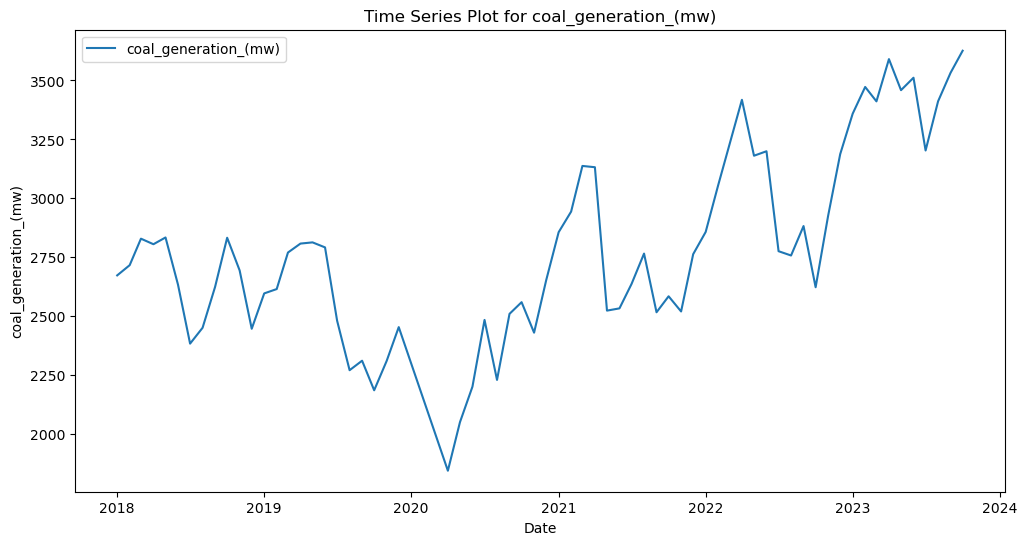

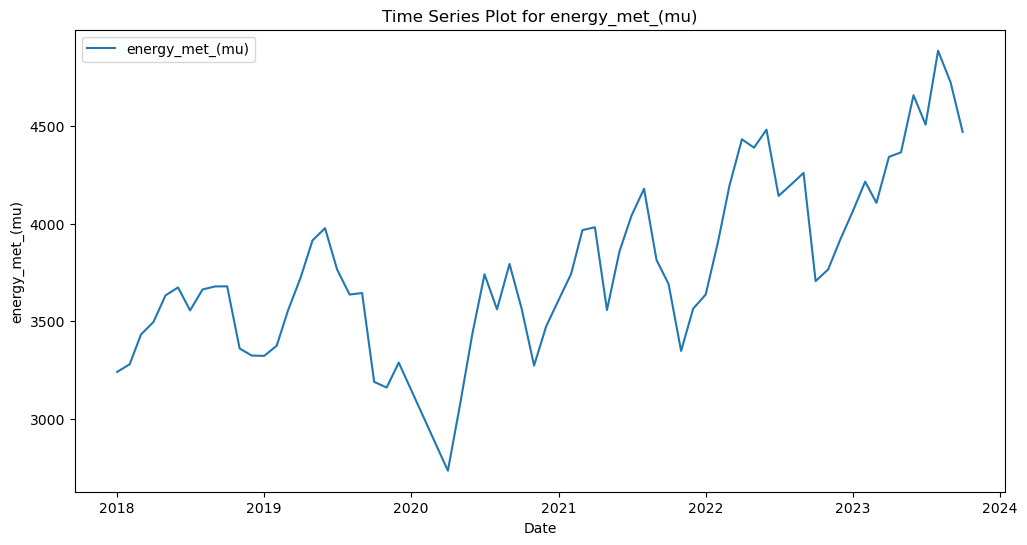

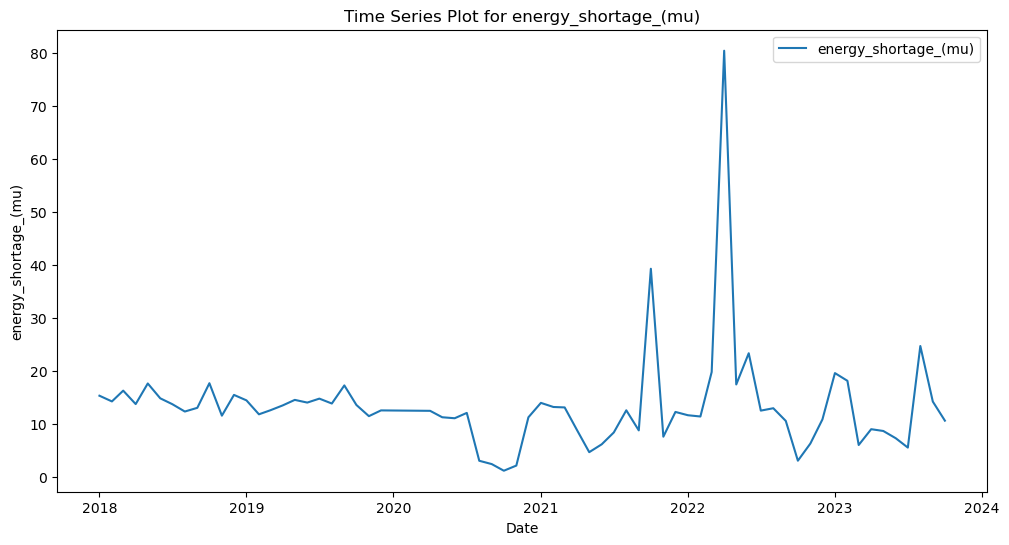

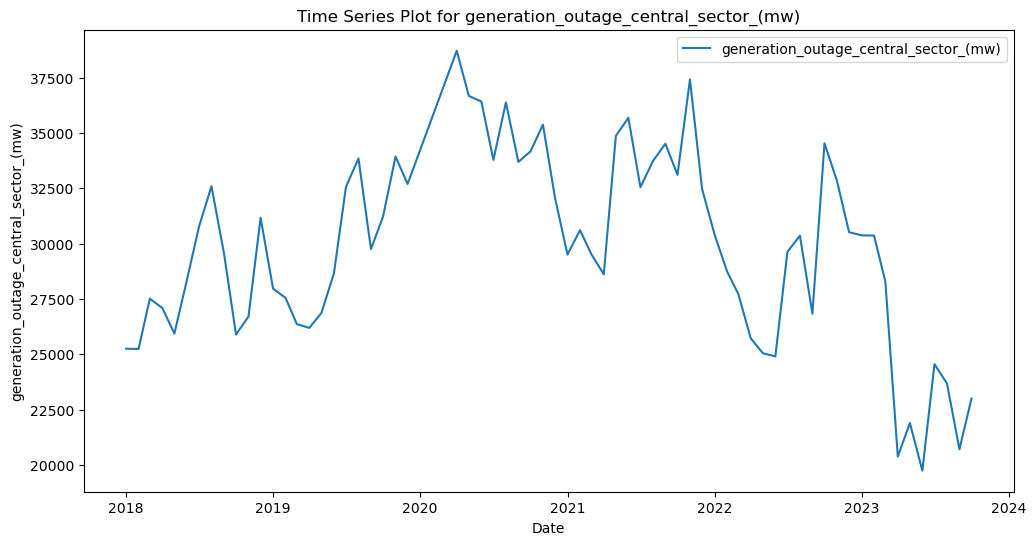

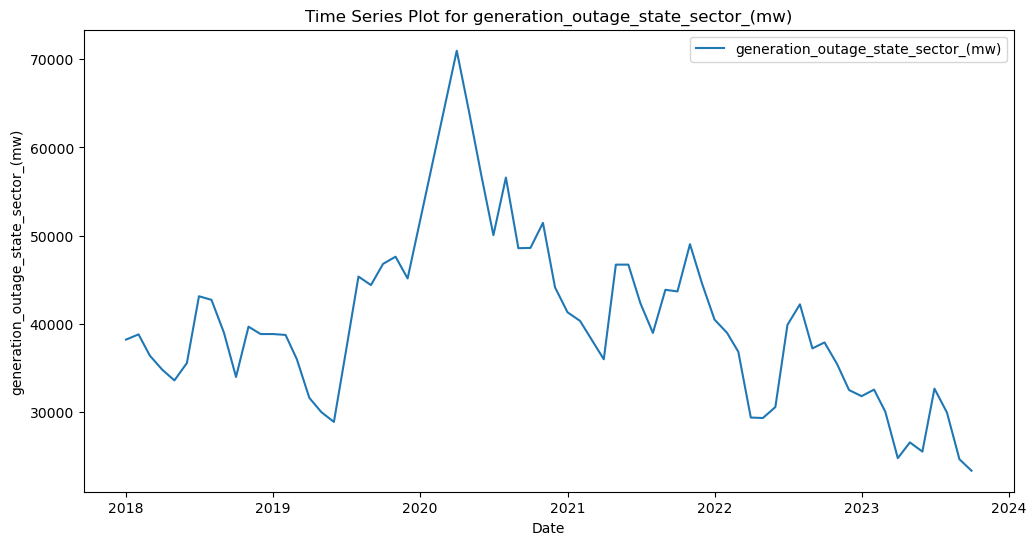

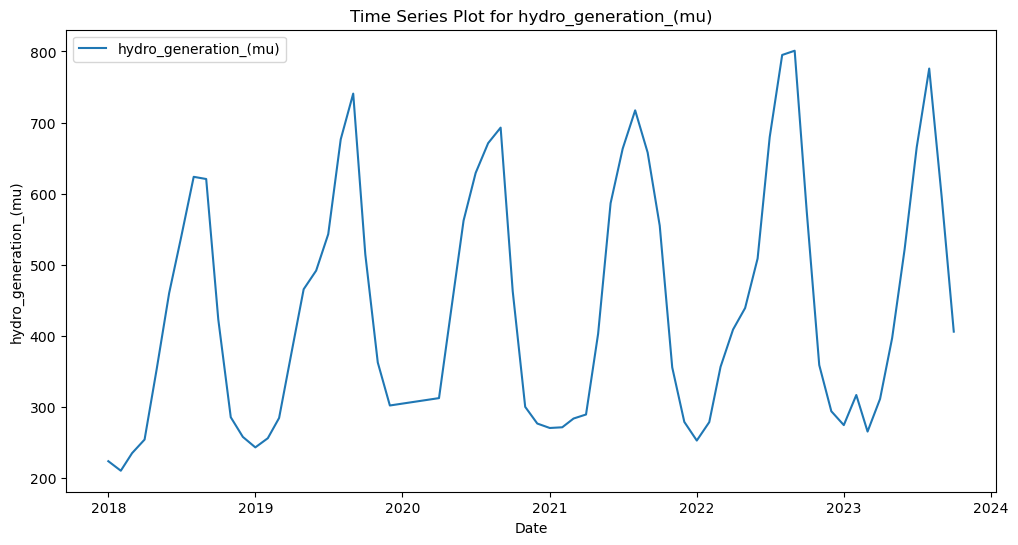

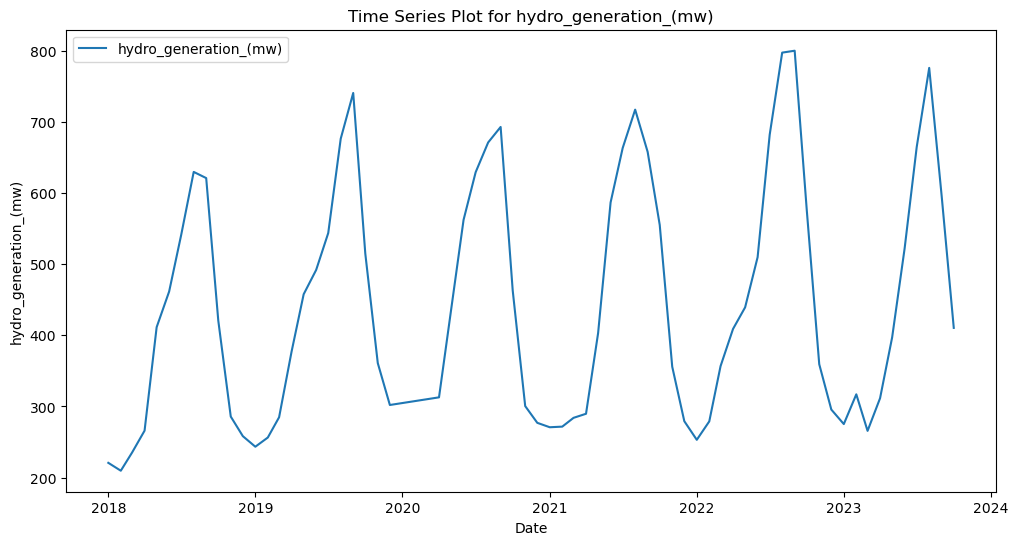

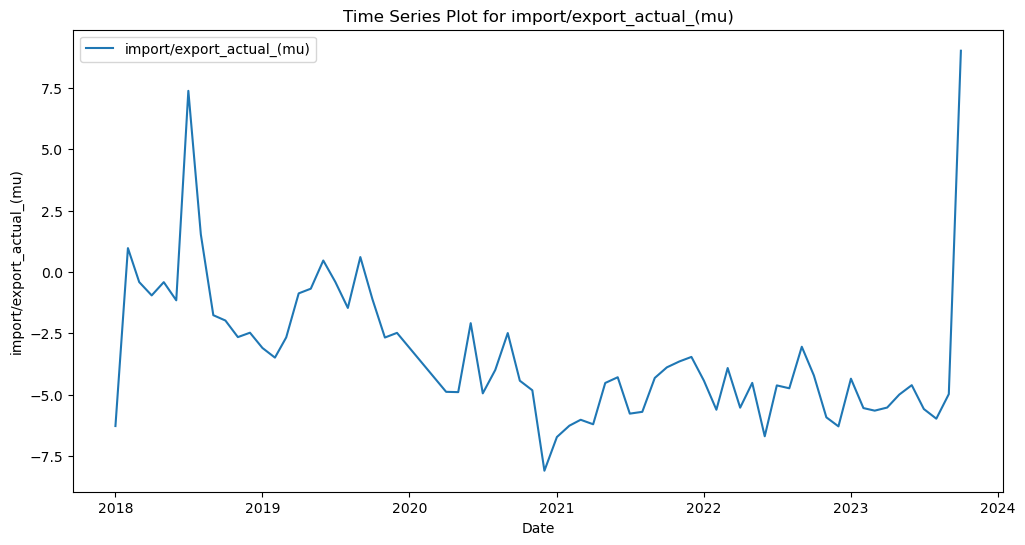

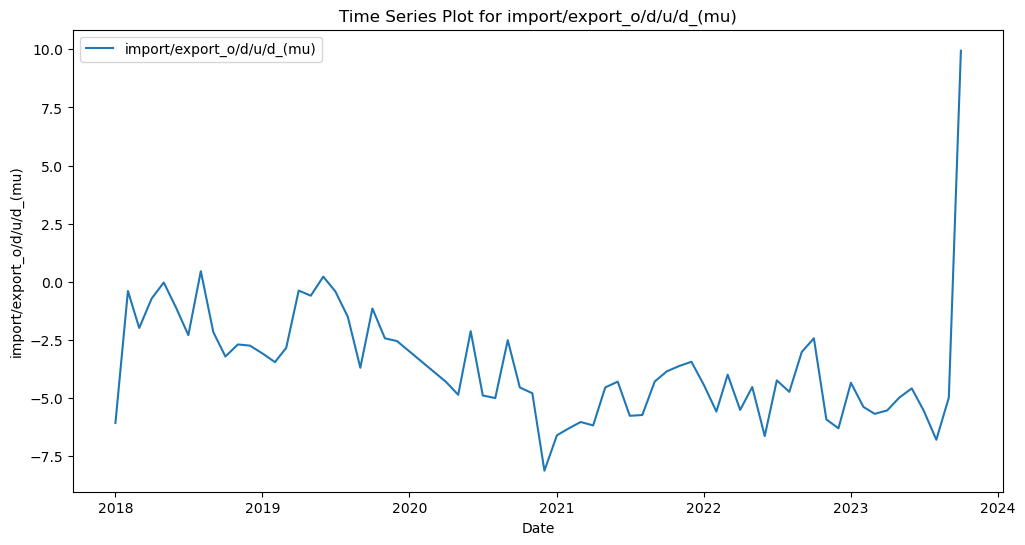

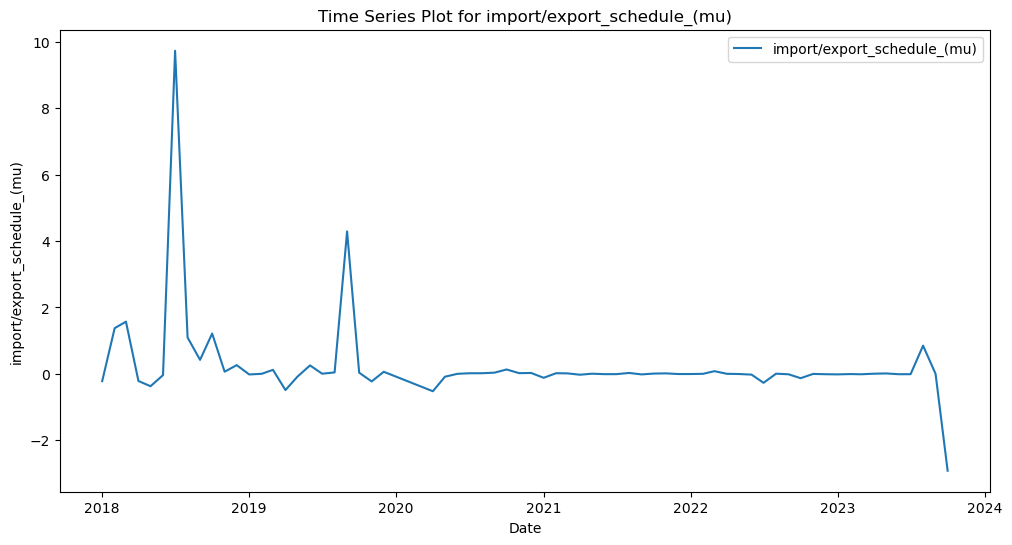

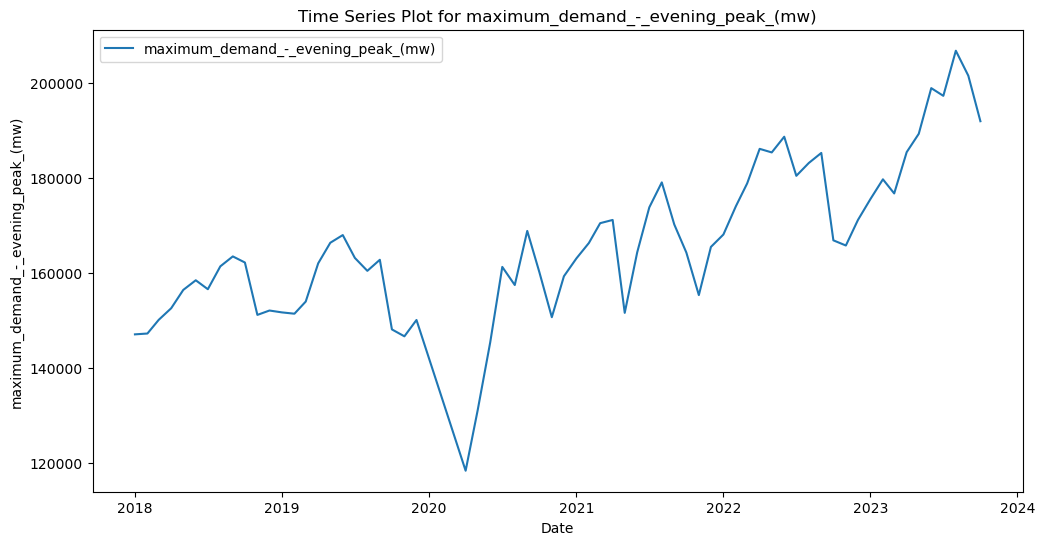

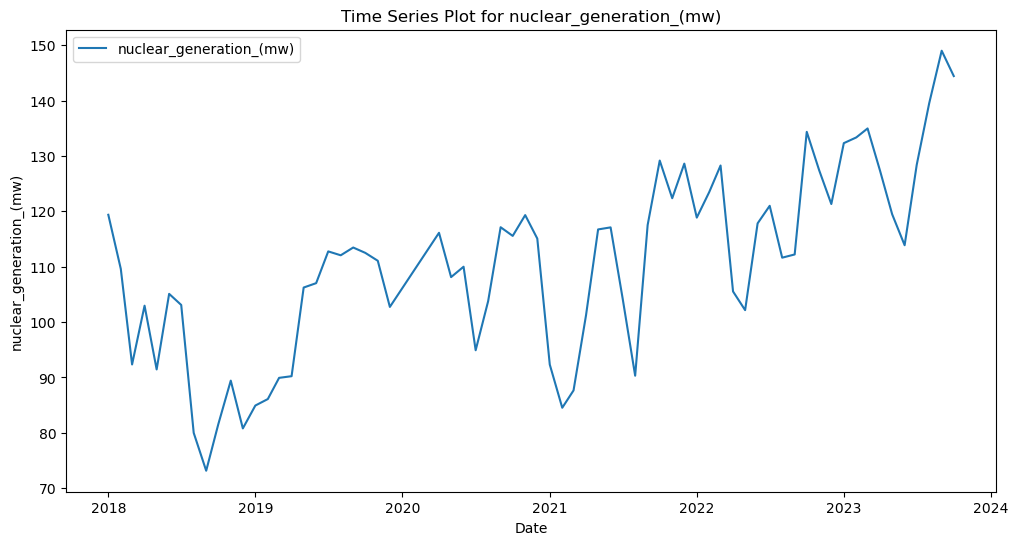

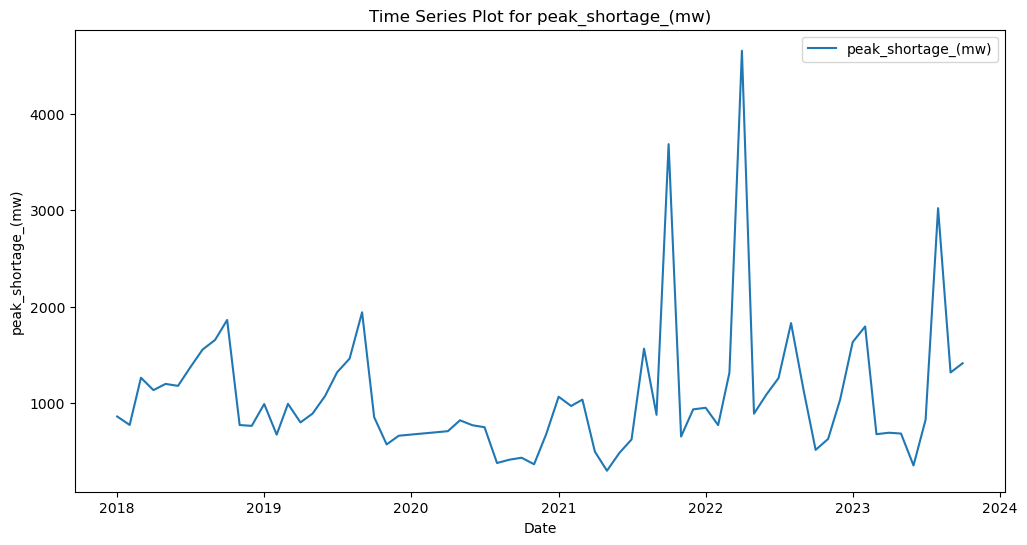

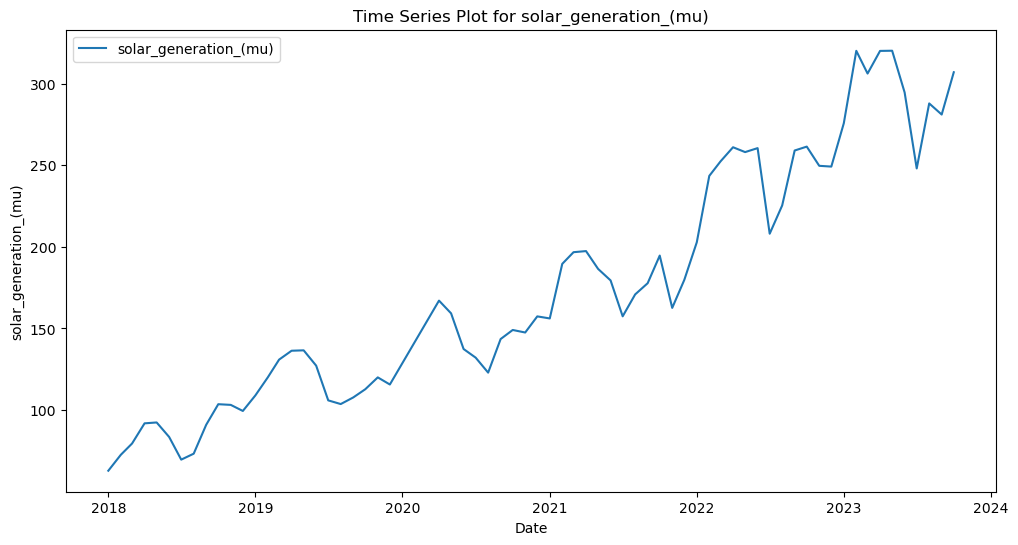

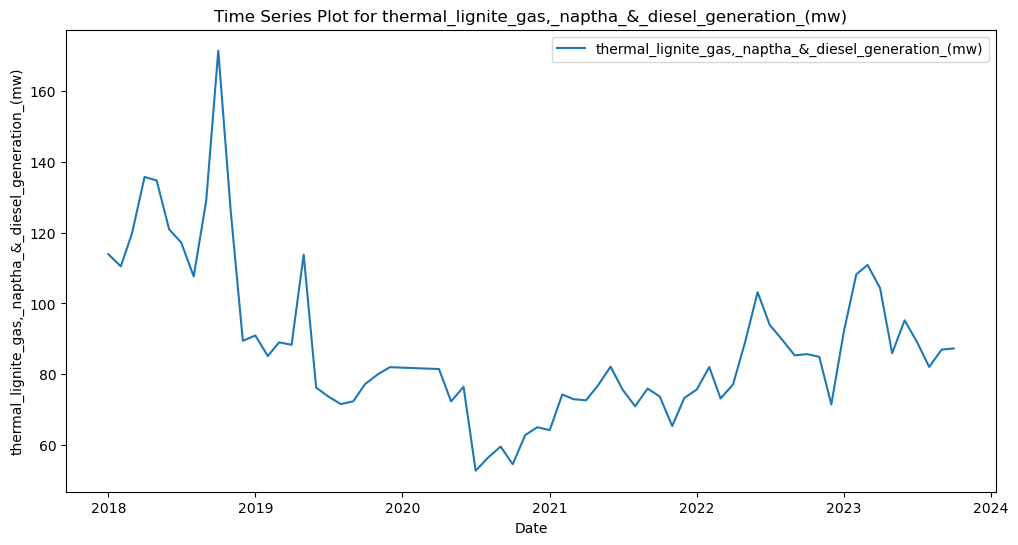

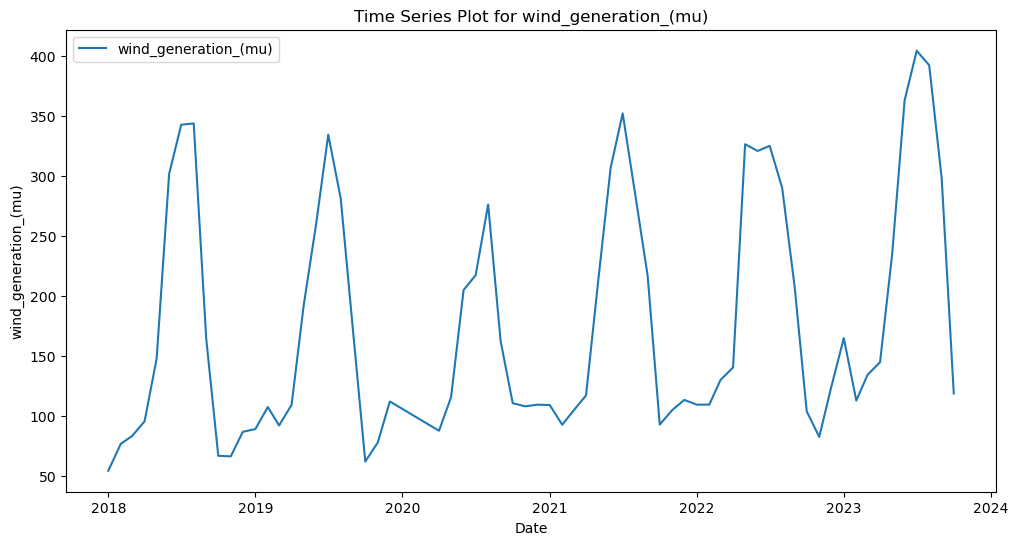

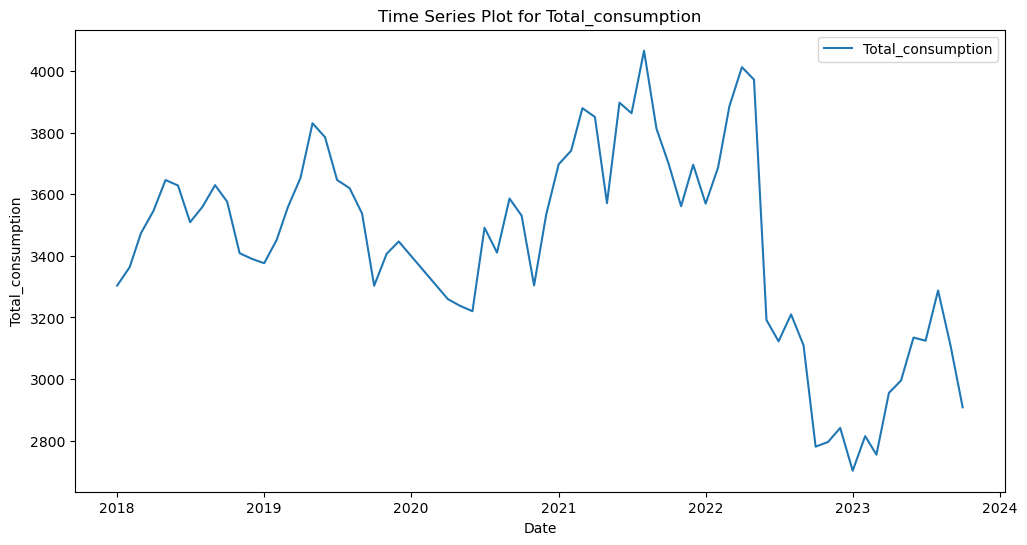

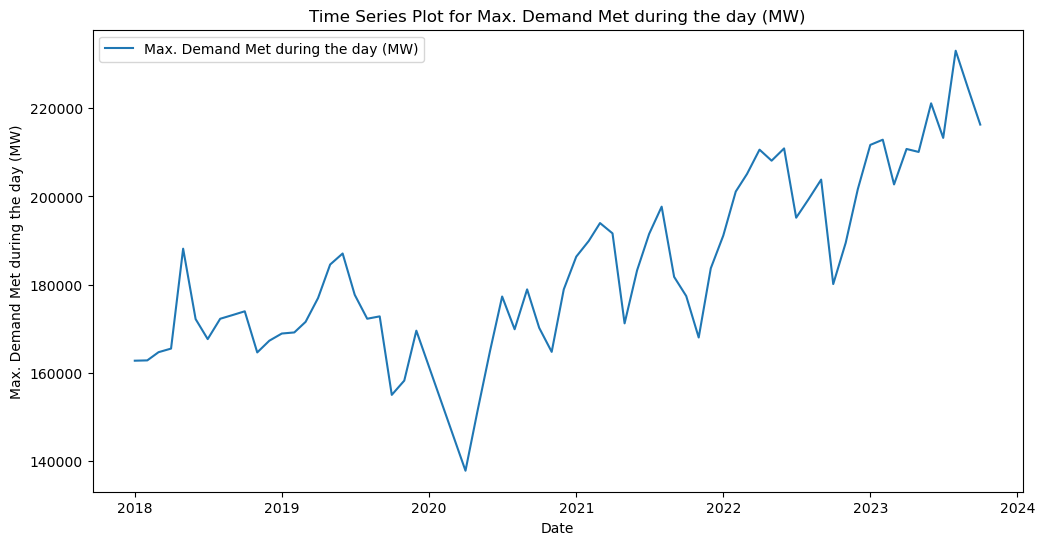

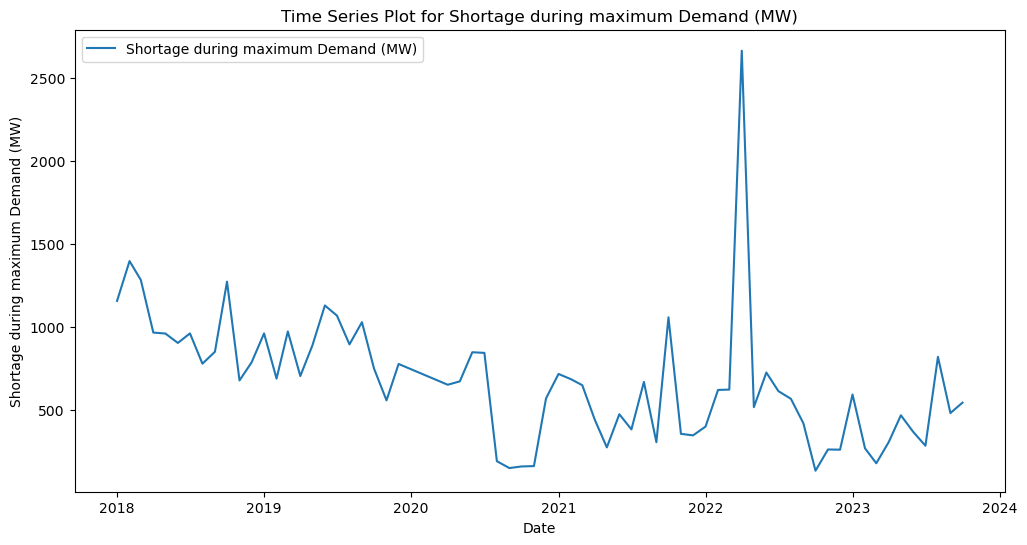

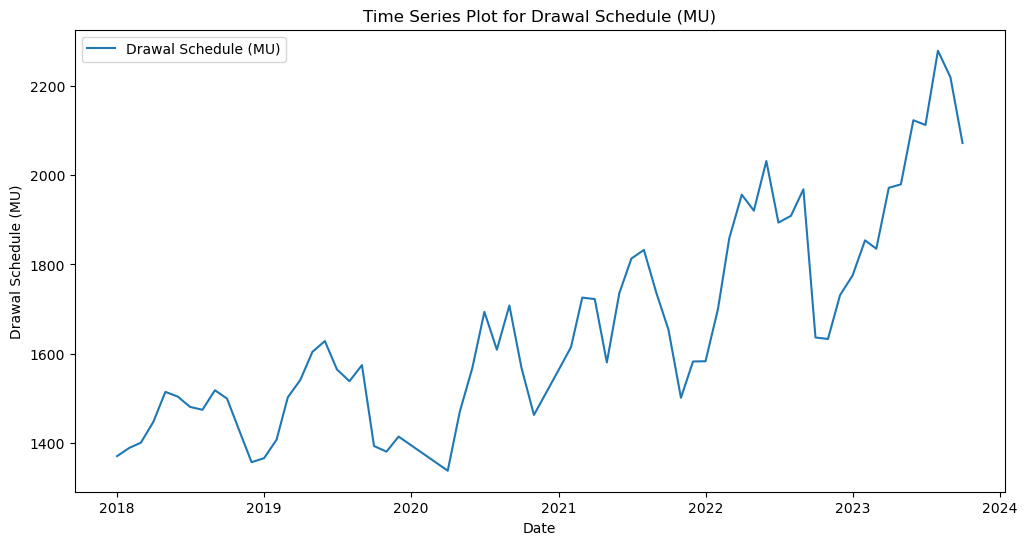

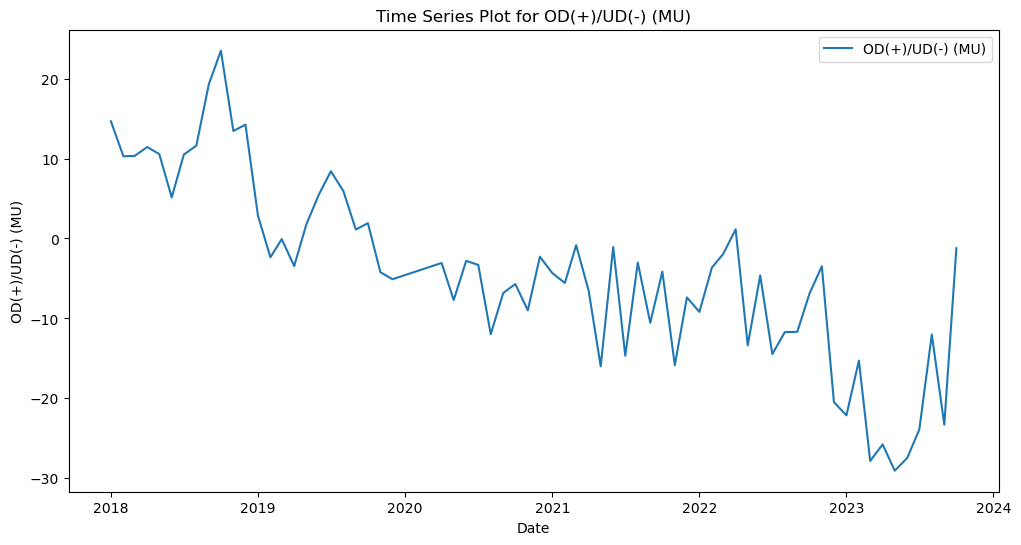

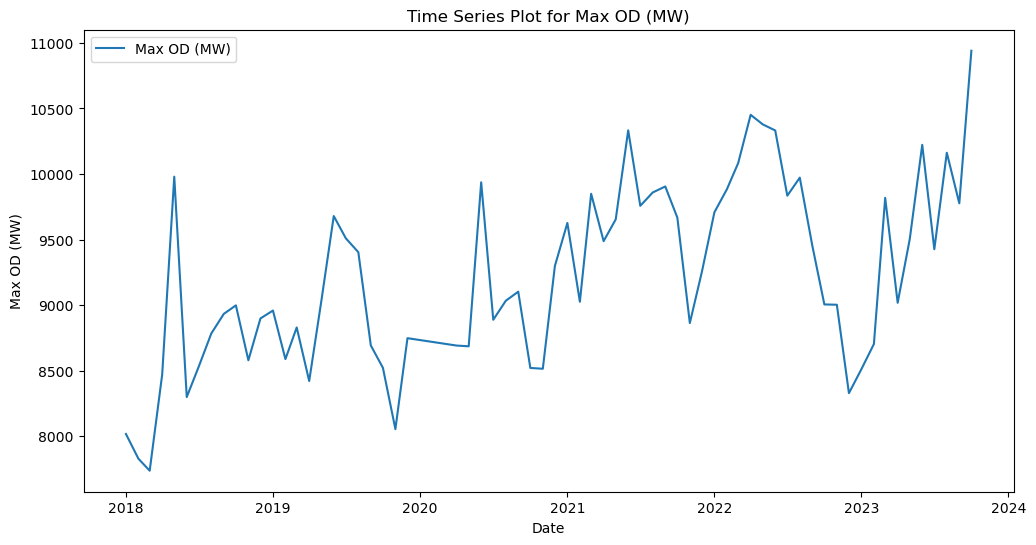

In [99]:
import matplotlib.pyplot as plt

# Convert 'Date' column back to datetime format
monthly_df3.index = monthly_df3.index.to_timestamp()

# Plot time series for each column
for column in monthly_df3.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_df3.index, monthly_df3[column], label=column)
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()


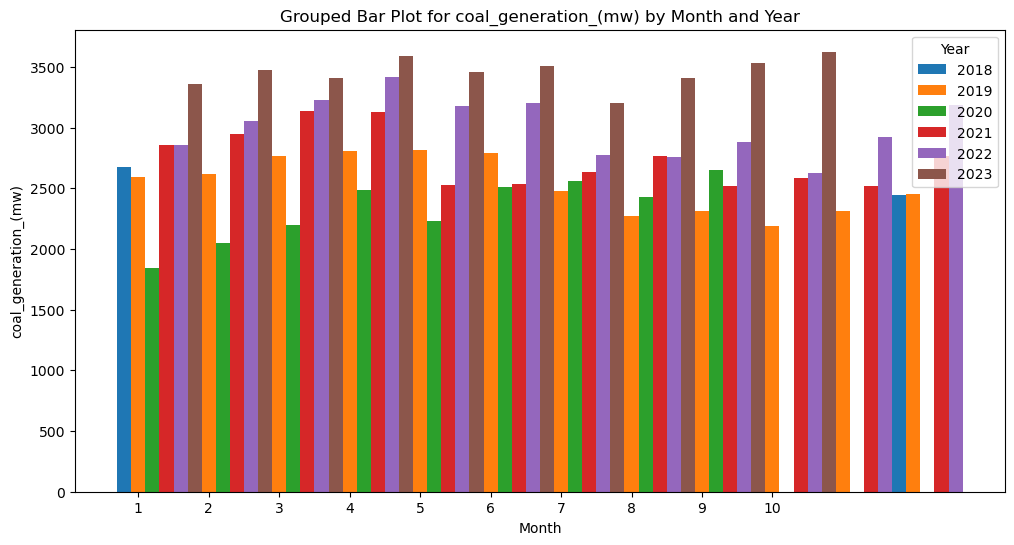

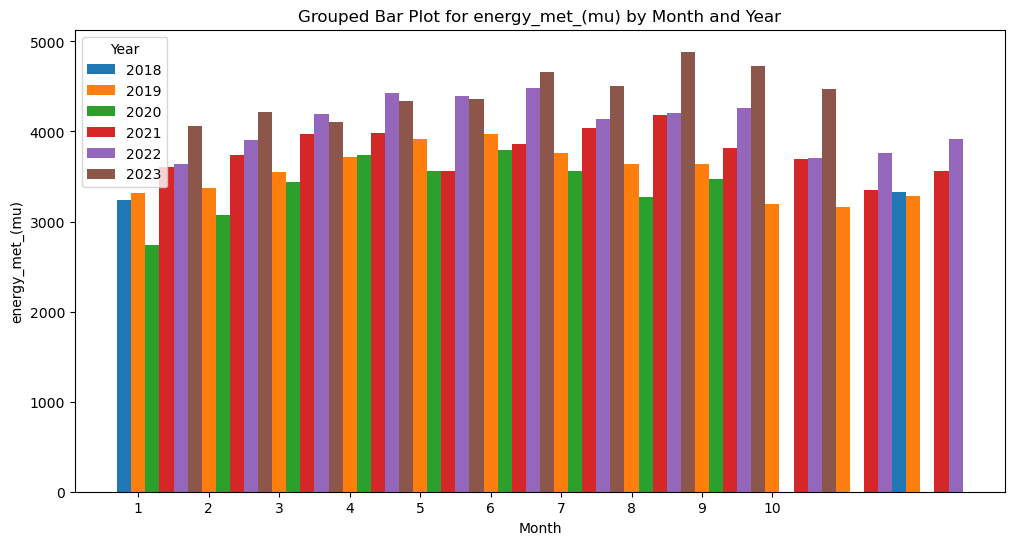

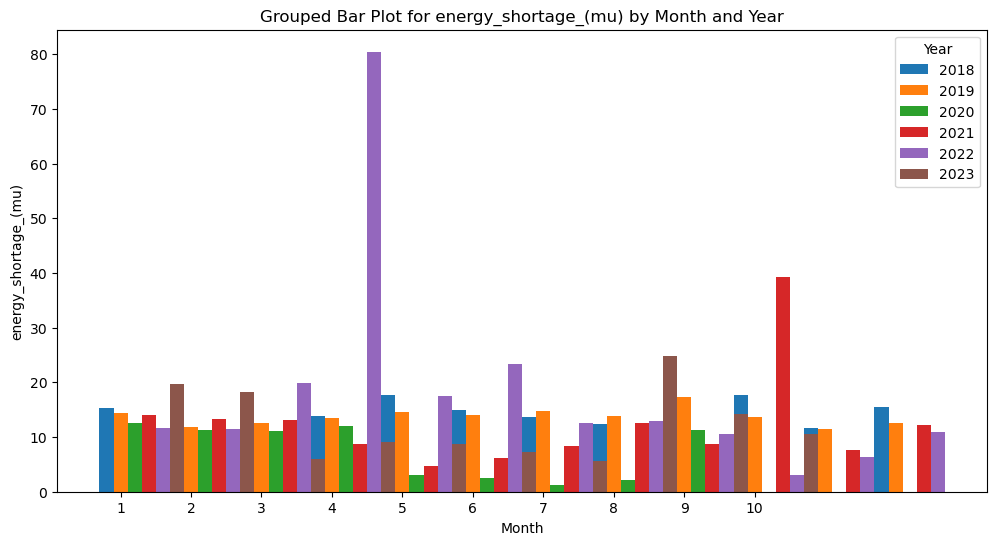

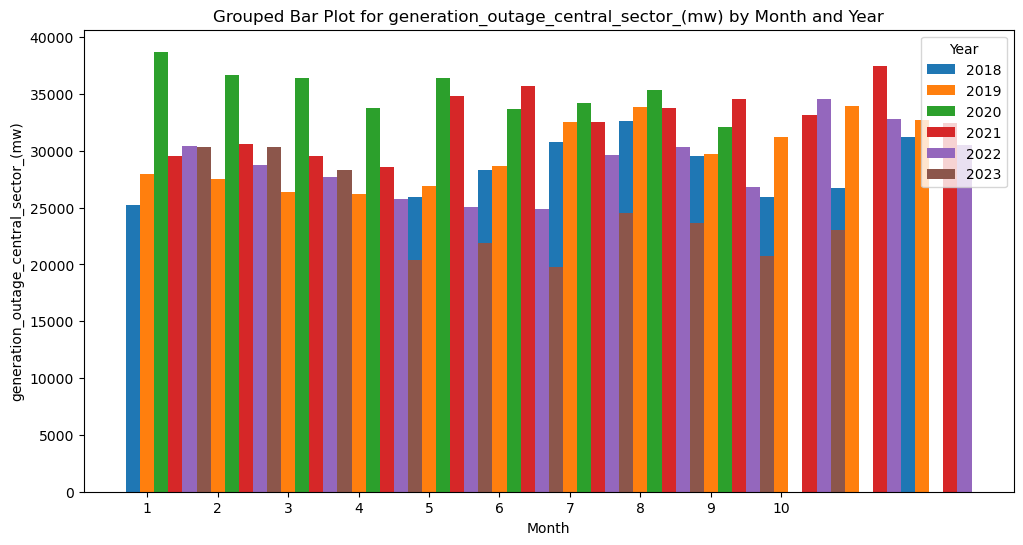

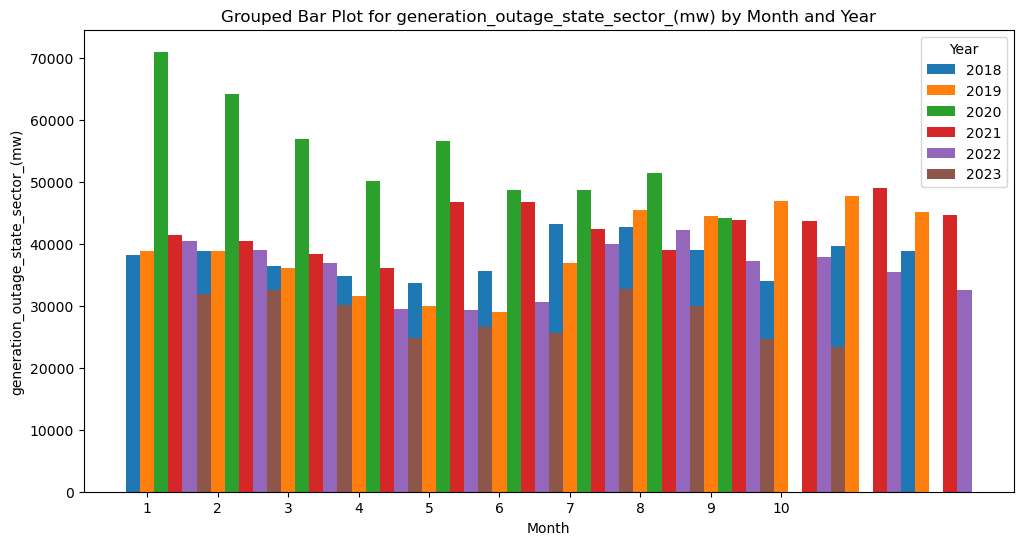

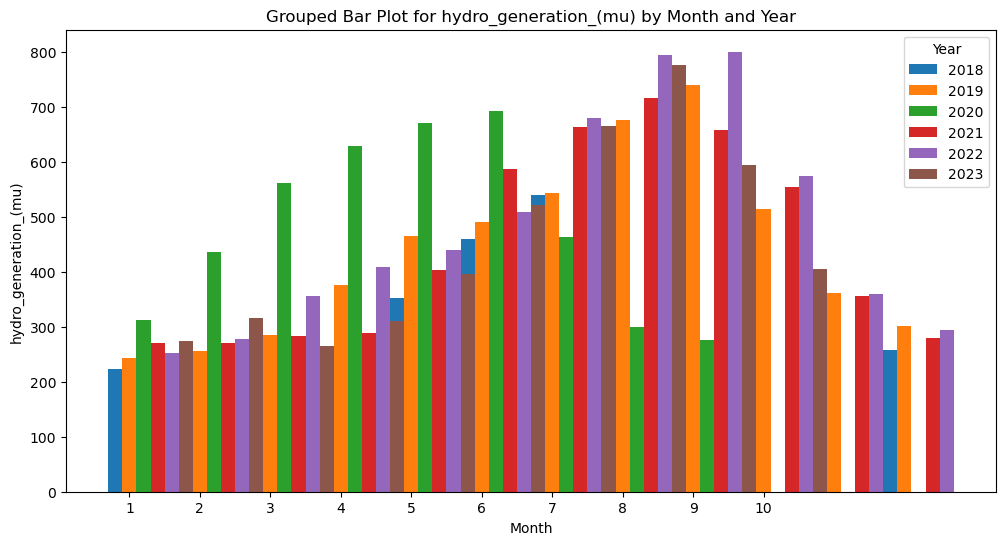

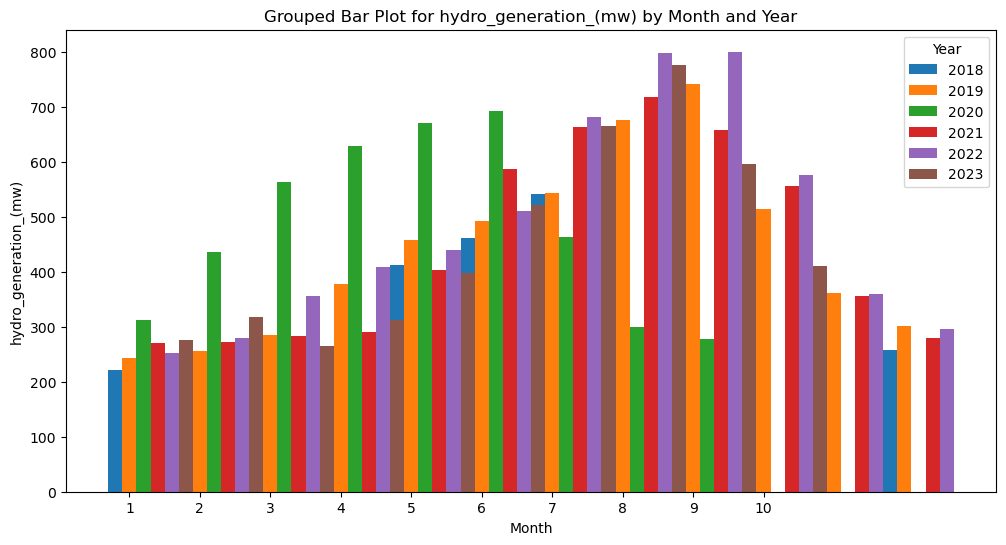

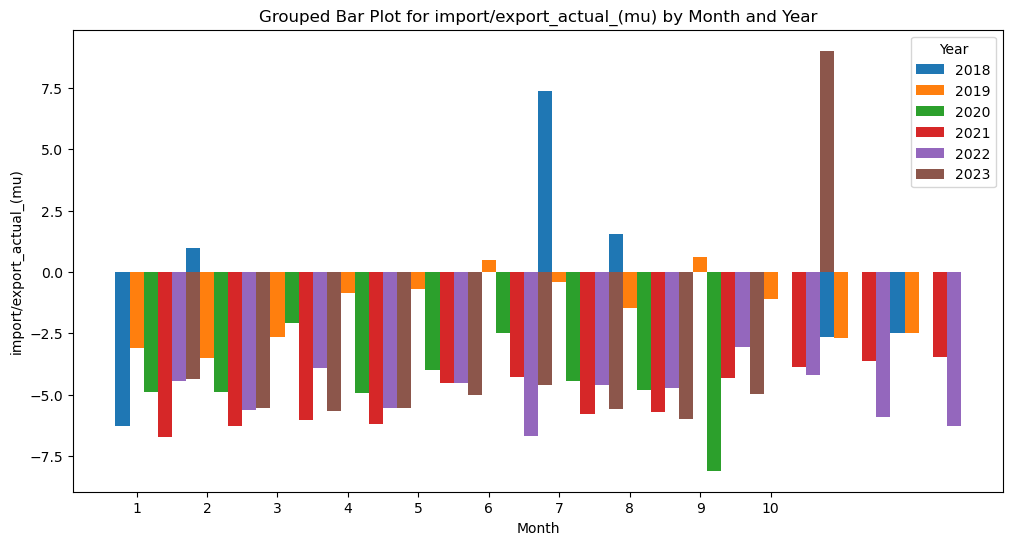

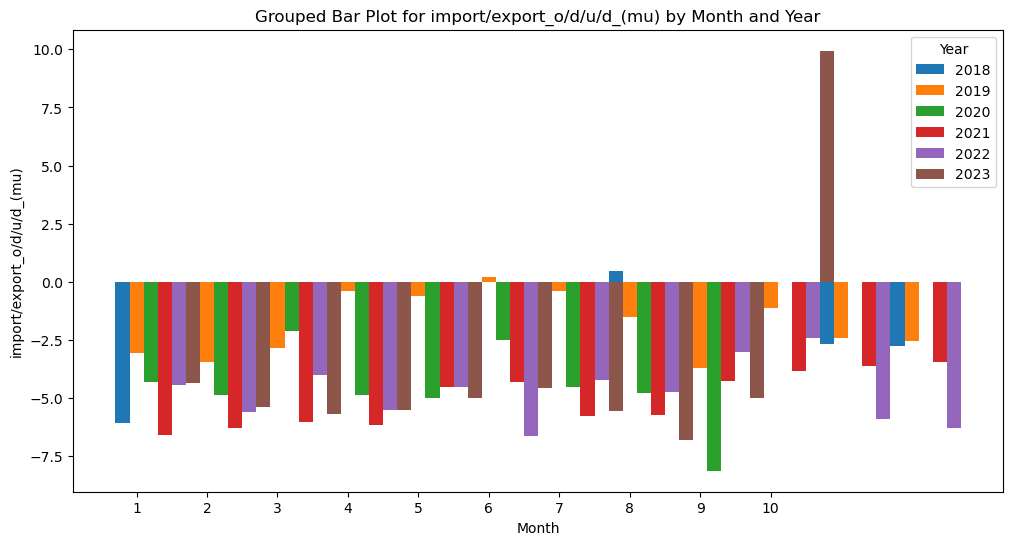

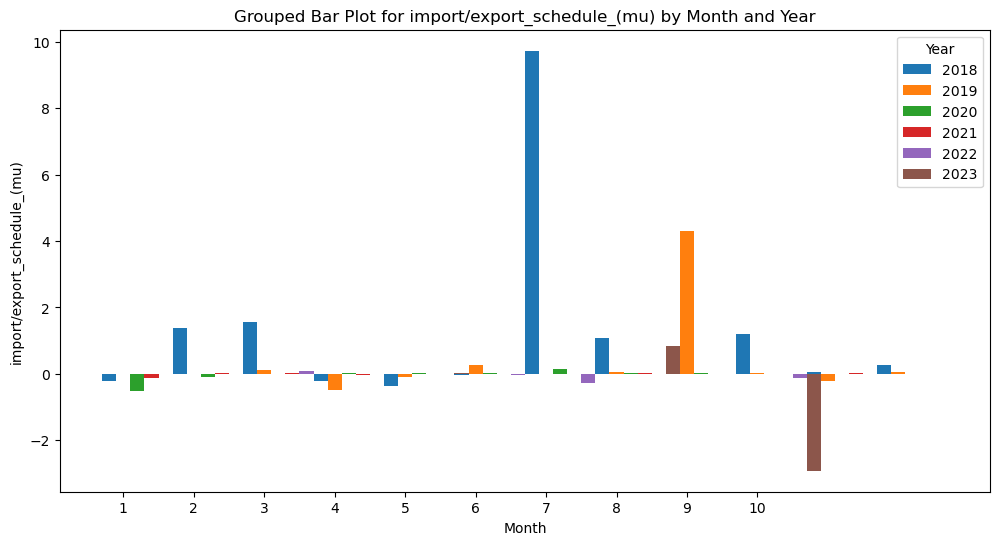

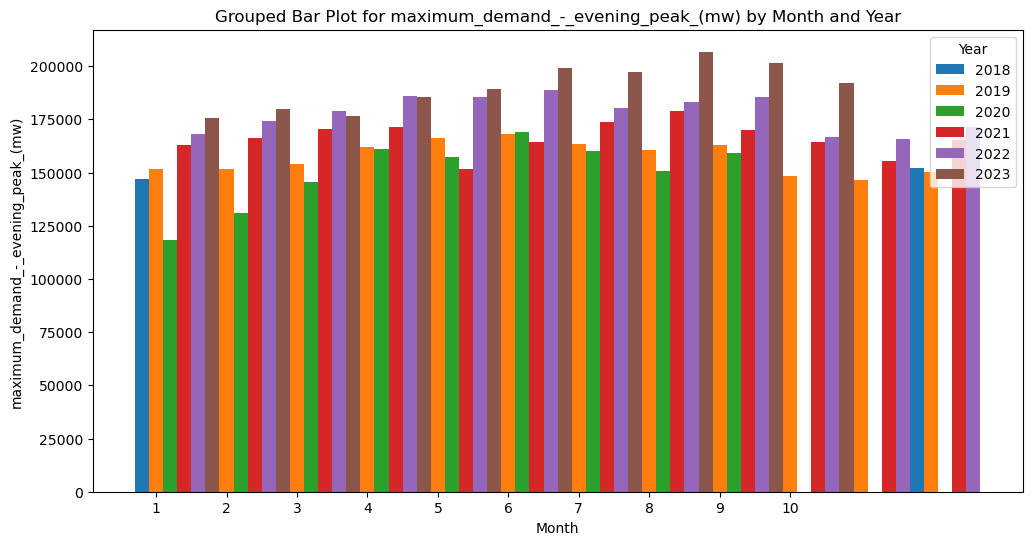

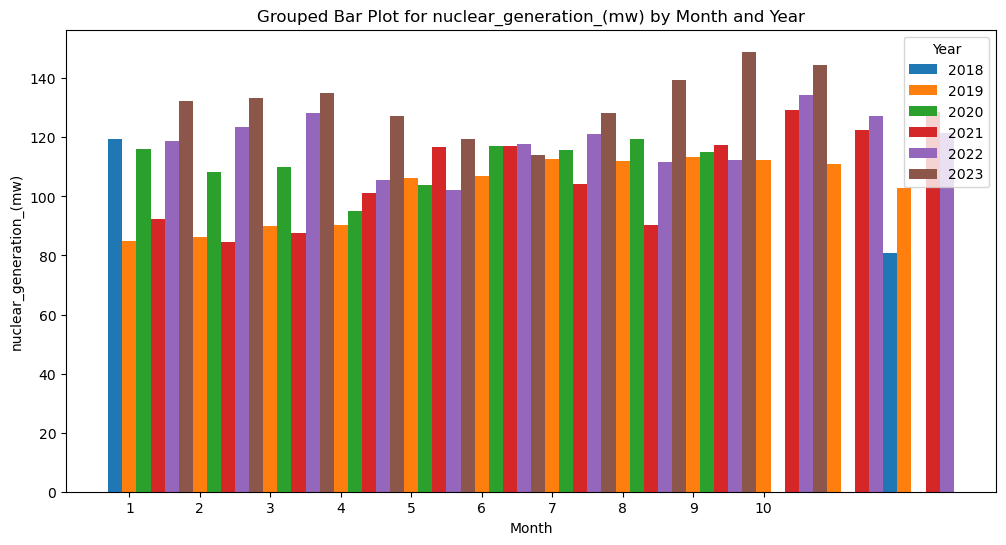

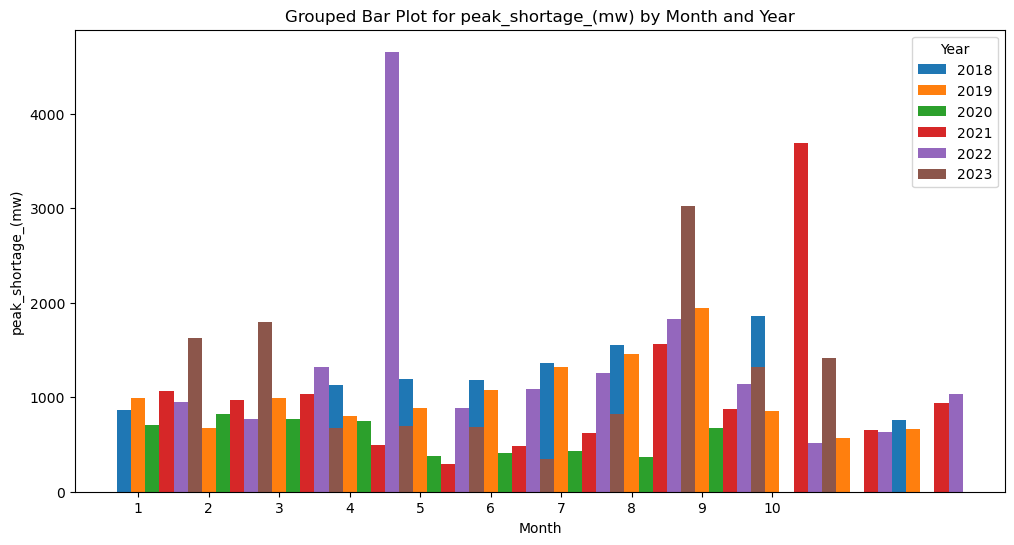

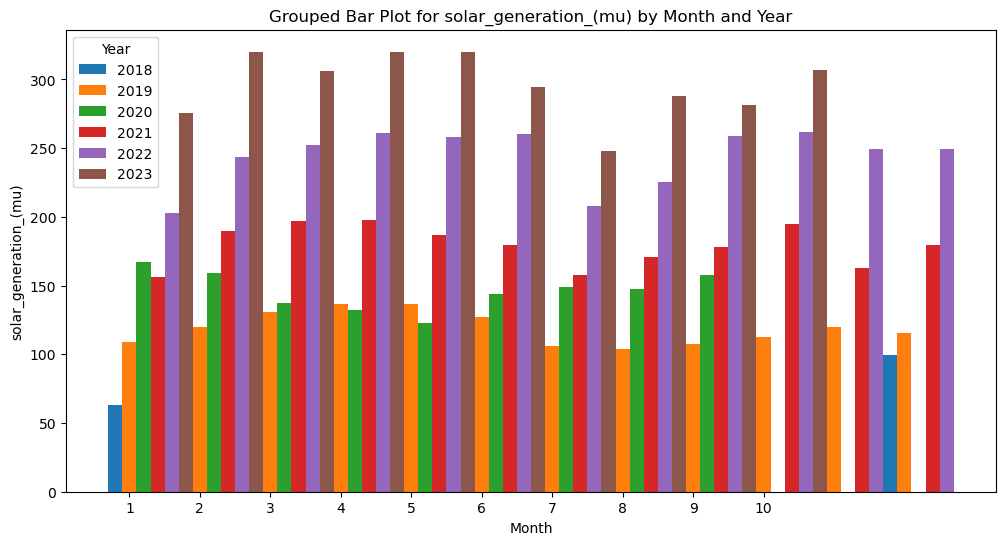

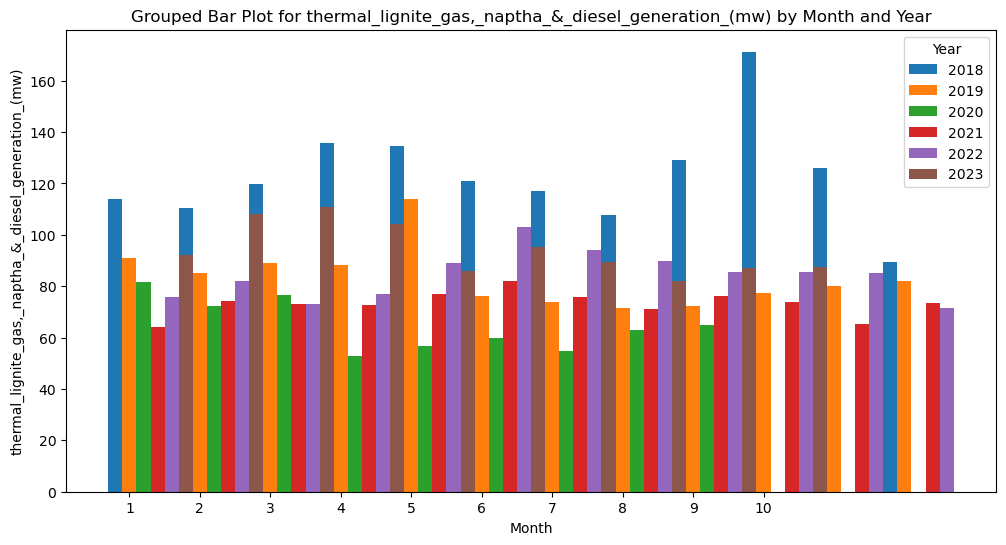

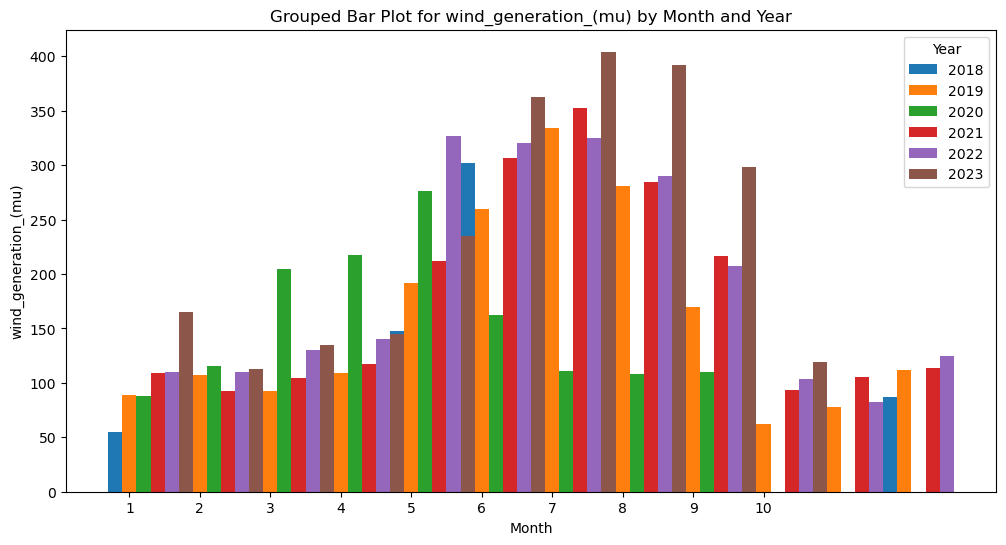

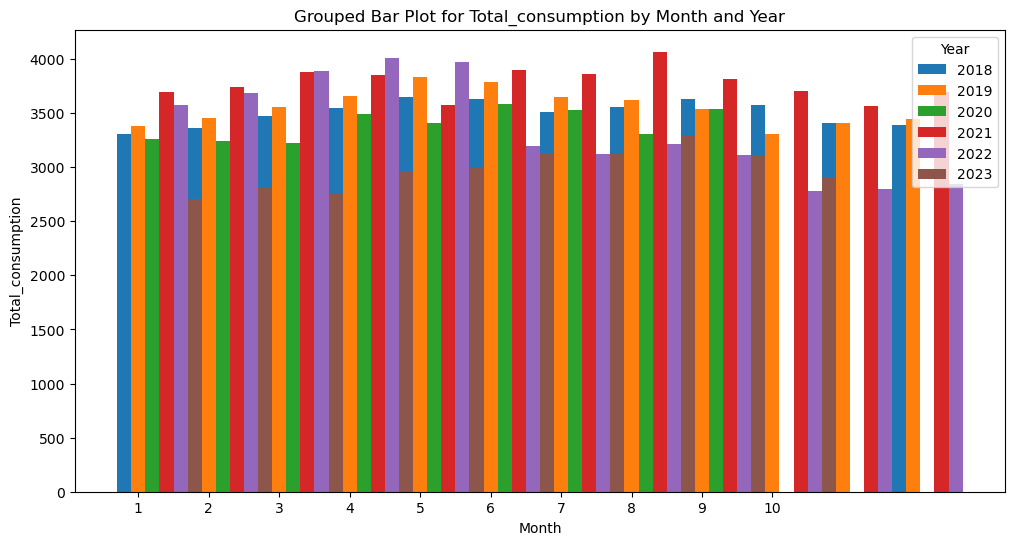

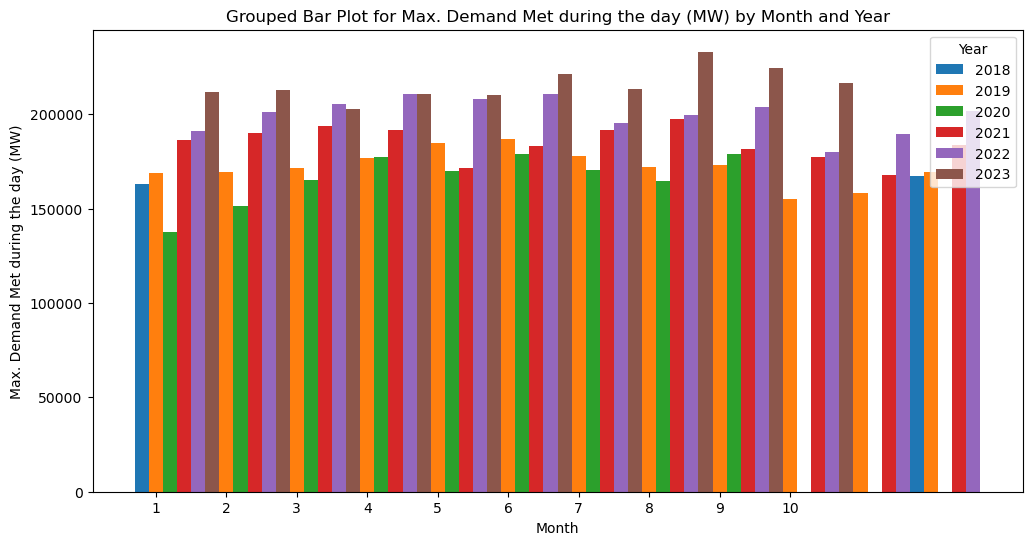

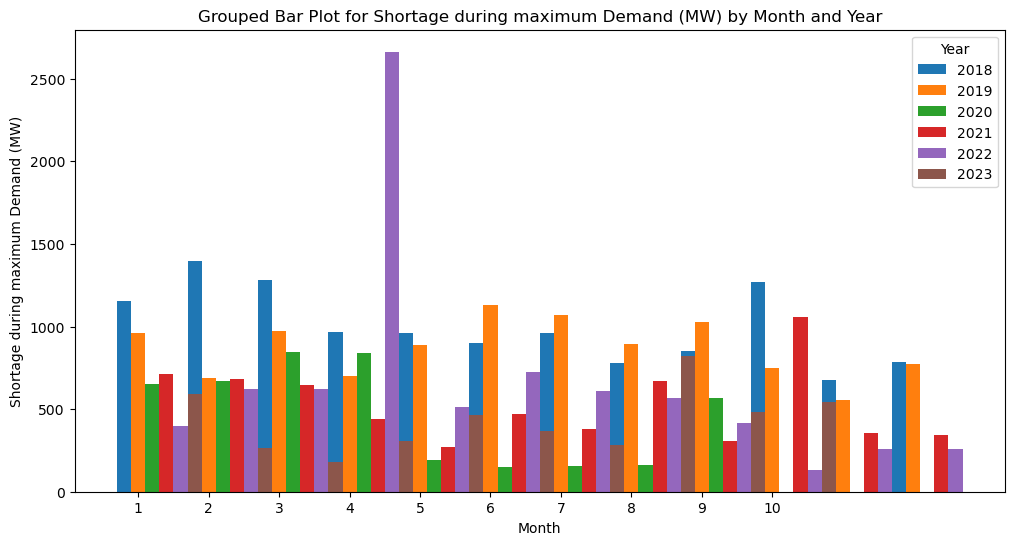

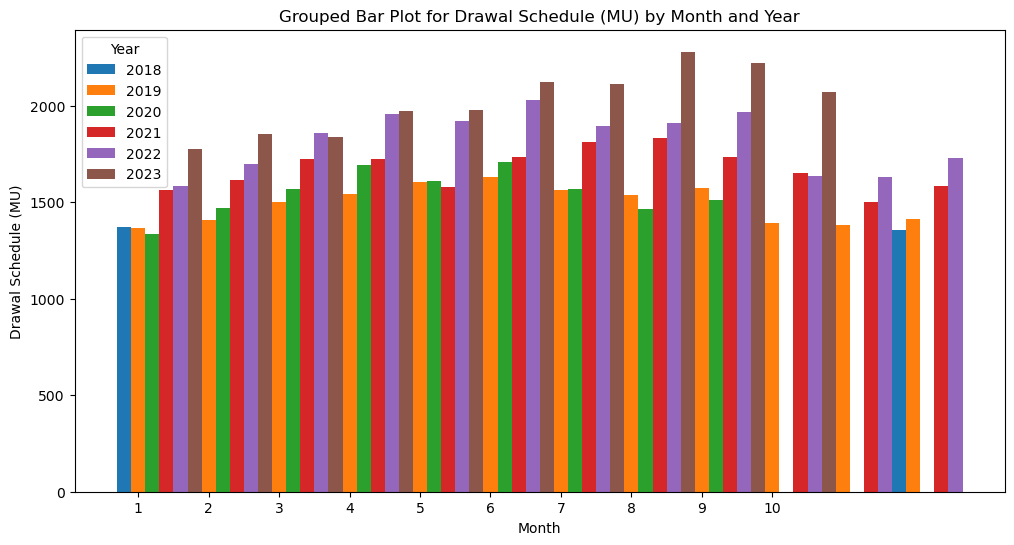

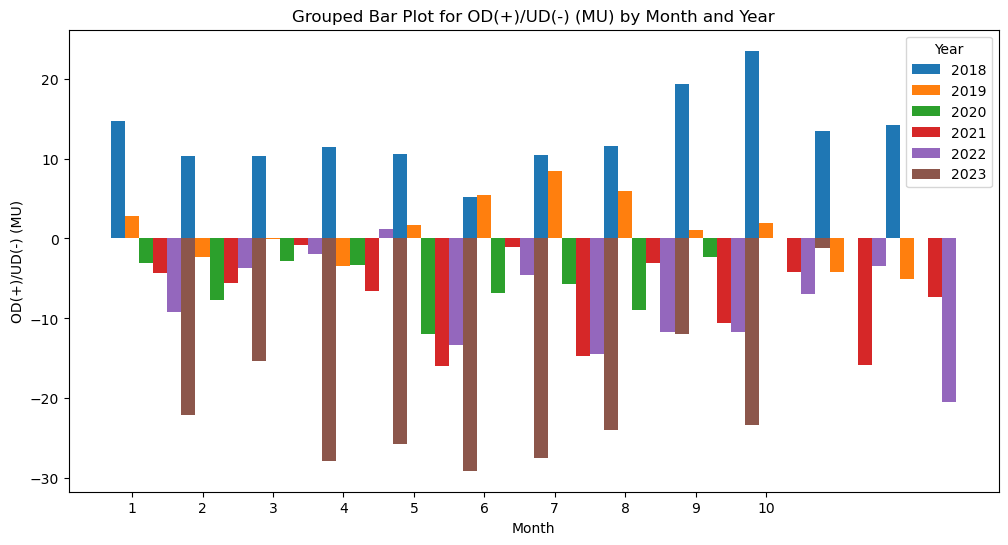

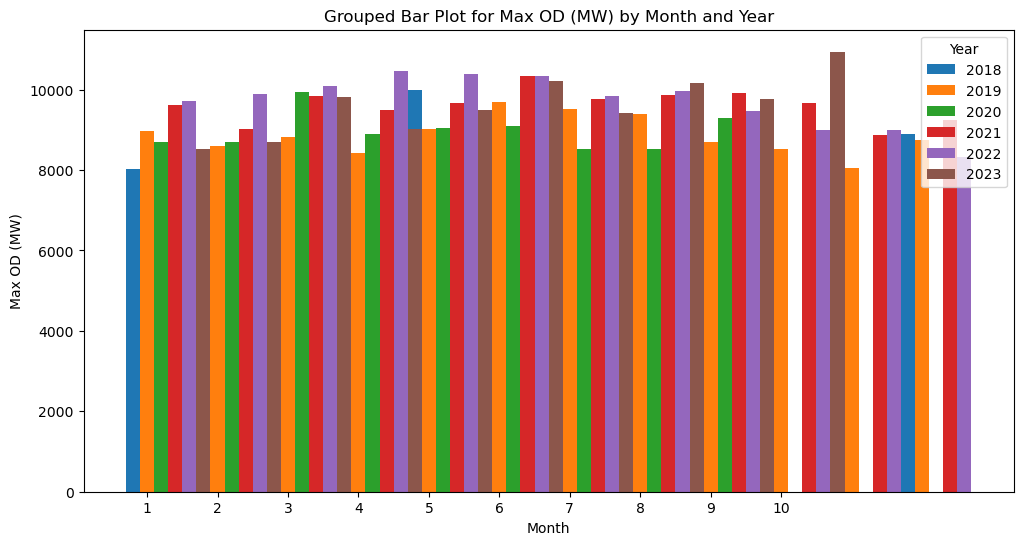

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Extract years and months from the index
monthly_df3['Year'] = monthly_df3.index.year
monthly_df3['Month'] = monthly_df3.index.month

# List of unique years
years = monthly_df3['Year'].unique()

# Iterate through each column and create a grouped bar plot
for column in monthly_df3.columns[:-2]:  # Exclude 'Year' and 'Month' columns
    plt.figure(figsize=(12, 6))
    
    for year in years:
        data_year = monthly_df3[monthly_df3['Year'] == year]
        x = np.arange(len(data_year['Month']))
        plt.bar(x + (year - min(years)) * 0.2, data_year[column], width=0.2, label=str(year))

    plt.title(f'Grouped Bar Plot for {column} by Month and Year')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.xticks(x + 0.2, data_year['Month'].unique())  # Assuming all months are present in the last year
    plt.legend(title='Year')
    plt.show()


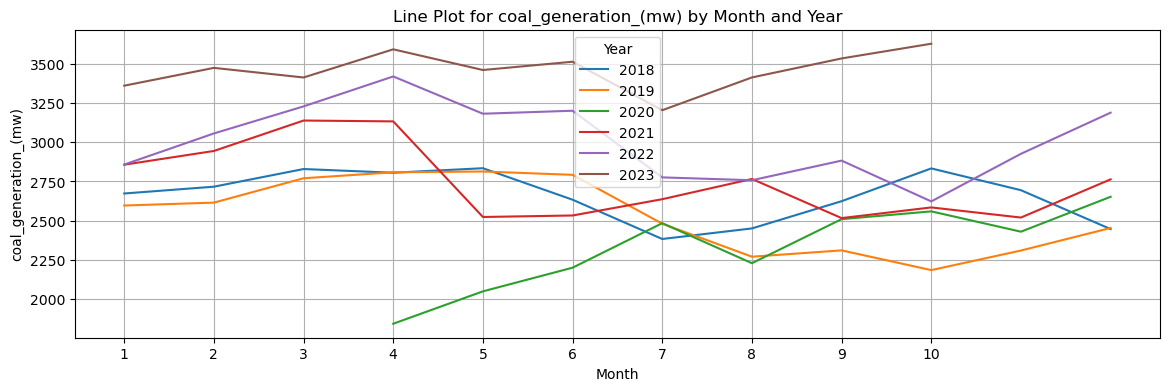

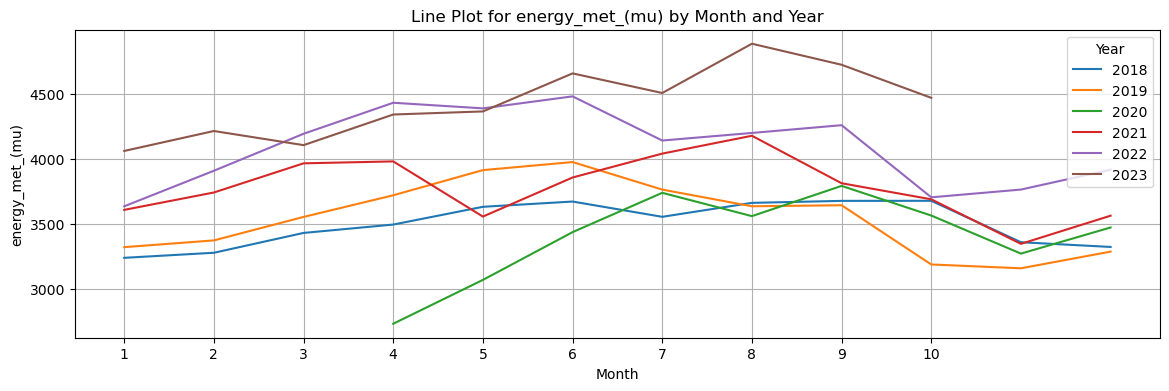

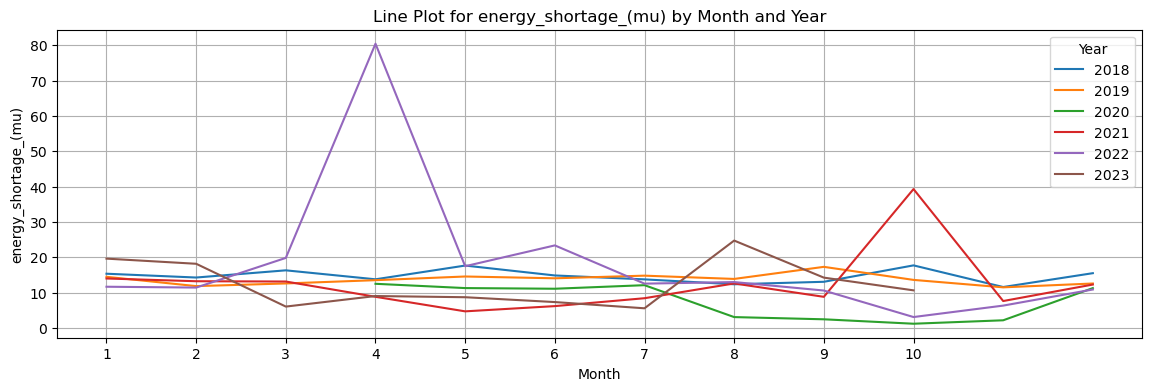

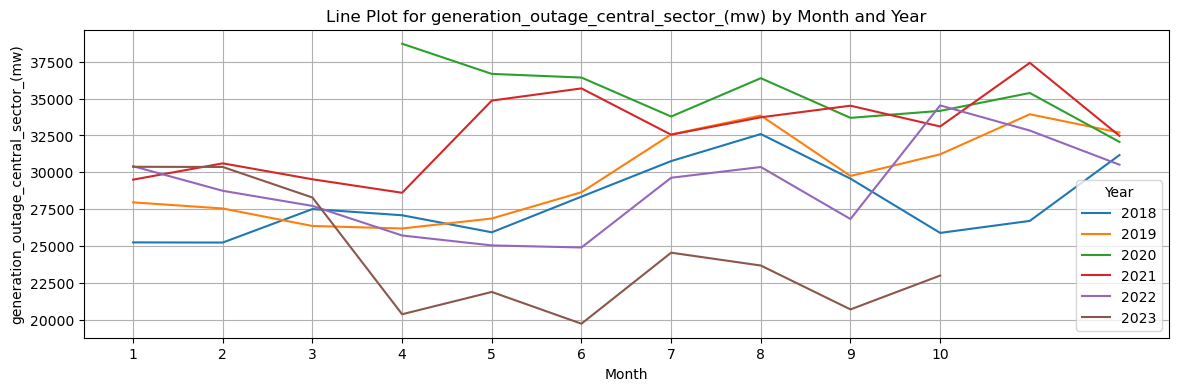

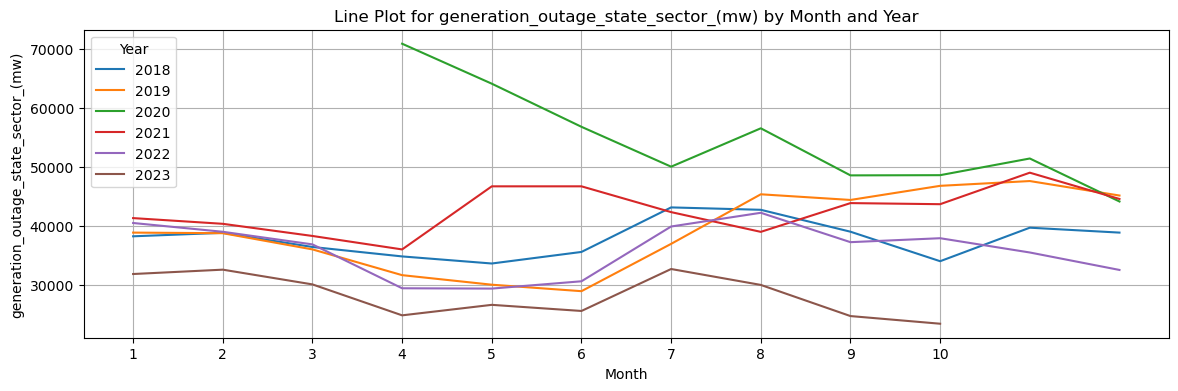

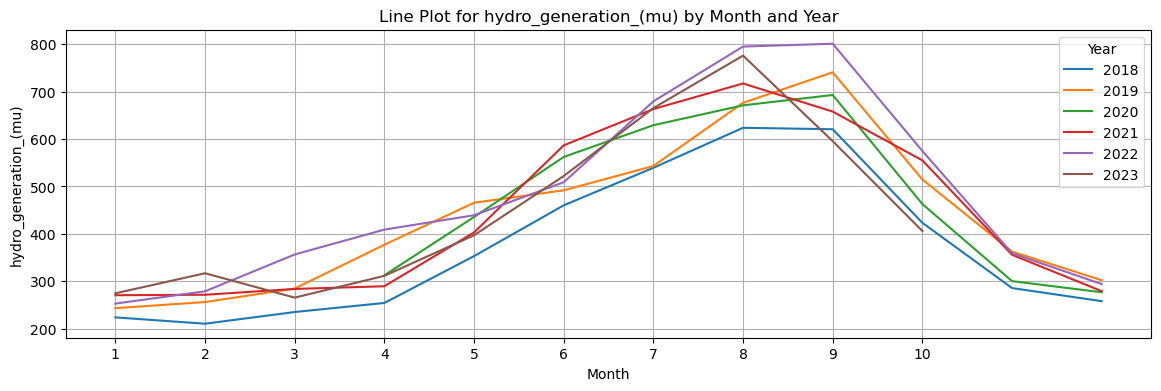

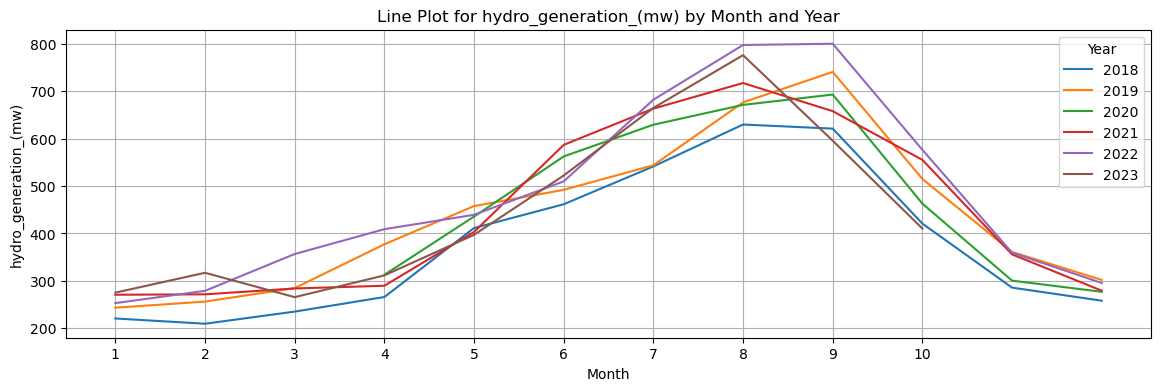

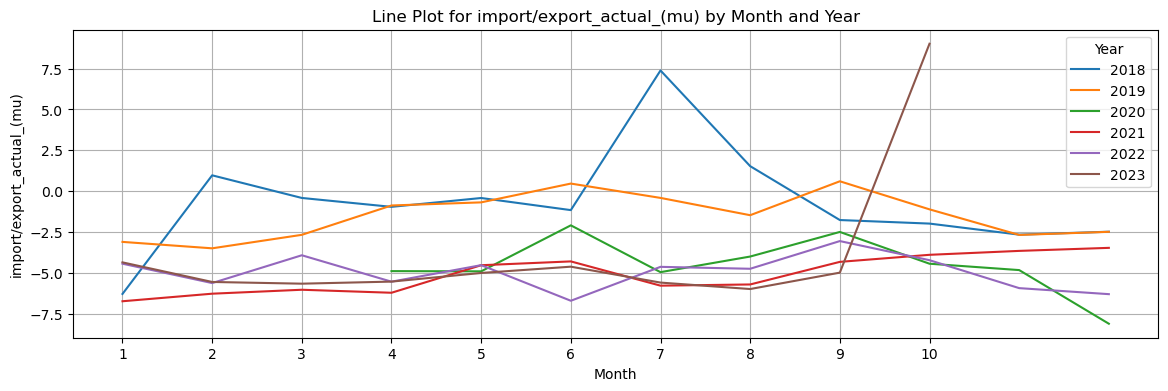

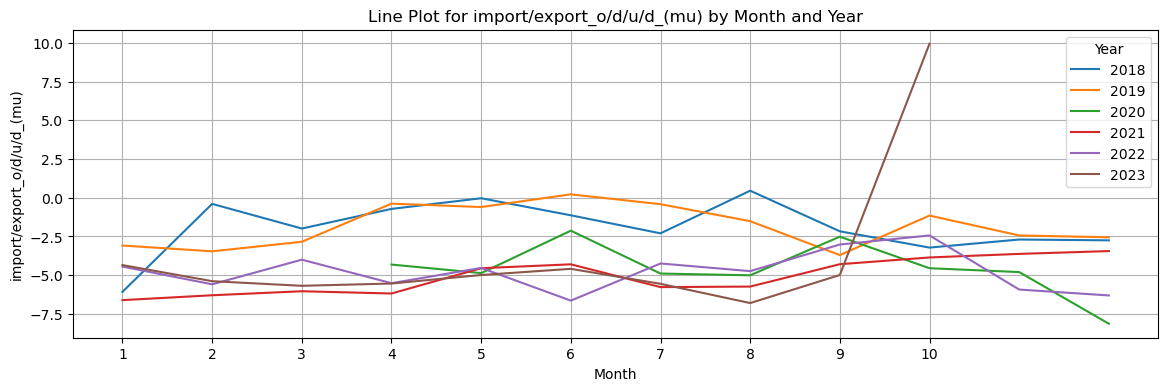

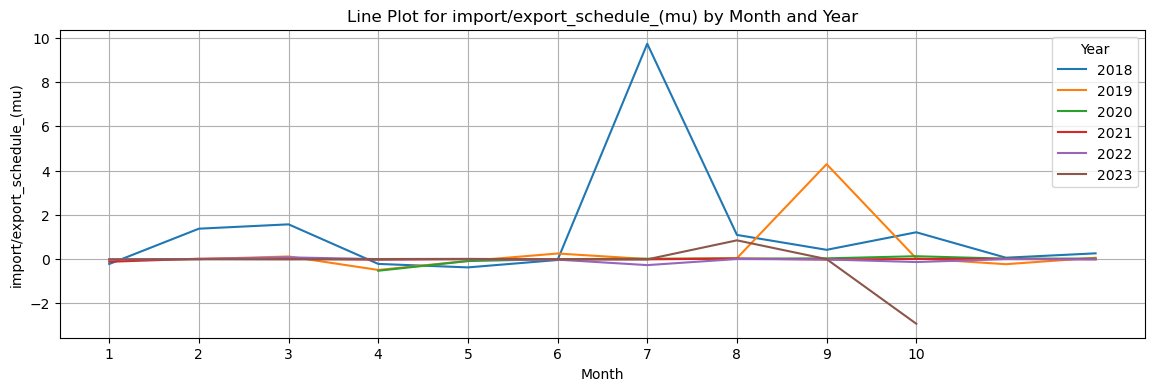

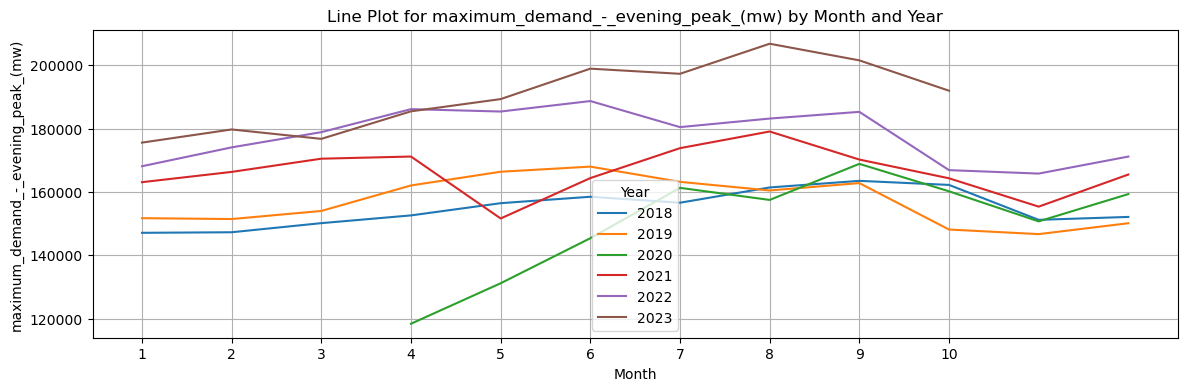

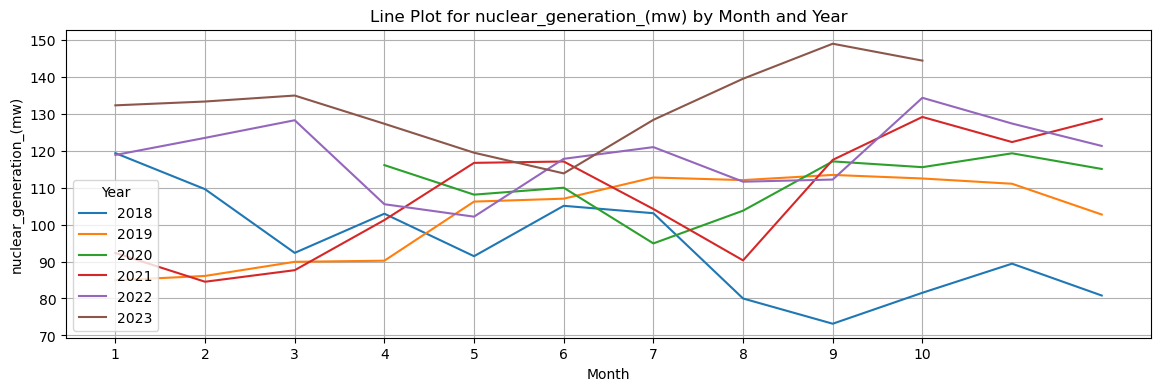

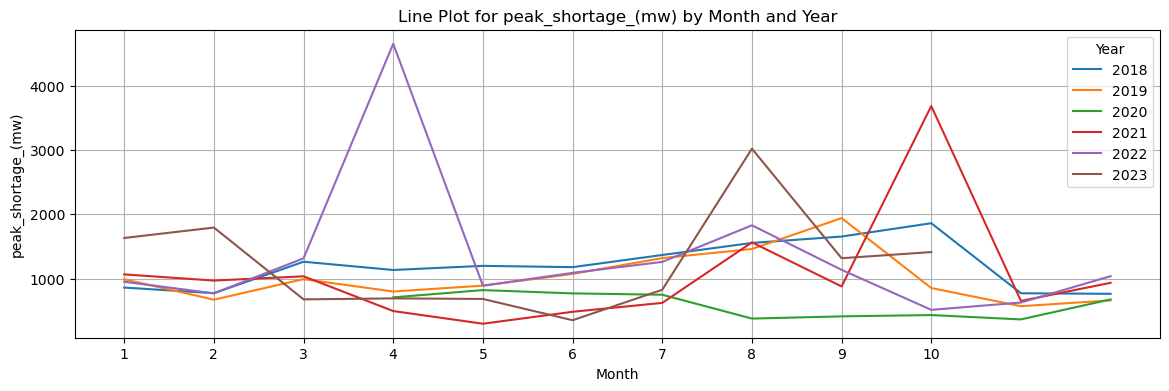

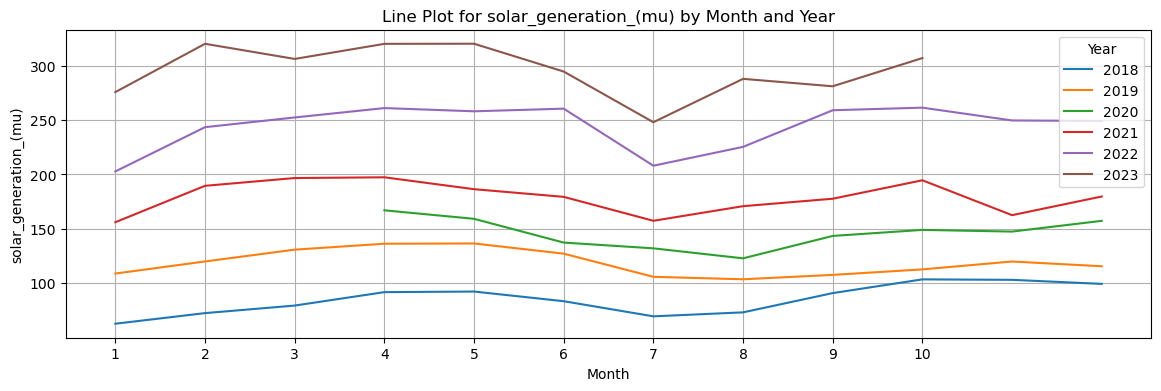

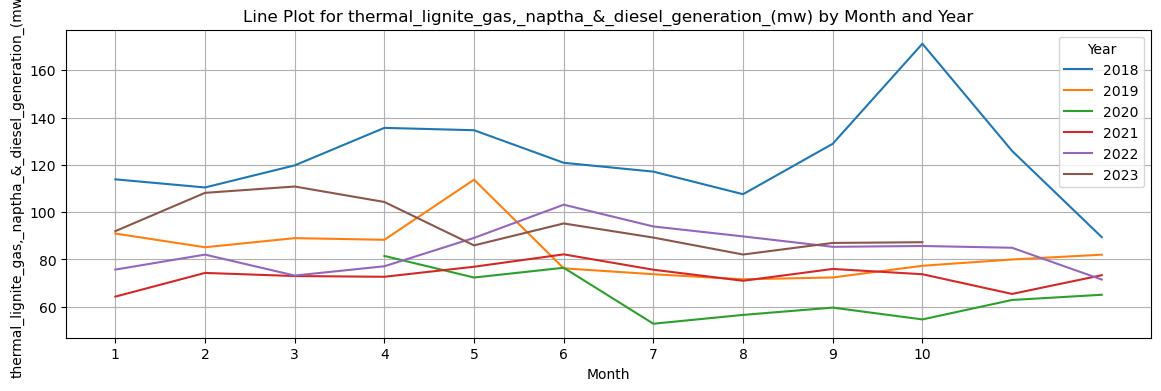

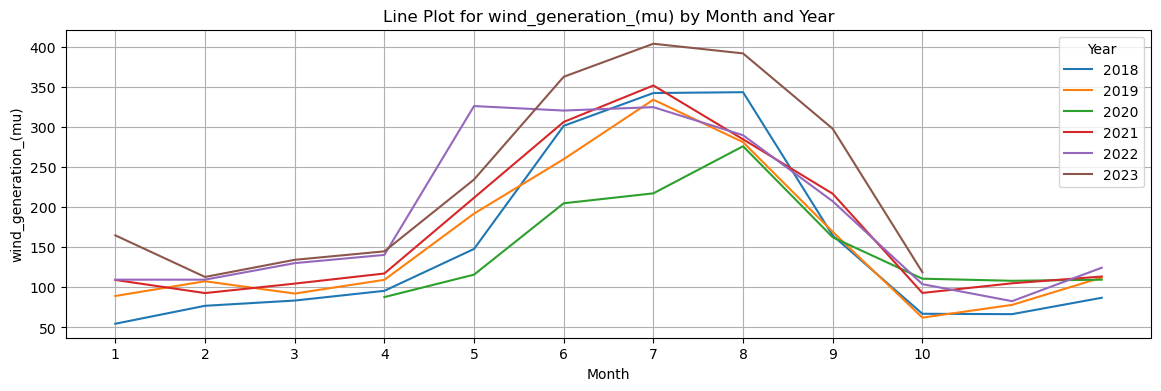

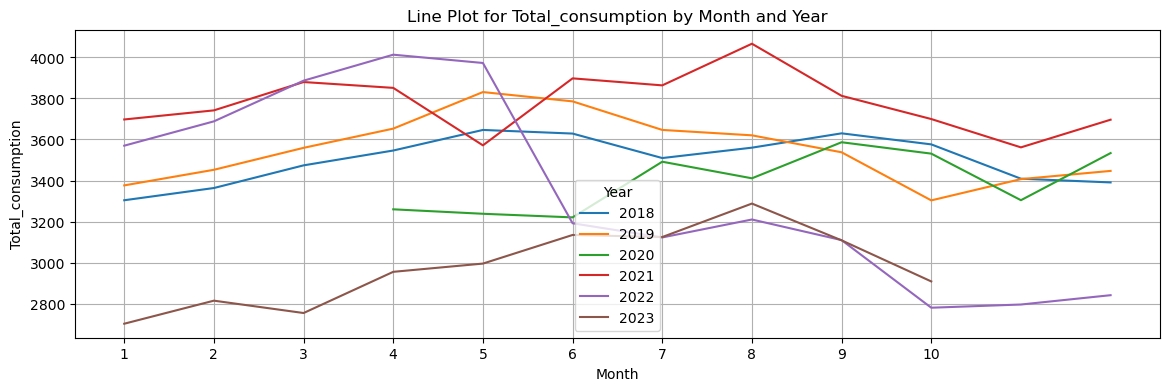

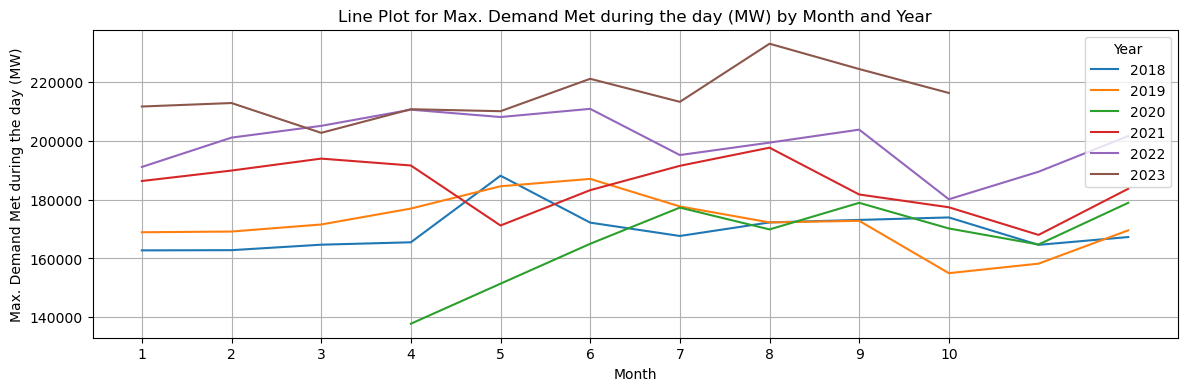

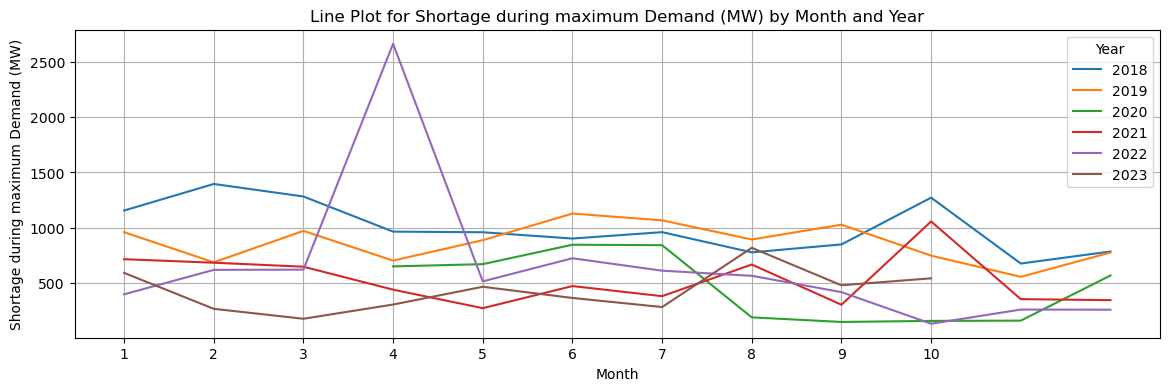

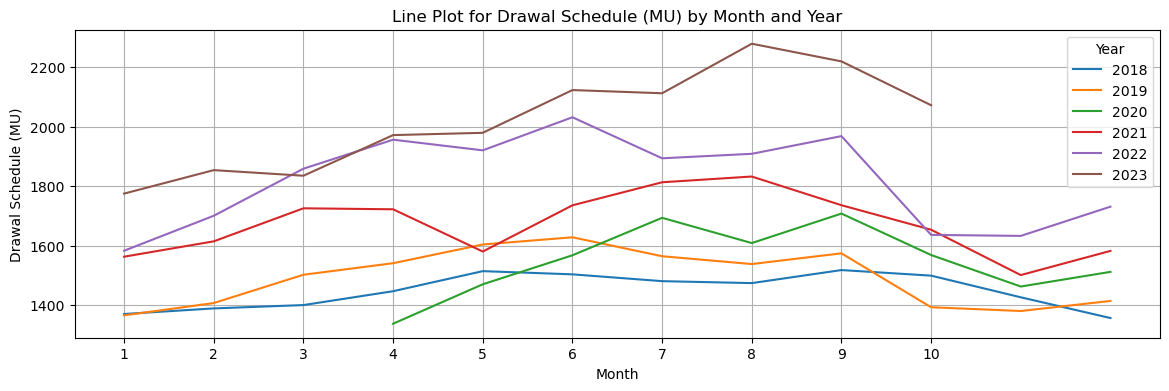

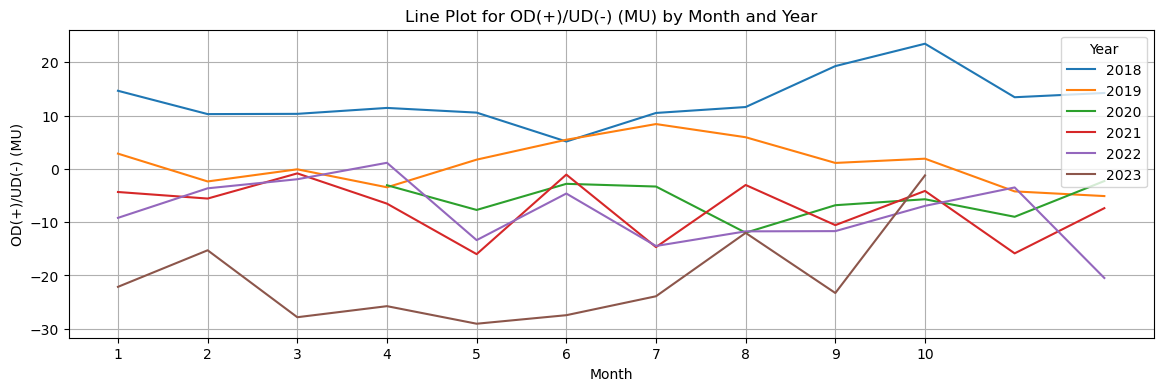

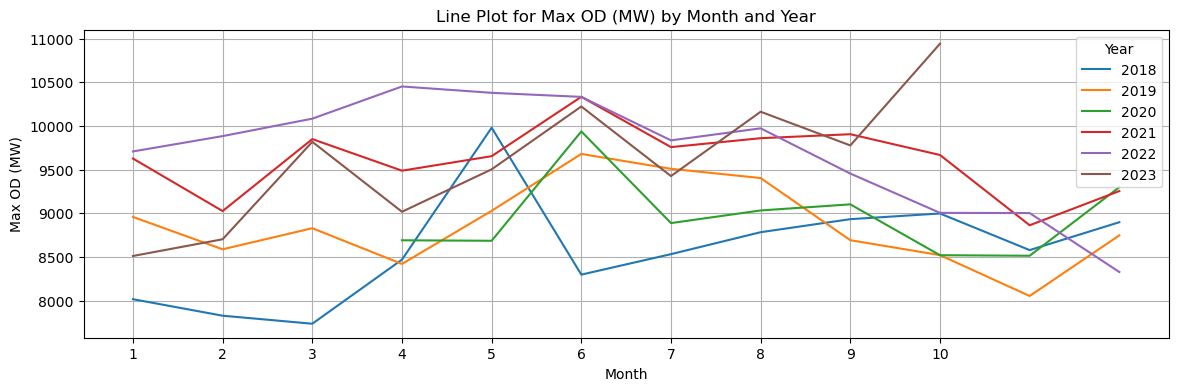

In [101]:
import matplotlib.pyplot as plt

# Extract years and months from the index
monthly_df3['Year'] = monthly_df3.index.year
monthly_df3['Month'] = monthly_df3.index.month

# List of unique years
years = monthly_df3['Year'].unique()

# Iterate through each column and create a line plot
for column in monthly_df3.columns[:-2]:  # Exclude 'Year' and 'Month' columns
    plt.figure(figsize=(14, 4))
    
    for year in years:
        data_year = monthly_df3[monthly_df3['Year'] == year]
        plt.plot(data_year['Month'], data_year[column], label=str(year))

    plt.title(f'Line Plot for {column} by Month and Year')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.xticks(data_year['Month'].unique())  # Assuming all months are present in the last year
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()


In [102]:
monthly_df41 = monthly_df3[[ 'energy_met_(mu)', 'energy_shortage_(mu)',
       'generation_outage_central_sector_(mw)',
       'generation_outage_state_sector_(mw)', ]]

In [103]:
monthly_df42 = monthly_df3[['coal_generation_(mw)',
 'hydro_generation_(mu)',
       'hydro_generation_(mw)']]

In [104]:
monthly_df51 = monthly_df3[['import/export_actual_(mu)',
       'import/export_o/d/u/d_(mu)', 'import/export_schedule_(mu)',
       'maximum_demand_-_evening_peak_(mw)',  'Total_consumption',]]

In [105]:
monthly_df52 = monthly_df3[[ 'nuclear_generation_(mw)',
       'peak_shortage_(mw)', 'solar_generation_(mu)',
       'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)',
       'wind_generation_(mu)']]

In [106]:
monthly_df6 = monthly_df3[['Max. Demand Met during the day (MW)',
       'Shortage during maximum Demand (MW)', 'Drawal Schedule (MU)',
       'OD(+)/UD(-) (MU)', 'Max OD (MW)']]

In [107]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Extract years and months from the index
# monthly_df41['Year'] = monthly_df41.index.year
# monthly_df41['Month'] = monthly_df41.index.month

# # List of unique years
# years = monthly_df41['Year'].unique()

# # Create subplots with one trace for each column
# fig = make_subplots(rows=len(monthly_df41.columns[:-2]), cols=1, shared_xaxes=True, subplot_titles=monthly_df41.columns[:-2])

# # Iterate through each column and add traces to the subplot
# for i, column in enumerate(monthly_df41.columns[:-2]):  # Exclude 'Year' and 'Month' columns
#     for year in years:
#         data_year = monthly_df41[monthly_df41['Year'] == year]
#         trace = go.Scatter(x=data_year['Month'], y=data_year[column], mode='lines', name=f'{year}')
#         fig.add_trace(trace, row=i+1, col=1)

#     fig.update_xaxes(title_text='Month', row=i+1, col=1)
#     fig.update_yaxes(title_text=column, row=i+1, col=1)

# # Update layout
# fig.update_layout(height=len(monthly_df41.columns[:-2]) * 200, showlegend=True)

# fig.show()


In [108]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Extract years and months from the index
# monthly_df42['Year'] = monthly_df42.index.year
# monthly_df42['Month'] = monthly_df42.index.month

# # List of unique years
# years = monthly_df42['Year'].unique()

# # Create subplots with one trace for each column
# fig = make_subplots(rows=len(monthly_df42.columns[:-2]), cols=1, shared_xaxes=True, subplot_titles=monthly_df42.columns[:-2])

# # Iterate through each column and add traces to the subplot
# for i, column in enumerate(monthly_df42.columns[:-2]):  # Exclude 'Year' and 'Month' columns
#     for year in years:
#         data_year = monthly_df42[monthly_df42['Year'] == year]
#         trace = go.Scatter(x=data_year['Month'], y=data_year[column], mode='lines', name=f'{year}')
#         fig.add_trace(trace, row=i+1, col=1)

#     fig.update_xaxes(title_text='Month', row=i+1, col=1)
#     fig.update_yaxes(title_text=column, row=i+1, col=1)

# # Update layout
# fig.update_layout(height=len(monthly_df42.columns[:-2]) * 200, showlegend=True)

# fig.show()


In [109]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Extract years and months from the index
# monthly_df51['Year'] = monthly_df51.index.year
# monthly_df51['Month'] = monthly_df51.index.month

# # List of unique years
# years = monthly_df51['Year'].unique()

# # Create subplots with one trace for each column
# fig = make_subplots(rows=len(monthly_df51.columns[:-2]), cols=1, shared_xaxes=True, subplot_titles=monthly_df51.columns[:-2])

# # Iterate through each column and add traces to the subplot
# for i, column in enumerate(monthly_df51.columns[:-2]):  # Exclude 'Year' and 'Month' columns
#     for year in years:
#         data_year = monthly_df51[monthly_df51['Year'] == year]
#         trace = go.Scatter(x=data_year['Month'], y=data_year[column], mode='lines', name=f'{year}')
#         fig.add_trace(trace, row=i+1, col=1)

#     fig.update_xaxes(title_text='Month', row=i+1, col=1)
#     fig.update_yaxes(title_text=column, row=i+1, col=1)

# # Update layout
# fig.update_layout(height=len(monthly_df51.columns[:-2]) * 200, showlegend=True)

# fig.show()


In [110]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Extract years and months from the index
# monthly_df52['Year'] = monthly_df52.index.year
# monthly_df52['Month'] = monthly_df52.index.month

# # List of unique years
# years = monthly_df52['Year'].unique()

# # Create subplots with one trace for each column
# fig = make_subplots(rows=len(monthly_df52.columns[:-2]), cols=1, shared_xaxes=True, subplot_titles=monthly_df52.columns[:-2])

# # Iterate through each column and add traces to the subplot
# for i, column in enumerate(monthly_df52.columns[:-2]):  # Exclude 'Year' and 'Month' columns
#     for year in years:
#         data_year = monthly_df52[monthly_df52['Year'] == year]
#         trace = go.Scatter(x=data_year['Month'], y=data_year[column], mode='lines', name=f'{year}')
#         fig.add_trace(trace, row=i+1, col=1)

#     fig.update_xaxes(title_text='Month', row=i+1, col=1)
#     fig.update_yaxes(title_text=column, row=i+1, col=1)

# # Update layout
# fig.update_layout(height=len(monthly_df52.columns[:-2]) * 200, showlegend=True)

# fig.show()


In [111]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Extract years and months from the index
# monthly_df6['Year'] = monthly_df6.index.year
# monthly_df6['Month'] = monthly_df6.index.month

# # List of unique years
# years = monthly_df6['Year'].unique()

# # Create subplots with one trace for each column
# fig = make_subplots(rows=len(monthly_df6.columns[:-2]), cols=1, shared_xaxes=True, subplot_titles=monthly_df6.columns[:-2])

# # Iterate through each column and add traces to the subplot
# for i, column in enumerate(monthly_df6.columns[:-2]):  # Exclude 'Year' and 'Month' columns
#     for year in years:
#         data_year = monthly_df6[monthly_df6['Year'] == year]
#         trace = go.Scatter(x=data_year['Month'], y=data_year[column], mode='lines', name=f'{year}')
#         fig.add_trace(trace, row=i+1, col=1)

#     fig.update_xaxes(title_text='Month', row=i+1, col=1)
#     fig.update_yaxes(title_text=column, row=i+1, col=1)

# # Update layout
# fig.update_layout(height=len(monthly_df6.columns[:-2]) * 200, showlegend=True)

# fig.show()


In [112]:
monthly_df3.columns

Index(['coal_generation_(mw)', 'energy_met_(mu)', 'energy_shortage_(mu)',
       'generation_outage_central_sector_(mw)',
       'generation_outage_state_sector_(mw)', 'hydro_generation_(mu)',
       'hydro_generation_(mw)', 'import/export_actual_(mu)',
       'import/export_o/d/u/d_(mu)', 'import/export_schedule_(mu)',
       'maximum_demand_-_evening_peak_(mw)', 'nuclear_generation_(mw)',
       'peak_shortage_(mw)', 'solar_generation_(mu)',
       'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)',
       'wind_generation_(mu)', 'Total_consumption',
       'Max. Demand Met during the day (MW)',
       'Shortage during maximum Demand (MW)', 'Drawal Schedule (MU)',
       'OD(+)/UD(-) (MU)', 'Max OD (MW)', 'Year', 'Month'],
      dtype='object')

In [113]:
monthly_cross_sectional_data = monthly_df3[['hydro_generation_(mw)','solar_generation_(mu)',
       'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)',
       'wind_generation_(mu)']]

In [114]:
#cross_sectional_data

In [115]:
merged_df3.columns

Index(['Date', 'coal_generation_(mw)', 'energy_met_(mu)',
       'energy_shortage_(mu)', 'generation_outage_central_sector_(mw)',
       'generation_outage_state_sector_(mw)', 'hydro_generation_(mu)',
       'hydro_generation_(mw)', 'import/export_actual_(mu)',
       'import/export_o/d/u/d_(mu)', 'import/export_schedule_(mu)',
       'maximum_demand_-_evening_peak_(mw)', 'nuclear_generation_(mw)',
       'peak_shortage_(mw)', 'solar_generation_(mu)',
       'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)',
       'wind_generation_(mu)', 'Total_consumption',
       'Max. Demand Met during the day (MW)',
       'Shortage during maximum Demand (MW)', 'Drawal Schedule (MU)',
       'OD(+)/UD(-) (MU)', 'Max OD (MW)'],
      dtype='object')

In [116]:
daily_cross_sectional_data = merged_df3[['Date','hydro_generation_(mw)','solar_generation_(mu)',
       'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)',
       'wind_generation_(mu)']]

In [117]:
daily_cross_sectional_data

Date  hydro_generation_(mw)  solar_generation_(mu)  \
0    2018-01-01                  203.0                  60.08   
1    2018-01-02                  209.0                  58.10   
2    2018-01-03                  222.0                  56.71   
3    2018-01-04                  226.0                  57.33   
4    2018-01-05                  230.0                  56.33   
...         ...                    ...                    ...   
1985 2023-10-25                  319.0                 314.25   
1986 2023-10-26                  328.0                 318.56   
1987 2023-10-27                  313.0                 316.17   
1988 2023-10-28                  327.0                 277.00   
1989 2023-10-29                  281.0                 288.63   

      thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
0                                                 110.0      
1                                                 114.0      
2                                                 119.0      
3                                                 118.0      
4                                                 119.0      
...                                                 ...      
1985                                               97.0      
1986                                              100.0      
1987                                               98.0      
1988                                              103.0      
1989                                              101.0      

      wind_generation_(mu)  
0                     60.0  
1                     49.0  
2                     49.0  
3                     51.0  
4                     41.0  
...                    ...  
1985                  70.0  
1986                  78.0  
1987                  83.0  
1988                  72.0  
1989                  76.0  

[1847 rows x 5 columns]

In [118]:
# # Extract year and month from the 'Date' column
# daily_cross_sectional_data['Year'] = daily_cross_sectional_data['Date'].dt.year
# daily_cross_sectional_data['Month'] = daily_cross_sectional_data['Date'].dt.month_name()

# # Group by Year and Month and calculate the mean for each group
# monthly_avg_data = daily_cross_sectional_data.groupby(['Year', 'Month']).mean().reset_index()

# # Set up the plot
# plt.figure(figsize=(15, 8))

# # Plot line plots for each column
# for column in daily_cross_sectional_data.columns[1:]:
#     for year in daily_cross_sectional_data['Year'].unique():
#         data = monthly_avg_data[monthly_avg_data['Year'] == year]
#         plt.plot(data['Month'], data[column], label=f'{year} - {column}')

# plt.title('Monthly Average Data Over Different Years')
# plt.xlabel('Month')
# plt.ylabel('Values')
# plt.legend()
# plt.show()


In [119]:
daily_cross_sectional_data.set_index(["Date"])

hydro_generation_(mw)  solar_generation_(mu)  \
Date                                                       
2018-01-01                  203.0                  60.08   
2018-01-02                  209.0                  58.10   
2018-01-03                  222.0                  56.71   
2018-01-04                  226.0                  57.33   
2018-01-05                  230.0                  56.33   
...                           ...                    ...   
2023-10-25                  319.0                 314.25   
2023-10-26                  328.0                 318.56   
2023-10-27                  313.0                 316.17   
2023-10-28                  327.0                 277.00   
2023-10-29                  281.0                 288.63   

            thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
Date                                                               
2018-01-01                                              110.0      
2018-01-02                                              114.0      
2018-01-03                                              119.0      
2018-01-04                                              118.0      
2018-01-05                                              119.0      
...                                                       ...      
2023-10-25                                               97.0      
2023-10-26                                              100.0      
2023-10-27                                               98.0      
2023-10-28                                              103.0      
2023-10-29                                              101.0      

            wind_generation_(mu)  
Date                              
2018-01-01                  60.0  
2018-01-02                  49.0  
2018-01-03                  49.0  
2018-01-04                  51.0  
2018-01-05                  41.0  
...                          ...  
2023-10-25                  70.0  
2023-10-26                  78.0  
2023-10-27                  83.0  
2023-10-28                  72.0  
2023-10-29                  76.0  

[1847 rows x 4 columns]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1464\2738263771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_cross_sectional_data['Year'] = daily_cross_sectional_data['Date'].dt.year
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1464\2738263771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_cross_sectional_data['Month'] = daily_cross_sectional_data['Date'].dt.month_name()


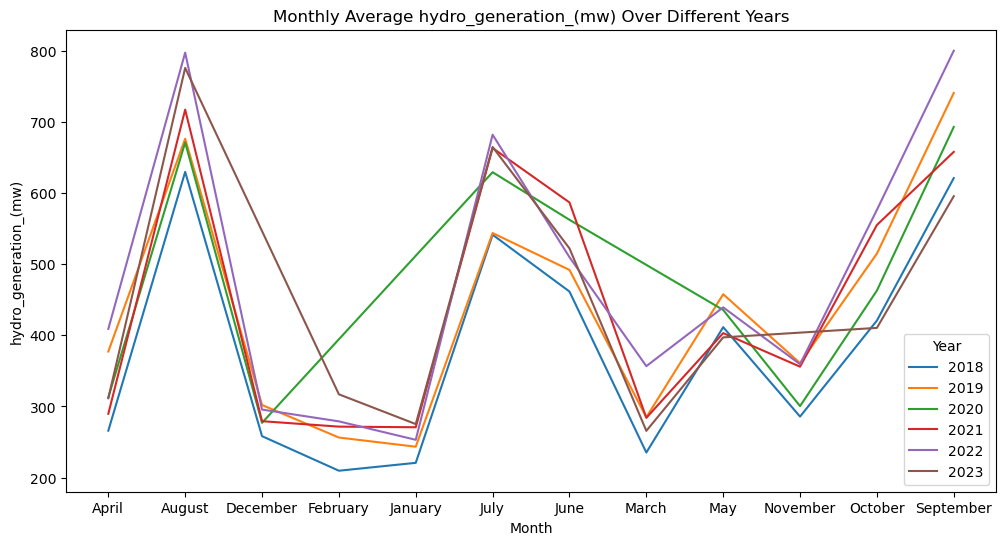

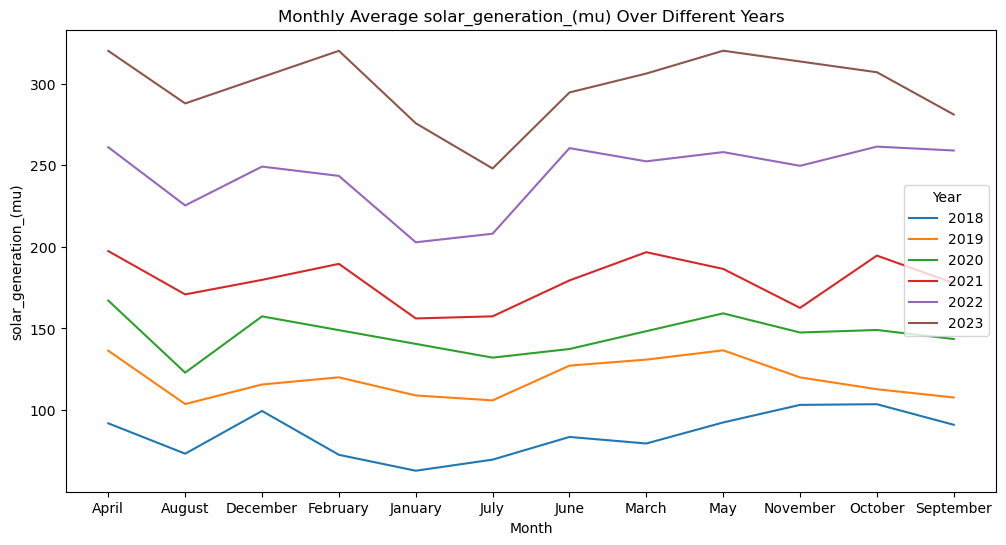

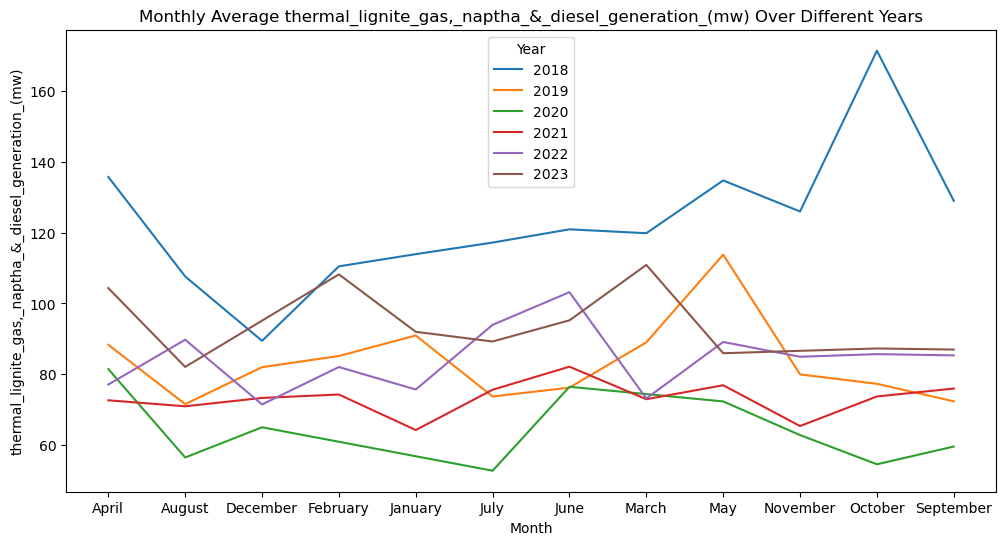

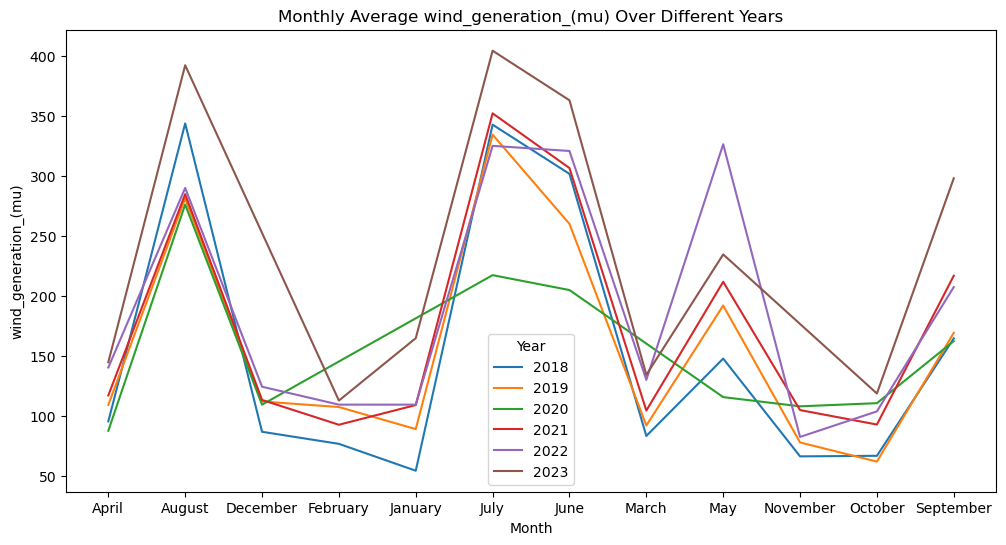

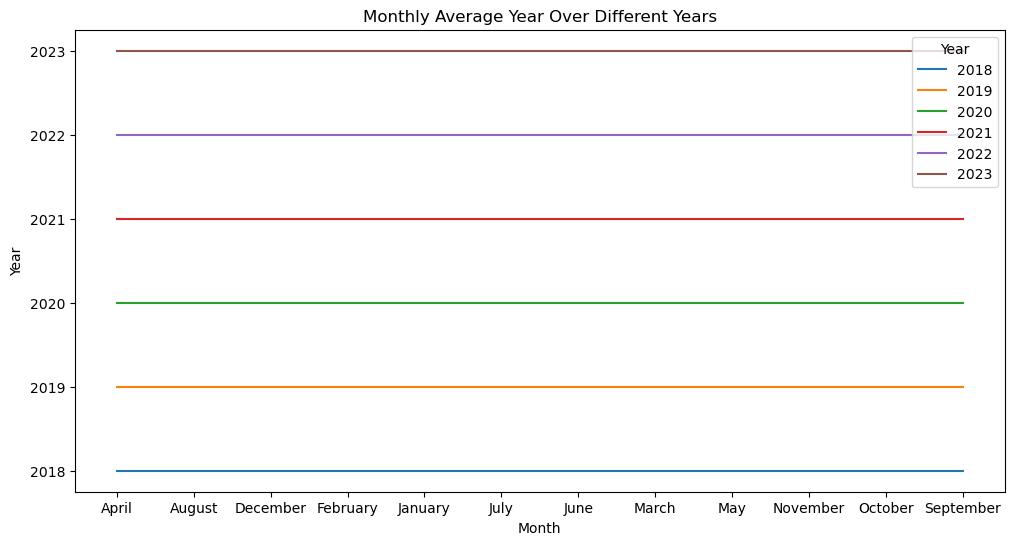

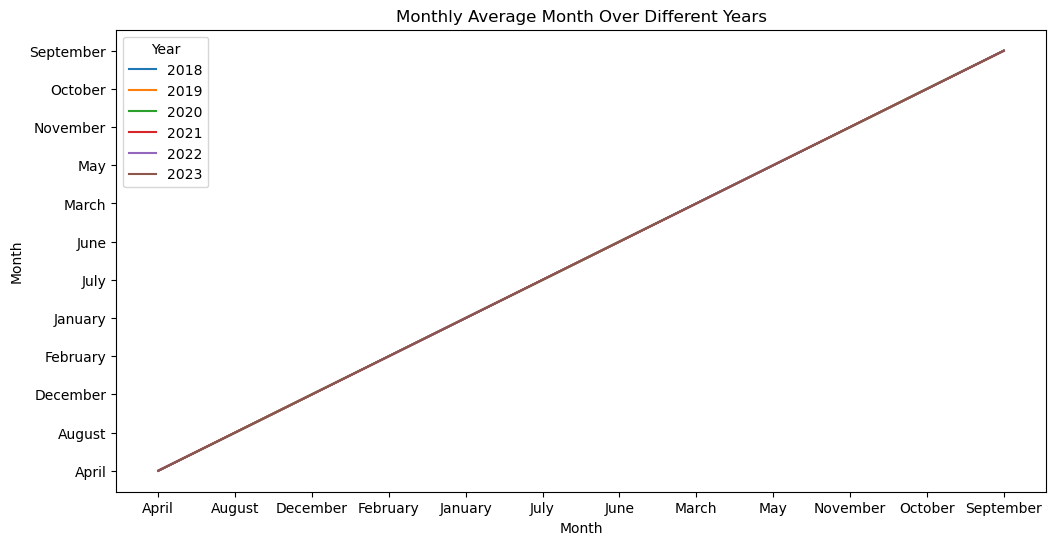

In [120]:
#daily_cross_sectional_data.reset_index(["Date"],inplace=True)
# Extract year and month from the 'Date' column
daily_cross_sectional_data['Year'] = daily_cross_sectional_data['Date'].dt.year
daily_cross_sectional_data['Month'] = daily_cross_sectional_data['Date'].dt.month_name()

# Group by Year and Month and calculate the mean for each group
monthly_avg_data = daily_cross_sectional_data.groupby(['Year', 'Month']).mean().reset_index()

# Plot separate line plots for each column
for column in daily_cross_sectional_data.columns[1:]:
    plt.figure(figsize=(12, 6))
    
    for year in daily_cross_sectional_data['Year'].unique():
        data = monthly_avg_data[monthly_avg_data['Year'] == year]
        plt.plot(data['Month'], data[column], label=f'{year}')
    
    plt.title(f'Monthly Average {column} Over Different Years')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.legend(title='Year')
    plt.show()


In [121]:
daily_cross_sectional_data

Date  hydro_generation_(mw)  solar_generation_(mu)  \
0    2018-01-01                  203.0                  60.08   
1    2018-01-02                  209.0                  58.10   
2    2018-01-03                  222.0                  56.71   
3    2018-01-04                  226.0                  57.33   
4    2018-01-05                  230.0                  56.33   
...         ...                    ...                    ...   
1985 2023-10-25                  319.0                 314.25   
1986 2023-10-26                  328.0                 318.56   
1987 2023-10-27                  313.0                 316.17   
1988 2023-10-28                  327.0                 277.00   
1989 2023-10-29                  281.0                 288.63   

      thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
0                                                 110.0      
1                                                 114.0      
2                                                 119.0      
3                                                 118.0      
4                                                 119.0      
...                                                 ...      
1985                                               97.0      
1986                                              100.0      
1987                                               98.0      
1988                                              103.0      
1989                                              101.0      

      wind_generation_(mu)  Year    Month  
0                     60.0  2018  January  
1                     49.0  2018  January  
2                     49.0  2018  January  
3                     51.0  2018  January  
4                     41.0  2018  January  
...                    ...   ...      ...  
1985                  70.0  2023  October  
1986                  78.0  2023  October  
1987                  83.0  2023  October  
1988                  72.0  2023  October  
1989                  76.0  2023  October  

[1847 rows x 7 columns]

In [122]:
# import requests

# url = "https://example.com/api/nsrdb/v2/solar/spectral-india-tmy-download.format"
# api_key = "AdR5zBvqvbf3quKFHcJ4S5bfQDWxF9QiaEmR0fd"  



## Weather data

source: https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities

In [123]:
import os
import pandas as pd

# Specify the folder path
folder_path = r'E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\weather data'

# Get a list of CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
data_frames = []

# Read each CSV file into a DataFrame and append it to the list
for file in csv_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, dtype={'tmin': float, 'prcp': float})
    
    # Append the DataFrame to the data_frames list
    data_frames.append(df)

# Concatenate all DataFrames in the list
merged_data = pd.concat(data_frames, ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv(os.path.join(folder_path, 'merged_data.csv'), index=False)


In [124]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190304 entries, 0 to 190303
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    190304 non-null  object 
 1   tavg    189496 non-null  float64
 2   tmin    156452 non-null  float64
 3   tmax    173952 non-null  float64
 4   prcp    108996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.3+ MB


In [125]:
merged_data

time  tavg  tmin  tmax  prcp
0       01-01-1990  22.9  19.1  28.4   NaN
1       02-01-1990  21.7   NaN  26.5   0.0
2       03-01-1990  21.0  16.4  26.5   0.0
3       04-01-1990  20.8   NaN  27.4   0.0
4       05-01-1990  20.4  14.2  26.1   0.0
...            ...   ...   ...   ...   ...
190299  21-07-2022  27.6  25.6  30.5  10.9
190300  22-07-2022  28.3  26.0  30.5   3.0
190301  23-07-2022  28.2  25.8  31.3   5.1
190302  24-07-2022  28.1  25.6  30.4   7.1
190303  25-07-2022  28.3  25.1  30.2   7.1

[190304 rows x 5 columns]

### Merging Weather data with preprocessed data

In [126]:
import pandas as pd
# Load the merged data from the CSV file
merged_data = pd.read_csv(r'E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\weather data\merged_data.csv')

# Convert 'time' column to datetime
merged_data['time'] = pd.to_datetime(merged_data['time'], format='%d-%m-%Y', errors='coerce')

# Filter out data older than January 1, 2018
merged_data = merged_data[merged_data['time'] >= '2018-01-01']

# # Display the information about the DataFrame
# print(merged_data.info())

# # Display the first few rows of the DataFrame
# print(merged_data.head())

# Save the modified DataFrame to a new CSV file
merged_data.to_csv(r'E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\filtered_data.csv', index=False)


In [127]:
filtered_data =merged_data

In [128]:
filtered_data.fillna(0, inplace=True)


In [129]:
daily_cross_sectional_data

Date  hydro_generation_(mw)  solar_generation_(mu)  \
0    2018-01-01                  203.0                  60.08   
1    2018-01-02                  209.0                  58.10   
2    2018-01-03                  222.0                  56.71   
3    2018-01-04                  226.0                  57.33   
4    2018-01-05                  230.0                  56.33   
...         ...                    ...                    ...   
1985 2023-10-25                  319.0                 314.25   
1986 2023-10-26                  328.0                 318.56   
1987 2023-10-27                  313.0                 316.17   
1988 2023-10-28                  327.0                 277.00   
1989 2023-10-29                  281.0                 288.63   

      thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
0                                                 110.0      
1                                                 114.0      
2                                                 119.0      
3                                                 118.0      
4                                                 119.0      
...                                                 ...      
1985                                               97.0      
1986                                              100.0      
1987                                               98.0      
1988                                              103.0      
1989                                              101.0      

      wind_generation_(mu)  Year    Month  
0                     60.0  2018  January  
1                     49.0  2018  January  
2                     49.0  2018  January  
3                     51.0  2018  January  
4                     41.0  2018  January  
...                    ...   ...      ...  
1985                  70.0  2023  October  
1986                  78.0  2023  October  
1987                  83.0  2023  October  
1988                  72.0  2023  October  
1989                  76.0  2023  October  

[1847 rows x 7 columns]

In [130]:
filtered_data

time  tavg  tmin  tmax  prcp
10227  2018-01-01  22.2  16.6  28.4   0.0
10228  2018-01-02  22.1  17.8  28.9   0.0
10229  2018-01-03  22.2  18.4  29.0   0.0
10230  2018-01-04  21.6  17.0  27.6   0.0
10231  2018-01-05  20.7  15.5  28.3   0.0
...           ...   ...   ...   ...   ...
190299 2022-07-21  27.6  25.6  30.5  10.9
190300 2022-07-22  28.3  26.0  30.5   3.0
190301 2022-07-23  28.2  25.8  31.3   5.1
190302 2022-07-24  28.1  25.6  30.4   7.1
190303 2022-07-25  28.3  25.1  30.2   7.1

[24032 rows x 5 columns]

In [131]:
merged_df_cross_section = pd.merge(daily_cross_sectional_data, filtered_data, left_on='Date', right_on='time', how='inner')

In [132]:
merged_df_cross_section.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20616 entries, 0 to 20615
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date                                                  20616 non-null  datetime64[ns]
 1   hydro_generation_(mw)                                 20616 non-null  float64       
 2   solar_generation_(mu)                                 20616 non-null  float64       
 3   thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  20616 non-null  float64       
 4   wind_generation_(mu)                                  20616 non-null  float64       
 5   Year                                                  20616 non-null  int32         
 6   Month                                                 20616 non-null  object        
 7   time                                                  20616 non-null  dateti

In [133]:
merged_df_cross_section2 = merged_df_cross_section.drop(["time"],axis=1)

In [134]:
merged_df_cross_section2

Date  hydro_generation_(mw)  solar_generation_(mu)  \
0     2018-01-01                  203.0                  60.08   
1     2018-01-01                  203.0                  60.08   
2     2018-01-01                  203.0                  60.08   
3     2018-01-01                  203.0                  60.08   
4     2018-01-01                  203.0                  60.08   
...          ...                    ...                    ...   
20611 2022-07-25                  772.0                 221.44   
20612 2022-07-25                  772.0                 221.44   
20613 2022-07-25                  772.0                 221.44   
20614 2022-07-25                  772.0                 221.44   
20615 2022-07-25                  772.0                 221.44   

       thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
0                                                  110.0      
1                                                  110.0      
2                                                  110.0      
3                                                  110.0      
4                                                  110.0      
...                                                  ...      
20611                                              103.0      
20612                                              103.0      
20613                                              103.0      
20614                                              103.0      
20615                                              103.0      

       wind_generation_(mu)  Year    Month  tavg  tmin  tmax  prcp  
0                      60.0  2018  January  22.2  16.6  28.4   0.0  
1                      60.0  2018  January  26.2  22.1  30.5   0.0  
2                      60.0  2018  January  22.2  16.6  28.4   0.0  
3                      60.0  2018  January  26.2  22.1  30.5   0.0  
4                      60.0  2018  January  22.2  16.6  28.4   0.0  
...                     ...   ...      ...   ...   ...   ...   ...  
20611                 273.0  2022     July  30.7  26.8  35.7   0.0  
20612                 273.0  2022     July  28.3  25.1  30.2   7.1  
20613                 273.0  2022     July  28.3  25.1  30.2   7.1  
20614                 273.0  2022     July  28.3  25.1  30.2   7.1  
20615                 273.0  2022     July  28.3  25.1  30.2   7.1  

[20616 rows x 11 columns]

In [135]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Resetting the index
merged_df_cross_section2 = merged_df_cross_section2.reset_index()

# Data Preprocessing
merged_df_cross_section2['Date'] = pd.to_datetime(merged_df_cross_section2['Date'])
merged_df_cross_section2.set_index('Date', inplace=True)




In [136]:
merged_df_cross_section2

index  hydro_generation_(mw)  solar_generation_(mu)  \
Date                                                              
2018-01-01      0                  203.0                  60.08   
2018-01-01      1                  203.0                  60.08   
2018-01-01      2                  203.0                  60.08   
2018-01-01      3                  203.0                  60.08   
2018-01-01      4                  203.0                  60.08   
...           ...                    ...                    ...   
2022-07-25  20611                  772.0                 221.44   
2022-07-25  20612                  772.0                 221.44   
2022-07-25  20613                  772.0                 221.44   
2022-07-25  20614                  772.0                 221.44   
2022-07-25  20615                  772.0                 221.44   

            thermal_lignite_gas,_naptha_&_diesel_generation_(mw)  \
Date                                                               
2018-01-01                                              110.0      
2018-01-01                                              110.0      
2018-01-01                                              110.0      
2018-01-01                                              110.0      
2018-01-01                                              110.0      
...                                                       ...      
2022-07-25                                              103.0      
2022-07-25                                              103.0      
2022-07-25                                              103.0      
2022-07-25                                              103.0      
2022-07-25                                              103.0      

            wind_generation_(mu)  Year    Month  tavg  tmin  tmax  prcp  
Date                                                                     
2018-01-01                  60.0  2018  January  22.2  16.6  28.4   0.0  
2018-01-01                  60.0  2018  January  26.2  22.1  30.5   0.0  
2018-01-01                  60.0  2018  January  22.2  16.6  28.4   0.0  
2018-01-01                  60.0  2018  January  26.2  22.1  30.5   0.0  
2018-01-01                  60.0  2018  January  22.2  16.6  28.4   0.0  
...                          ...   ...      ...   ...   ...   ...   ...  
2022-07-25                 273.0  2022     July  30.7  26.8  35.7   0.0  
2022-07-25                 273.0  2022     July  28.3  25.1  30.2   7.1  
2022-07-25                 273.0  2022     July  28.3  25.1  30.2   7.1  
2022-07-25                 273.0  2022     July  28.3  25.1  30.2   7.1  
2022-07-25                 273.0  2022     July  28.3  25.1  30.2   7.1  

[20616 rows x 11 columns]

In [137]:
merged_df_cross_section2.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [138]:
# One-Hot Encoding for 'Month'
merged_df_cross_section2 = pd.get_dummies(merged_df_cross_section2, columns=['Month'], drop_first=True)



In [139]:
merged_df_cross_section2.columns

Index(['index', 'hydro_generation_(mw)', 'solar_generation_(mu)',
       'thermal_lignite_gas,_naptha_&_diesel_generation_(mw)',
       'wind_generation_(mu)', 'Year', 'tavg', 'tmin', 'tmax', 'prcp',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'],
      dtype='object')

In [140]:
len(['Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'])

11

## Modelling

#### Grid search cv

In [142]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80],  
    'max_depth': [5, 10, 15, 20, 25 ],  
    'min_samples_split': [4, 5, 6, 7, 8, 9, 10],  
    'min_samples_leaf': [ 4, 5, 7, 8, 9, 10]  
}

# Create the Random Forest model
model = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Extract features and target variable
X = merged_df_cross_section2[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y = merged_df_cross_section2['hydro_generation_(mw)']

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train_hydro)

# Model Validation
y_pred_best = best_model.predict(X_test)

# Evaluate the model
rmse_best = np.sqrt(mean_squared_error(y_test_hydro, y_pred_best))
print(f"Root Mean Squared Error with Best Hyperparameters: {rmse_best}")

r2 = r2_score(y_test_hydro, y_pred)
print(f"R-squared (R2): {r2}")


KeyboardInterrupt



### Random forest regressor as per Grid search cv output

In [141]:
from sklearn.metrics import mean_squared_error, r2_score
# Splitting Data
train_size = int(len(merged_df_cross_section2) * 0.8)
train, test = merged_df_cross_section2[:train_size], merged_df_cross_section2[train_size:]

# Model Selection
model = RandomForestRegressor(max_depth = 10, min_samples_leaf= 4, min_samples_split = 5, n_estimators = 50)

# Model Training
X_train = train[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y_train_hydro = train['hydro_generation_(mw)']  # Replace with your specific dependent variable
model.fit(X_train, y_train_hydro)

# Model Validation
X_test = test[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y_test_hydro = test['hydro_generation_(mw)']  # Replace with your specific dependent variable
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_hydro, y_pred))
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test_hydro, y_pred)
print(f"R-squared (R2): {r2}")

Root Mean Squared Error: 72.27168584885177
R-squared (R2): 0.677736074416304


In [ ]:
# # Lagged Variables
# for i in range(1, 8):  # Adjust the range as needed
#     train[f'hydro_generation_(mw)_lag_{i}'] = train['hydro_generation_(mw)'].shift(i)
#     test[f'hydro_generation_(mw)_lag_{i}'] = test['hydro_generation_(mw)'].shift(i)

# # Month-specific Features
# month_dummies = pd.get_dummies(merged_df_cross_section2.index.month, prefix='month')
# merged_df_cross_section2 = pd.concat([merged_df_cross_section2, month_dummies], axis=1)

# # Interaction Terms
# for month in range(1, 13):
#     merged_df_cross_section2[f'tavg_month_{month}'] = merged_df_cross_section2['tavg'] * merged_df_cross_section2[f'month_{month}']
#     merged_df_cross_section2[f'prcp_month_{month}'] = merged_df_cross_section2['prcp'] * merged_df_cross_section2[f'month_{month}']

# # Moving Averages
# window_sizes = [7, 14, 30]  # Adjust the window sizes as needed
# for window_size in window_sizes:
#     merged_df_cross_section2[f'hydro_generation_(mw)_ma_{window_size}'] = merged_df_cross_section2['hydro_generation_(mw)'].rolling(window=window_size).mean()

# merged_df_cross_section2['day_of_week'] = merged_df_cross_section2.index.dayofweek


In [ ]:
# forecast = model.predict(future_data[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_February', 'Month_March', 'Month_April', 'Month_May', 'Month_June', 'Month_July', 'Month_August', 'Month_September', 'Month_October', 'Month_November', 'Month_December']])


### TPOT

### 1. Hydro Generation

In [ ]:
#!pip install tpot

In [143]:
# from tpot import TPOTRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# # Extract features and target variable
# X = merged_df_cross_section2[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
#        'Month_July', 'Month_June', 'Month_March', 'Month_May',
#        'Month_November', 'Month_October', 'Month_September']]
# y = merged_df_cross_section2['hydro_generation_(mw)']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1992)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Instantiate TPOT with the desired configuration
# tpot = TPOTRegressor(
#     generations=5,  # You can adjust this parameter
#     population_size=20,  # You can adjust this parameter
#     random_state=1992,
#     verbosity=2,
#     n_jobs=-1,  # Use all available cores
#     periodic_checkpoint_folder='tpot_checkpoint',
# )

# # Fit the TPOT instance to your data
# tpot.fit(X_train_scaled, y_train)

# # Evaluate the pipeline on the test set
# y_pred = tpot.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error on Test Set: {mse}')



Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -70.9206194478295

Generation 2 - Current best internal CV score: -70.9206194478295

Generation 3 - Current best internal CV score: -70.9206194478295

Generation 4 - Current best internal CV score: -62.951958714193026

Generation 5 - Current best internal CV score: -62.951958714193026

Best pipeline: KNeighborsRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100), n_neighbors=56, p=1, weights=distance)
Mean Squared Error on Test Set: 18.557141175751454


In [164]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

# Extract features and target variable
X = merged_df_cross_section2[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y = merged_df_cross_section2['hydro_generation_(mw)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1992)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate TPOT with the desired configuration
tpot = TPOTRegressor(
    generations=10,  
    population_size=30,  # You can adjust this parameter
    random_state=1992,
    verbosity=2,
    n_jobs=-1,  # Use all available cores
    periodic_checkpoint_folder='tpot_checkpoint',
)

# Fit the TPOT instance to your data
tpot.fit(X_train_scaled, y_train)

# Evaluate the pipeline on the test set
y_pred = tpot.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Save the trained model as a pickle file
joblib.dump(tpot.fitted_pipeline_, 'tpot_hydro_gen_model.pkl')


Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -159.37905575824178

Generation 2 - Current best internal CV score: -159.37905575824178

Generation 3 - Current best internal CV score: -159.37905575824178

Generation 4 - Current best internal CV score: -159.33361899245838

Generation 5 - Current best internal CV score: -156.11902133640032

Generation 6 - Current best internal CV score: -153.6314040107647

Generation 7 - Current best internal CV score: -153.6314040107647

Generation 8 - Current best internal CV score: -153.6314040107647

Generation 9 - Current best internal CV score: -153.6314040107647

Generation 10 - Current best internal CV score: -153.6314040107647

Best pipeline: KNeighborsRegressor(StandardScaler(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=4, min_samples_split=4, n_estimators=100)), n_neighbors=50, p=1, weights=distance)
Mean Squared Error on Test Set: 86.59306616437793


['tpot_hydro_gen_model.pkl']

In [165]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.996901539924321


In [157]:
# # # Export the best pipeline as a Python script
# # tpot.export('tpot_hydro_gen_pipeline.py')

# # Save the trained model as a pickle file
# joblib.dump(tpot.fitted_pipeline_, 'tpot_hydro_gen_model.pkl')


['tpot_hydro_gen_model.pkl']

### 2. Solar Generation

In [166]:
# Extract features and target variables for 'solar_generation_(mu)'
X_solar = merged_df_cross_section2[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y_solar = merged_df_cross_section2['solar_generation_(mu)']

# Split the data into training and testing sets for 'solar_generation_(mu)'
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X_solar, y_solar, test_size=0.35, random_state=1992)

# Standardize the features for 'solar_generation_(mu)'
X_train_scaled_solar = scaler.fit_transform(X_train_solar)
X_test_scaled_solar = scaler.transform(X_test_solar)

# Instantiate TPOT for 'solar_generation_(mu)'
tpot_solar = TPOTRegressor(
    generations=5,  # You can adjust this parameter
    population_size=20,  # You can adjust this parameter
    random_state=1992,
    verbosity=2,
    n_jobs=-1,  # Use all available cores
    periodic_checkpoint_folder='tpot_checkpoint_solar',
)

# Fit TPOT for 'solar_generation_(mu)' to your data
tpot_solar.fit(X_train_scaled_solar, y_train_solar)

# Evaluate the pipeline for 'solar_generation_(mu)' on the test set
y_pred_solar = tpot_solar.predict(X_test_scaled_solar)
mse_solar = mean_squared_error(y_test_solar, y_pred_solar)
print(f'Mean Squared Error for solar_generation_(mu) on Test Set: {mse_solar}')

r2 = r2_score(y_test_solar, y_pred_solar)
print(f"R-squared (R2): {r2}")

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17.590970745646548

Generation 2 - Current best internal CV score: -17.43827970021487

Generation 3 - Current best internal CV score: -17.425414387446825

Generation 4 - Current best internal CV score: -17.425414387446825

Generation 5 - Current best internal CV score: -17.425414387446825

Best pipeline: KNeighborsRegressor(ExtraTreesRegressor(StandardScaler(input_matrix), bootstrap=True, max_features=0.5, min_samples_leaf=16, min_samples_split=4, n_estimators=100), n_neighbors=56, p=1, weights=distance)
Mean Squared Error for solar_generation_(mu) on Test Set: 8.708714946562237
R-squared (R2): 0.9971652463568893


In [167]:
# # Export the best pipeline as a Python script
# tpot_solar.export('tpot_thermal_gen_pipeline.py')

# Save the trained model as a pickle file
joblib.dump(tpot_solar.fitted_pipeline_, 'tpot_solar_gen_model.pkl')


['tpot_solar_gen_model.pkl']

### 3. Thermal generation

In [168]:
# Extract features and target variables for 'thermal_lignite_gas,naptha&diesel_generation(mw)'
X_thermal = merged_df_cross_section2[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y_thermal = merged_df_cross_section2['thermal_lignite_gas,_naptha_&_diesel_generation_(mw)']

# Split the data into training and testing sets for 'thermal_lignite_gas,naptha&diesel_generation(mw)'
X_train_thermal, X_test_thermal, y_train_thermal, y_test_thermal = train_test_split(X_thermal, y_thermal, test_size=0.35, random_state=1992)

# Standardize the features for 'thermal_lignite_gas,naptha&diesel_generation(mw)'
X_train_scaled_thermal = scaler.fit_transform(X_train_thermal)
X_test_scaled_thermal = scaler.transform(X_test_thermal)

# Instantiate TPOT for 'thermal_lignite_gas,naptha&diesel_generation(mw)'
tpot_thermal = TPOTRegressor(
    generations=5,  
    population_size=20, 
    random_state=1992,
    verbosity=2,
    n_jobs=-1,  # Use all available cores
    periodic_checkpoint_folder='tpot_checkpoint_thermal',
)

# Fit TPOT for 'thermal_lignite_gas,naptha&diesel_generation(mw)' to your data
tpot_thermal.fit(X_train_scaled_thermal, y_train_thermal)

# Evaluate the pipeline for 'thermal_lignite_gas,naptha&diesel_generation(mw)' on the test set
y_pred_thermal = tpot_thermal.predict(X_test_scaled_thermal)
mse_thermal = mean_squared_error(y_test_thermal, y_pred_thermal)
print(f'Mean Squared Error for thermal_lignite_gas,naptha&diesel_generation(mw) on Test Set: {mse_thermal}')

r2 = r2_score(y_test_thermal, y_pred_thermal)
print(f"R-squared (R2): {r2}")

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -212.84327010669804

Generation 2 - Current best internal CV score: -212.84327010669804

Generation 3 - Current best internal CV score: -212.84327010669804

Generation 4 - Current best internal CV score: -212.84327010669804

Generation 5 - Current best internal CV score: -211.62946338347788

Best pipeline: KNeighborsRegressor(RidgeCV(input_matrix), n_neighbors=99, p=1, weights=distance)
Mean Squared Error for thermal_lignite_gas,naptha&diesel_generation(mw) on Test Set: 5.237542798423277
R-squared (R2): 0.9963425585188246


In [159]:
# # Export the best pipeline as a Python script
# tpot_thermal.export('tpot_thermal_gen_pipeline.py')

# Save the trained model as a pickle file
joblib.dump(tpot_thermal.fitted_pipeline_, 'tpot_thermal_gen_model.pkl')



['tpot_thermal_gen_model.pkl']

### 4. Wind generation

In [171]:
# Extract features and target variables for 'wind_generation_(mu)'
X_wind = merged_df_cross_section2[['Year', 'tavg', 'tmin', 'tmax', 'prcp', 'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']]
y_wind = merged_df_cross_section2['wind_generation_(mu)']

# Split the data into training and testing sets for 'wind_generation_(mu)'
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind, y_wind, test_size=0.35, random_state=1992)

# Standardize the features for 'wind_generation_(mu)'
X_train_scaled_wind = scaler.fit_transform(X_train_wind)
X_test_scaled_wind = scaler.transform(X_test_wind)

# Instantiate TPOT for 'wind_generation_(mu)'
tpot_wind = TPOTRegressor(
    generations=15,  
    population_size=50,  
    random_state=1992,
    verbosity=2,
    n_jobs=-1,  # Use all available cores
    periodic_checkpoint_folder='tpot_checkpoint_wind',
)

# Fit TPOT for 'wind_generation_(mu)' to your data
tpot_wind.fit(X_train_scaled_wind, y_train_wind)

# Evaluate the pipeline for 'wind_generation_(mu)' on the test set
y_pred_wind = tpot_wind.predict(X_test_scaled_wind)
mse_wind = mean_squared_error(y_test_wind, y_pred_wind)
print(f'Mean Squared Error for wind_generation_(mu) on Test Set: {mse_wind}')

r2 = r2_score(y_test_wind, y_pred_wind)
print(f"R-squared (R2): {r2}")

Optimization Progress:   0%|          | 0/800 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -340.93158225776676

Generation 2 - Current best internal CV score: -332.45515158536944

Generation 3 - Current best internal CV score: -332.45515158536944

Generation 4 - Current best internal CV score: -332.45515158536944

Generation 5 - Current best internal CV score: -328.76027650456797

Generation 6 - Current best internal CV score: -328.76027650456797

Generation 7 - Current best internal CV score: -327.2160268024447

Generation 8 - Current best internal CV score: -327.2160268024447

Generation 9 - Current best internal CV score: -327.2160268024447

Generation 10 - Current best internal CV score: -327.2160268024447

Generation 11 - Current best internal CV score: -327.2160268024447

Generation 12 - Current best internal CV score: -327.2160268024447

Generation 13 - Current best internal CV score: -327.2160268024447

Generation 14 - Current best internal CV score: -327.2160268024447

Generation 15 - Current best internal CV score: -3

In [172]:
# # Export the best pipeline as a Python script
# tpot_wind.export('tpot_wind_gen_pipeline.py')


# Save the trained model as a pickle file
joblib.dump(tpot_wind.fitted_pipeline_, 'tpot_wind_gen_model.pkl')



['tpot_wind_gen_model.pkl']

In [155]:
#merged_df_cross_section2.to_csv(r"E:\data_analytics\ISB AMPBA CoW23\Training material\0. ISB Tutotrials\6. Term-5\FP-2\Dataset\web scrapping\generation4_data.csv")